In [282]:
import numpy as np
import sklearn
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble,tree,linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier,GradientBoostingRegressor)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,cross_val_score
# from sklearn.cross_validation import KFold
import tensorflow as tf
import warnings
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
%reload_ext autoreload
%autoreload 2
%matplotlib inline
warnings.filterwarnings('ignore')

pd.options.display.max_columns=99

In [329]:
# Input_Data = pd.read_csv('data/Input_interp_filledCat_codedCat.csv')
Input_Data = pd.read_csv('data/Input_pca_0.95thres.csv')
# Input_Data = pd.read_csv('data/Input_remove_corr.csv')
# normalize the format of EXAMDATE
Input_Data['EXAMDATE'] = pd.to_datetime(Input_Data['EXAMDATE'], errors='coerce')
Input_Data.head()
# Input_Data['EXAMDATE'].dtype

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,PTID_Key,EXAMDATE,DX
0,-0.914682,-0.601231,-1.025777,0.646176,1.011424,0.545620,0.413133,0.157729,0.240342,1.240933,-0.614915,1.991610,0.506536,0.278690,0.153647,-0.377177,1.514802,-0.019620,0.283497,-0.656795,0.221551,0.350008,0.196467,-0.604921,-1.521657,-0.185724,-1.876779,-0.208486,0.673291,-0.596495,0.631191,0.029072,0.877182,-0.778522,0.761286,-1.076368,-0.941719,0.219719,2.491332,-1.257230,-0.303478,-1.353673,-0.387802,0.508279,-0.721791,-0.805647,-0.692598,0.739660,0.774142,...,-1.111548,-1.504085,0.280236,-1.026748,-0.935085,-0.300665,-1.065586,-0.794485,0.810877,0.240799,-0.403455,-0.313444,-0.471123,1.063699,-0.801149,-0.386264,0.054835,0.332211,-2.399556,1.094873,2.336983,-2.151991,0.262187,0.434412,1.312646,-1.291214,0.415570,-1.990970,-1.362115,-0.359844,-0.691137,0.531001,0.796599,0.538899,0.668736,-0.362717,0.526381,-1.574725,1.199216,0.881033,-0.162544,1.078744,1.362077,1.059333,0.267904,-0.928759,1.0,2010-12-10,2
1,-0.551814,-0.979159,-1.117663,1.076771,0.625453,0.594147,0.200665,-0.109799,0.167253,1.085187,-0.908410,0.744116,0.728125,-0.159216,0.144665,0.513853,1.799283,-0.349975,0.227961,-0.650050,0.099265,0.732234,0.033733,-0.569960,-1.853381,0.309617,-1.390592,-0.524115,0.653087,0.003768,1.020155,-0.361017,1.143764,-0.811648,0.879657,-0.934078,-0.719017,-0.174933,1.807723,-0.246274,0.197087,-0.588264,-0.028376,1.524079,-0.491840,-0.773806,-0.905032,0.587289,0.482128,...,-1.362359,-0.384883,-0.396091,-1.114439,-1.497867,0.073814,-1.047930,-0.472296,0.541844,-0.597084,-0.788613,-0.759914,-0.559378,0.918252,-0.153937,-0.072157,0.764843,0.574582,-1.299033,1.859001,0.993939,-0.972449,1.815612,-0.805537,1.022320,-1.829569,0.756406,-0.444980,-2.338430,0.632880,-0.912492,1.094919,0.033690,0.674762,0.643271,-0.362390,0.543195,-1.660143,1.020524,1.949152,-0.949106,-0.750425,0.614402,1.703636,-0.747710,-0.966335,1.0,2011-04-07,2
2,-0.819792,-0.982411,-1.010481,1.050002,0.690168,0.794730,0.281609,-0.584068,0.522935,1.314278,-0.468990,1.015674,0.095780,-0.090131,0.121122,0.641263,1.195369,-0.043699,0.300918,-0.510973,0.033367,0.266118,0.286762,-0.413685,-1.853315,0.160174,-1.505841,-0.255259,1.073686,-0.130857,0.113276,-0.490394,0.355425,-1.346322,0.936334,-1.610474,-0.638695,-0.203596,1.830329,-0.354029,0.131519,-1.169916,0.146008,1.354220,0.128852,-0.306639,-0.527814,0.150390,0.098864,...,-2.125737,-0.956597,0.800094,-0.947476,-1.217942,-0.685731,0.343844,0.290111,-0.847178,-0.035952,0.708540,0.377110,0.002219,1.057412,0.114082,-0.368786,-0.383575,0.110381,-1.250354,-0.132147,0.602319,-0.741663,1.161139,0.772682,0.659802,-0.370310,0.504005,-1.390165,-1.299680,-0.612009,-1.319248,-0.379710,0.861513,0.097416,1.025970,0.005399,0.394066,-0.682618,1.512006,0.429191,-0.094298,0.603369,0.183042,0.871928,0.794578,0.589846,1.0,2011-09-08,2
3,-1.336588,0.124982,0.265170,0.702093,-0.806993,0.915643,-0.873193,0.532319,-1.443681,0.450639,-0.561673,-0.045912,0.461204,-0.131562,0.077892,-0.862214,0.354069,-0.058075,-0.284119,-2.005307,-0.728140,-0.122163,0.388809,-0.725412,-0.164666,-0.481027,-0.053525,1.137394,-0.665674,-0.085696,0.019830,-0.143032,0.536505,-0.038190,0.683802,0.057937,-0.216116,-0.079253,0.046781,-0.709941,0.157998,0.185480,0.370402,-0.753654,0.781240,0.886344,-0.357192,-1.061215,0.452014,...,0.714254,-0.367555,-1.874418,-0.115493,-0.505355,1.326566,0.931132,-1.040033,0.000094,-0.922823,0.459259,0.136026,0.516101,-1.122543,-1.276170,0.537032,-0.185670,-0.037686,0.163978,1.703618,-0.464324,-0.760336,0.292739,-0.525850,1.064035,-1.654064,-0.097459,-0.879186,0.406081,-0.507800,-0.140618,0.504883,1.182153,1.805809,-0.803499,0.384380,-0.600851,0.237532,2.262692,1.360018,0.069672,0.544021,-1.105401,

In [ ]:
Input_Data.shape

### training target

In [330]:
# Do linear interpolation if there is data before and after for the same object, then do ffil and bfil
def linear_interp(data):
    ID_list = np.unique(data.PTID_Key.values)
    # Create an empty dataframe with all columns from data
    Input_new=pd.DataFrame(columns=data.columns)
#     print(ID_list)
    for ID in ID_list:
#         print(ID)
        df=data[data['PTID_Key']==ID]
        # interpolate only for numeric data
        df=df.interpolate()
        # ffill, bfill numeric data that can't be interpolate as well as categorical data
        df=df.fillna(method='ffill')
        df=df.fillna(method='bfill')
        Input_new=pd.concat([Input_new, df], ignore_index=True)

    print("Remaining missing values: ", Input_new.isnull().sum().sum() )
    print("Filled percentage: ", (1- Input_new.isnull().sum().sum()/data.isnull().sum().sum())*100,"%")
    return Input_new

In [331]:
from sklearn.preprocessing import StandardScaler
def scale(data):
#     df=pd.DataFrame(columns=data.columns)
#     print(df.shape)
#     df=data.drop(['PTID_Key','EXAMDATE', 'EXAMDATE_bl'], axis=1)
    features=data.select_dtypes(exclude=["datetime"]).columns.tolist()
    # Separating out the features
    for feature in features:
    # Standardizing the features
#         print(feature)
        data[feature] = StandardScaler().fit_transform(data[feature].values.reshape(-1,1))
    # df = StandardScaler().fit_transform(df)
    return data
    # df.isnull().sum().sum()

In [332]:
# Get the date formate, check if there are objects in output but not in input, sort by PTID and date, then linear interpolate
def output_prep(data):    
    
#     data.rename(index=str,columns={'Date':'EXAMDATE'},inplace=True)
    # normalize the format of EXAMDATE
    data['Date'] = pd.to_datetime(data['Date'])
    data.head()
    
    # We can see if there is objects in data but not in df_data
    data_id = list(set(data['PTID_Key'].values))
    IDlist=[]
    for ID in data_id:
        if ID not in Input_Data['PTID_Key'].values:
            IDlist.append(ID)
    if len(IDlist)==0:
        print("All objects in the train target file are in input data file")
    else:
        print("% objects in the train target file are not in input data file:" % (len(IDlist)),IDlist)

    # sort the data by DX_bl and Month, then fill the missing data
    data = data.sort_values(by=['PTID_Key','Date'])
    data = data.reset_index(drop=True)

    data_new=linear_interp(data)
    
    # Drop the rows where at least one element is missing.
    data_new=data_new.dropna()
    data_new = data_new.reset_index(drop=True)
    print("After dropping missing values, the shape of the dataset is: ", data_new.shape)
    print("After dropping missing values, the total number of missing values is: ", data_new.isnull().sum().sum())
#     print(data_new.head())
    return data_new

In [340]:
# Get the input and output data for feeding models: cross-product, remove PTID & date, then scale data
def prep_for_models(Input,Output):
#     Input=scale(Input)
    # Cross-product (based on same PTID) the input (M rows) and output files (N rows) to get the data (MxN) for models
    data=Input.merge(Output, left_on='PTID_Key', right_on='PTID_Key')
    print("After merging input and output, the shape of the data is: ",data.shape)
    
    # Get the month between each input and each output
    data['Month_inter']=np.ceil((data['Date']-data['EXAMDATE'])/np.timedelta64(1, 'M'))
    print("Adding the month interval, the shape of the data is: ",data.shape)
    # Scale numeric data
    data = data.drop("PTID_Key", axis=1) 
    data=data.select_dtypes(exclude=['object','datetime'])
    print("Removing PTID_Key and Date columns, the shape of the data is: ",data.shape) 
    
#     print(data_input.head())
    
    return data

In [334]:
train = pd.read_csv('data/TADPOLE_TargetData_train.csv')
train.head()

,Date,PTID_Key,CN_Diag,MCI_Diag,AD_Diag,ADAS13,Ventricles_Norm,MMSE
0,7/10/13,785,0.0,1.0,0.0,5.0,0.012737,28.0
1,1/15/13,785,NaN,NaN,NaN,NaN,NaN,NaN
2,1/17/14,785,NaN,NaN,NaN,NaN,NaN,NaN
3,7/29/14,785,1.0,0.0,0.0,7.0,NaN,30.0
4,7/24/15,785,1.0,0.0,0.0,11.0,0.013934,25.0


In [ ]:
train.shape

In [335]:
val=pd.read_csv('data/TADPOLE_TargetData_validation.csv')
val.head()

,Date,PTID_Key,CN_Diag,MCI_Diag,AD_Diag,ADAS13,Ventricles_Norm,MMSE
0,2014-01-02,1603,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-15,1603,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-10-29,1603,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-11,1603,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-18,1603,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
test=pd.read_csv('data/TADPOLE_PredictTargetData_test.csv')
test.head()

,Date,PTID_Key,CN_Diag,MCI_Diag,AD_Diag,ADAS13,Ventricles_Norm,MMSE
0,1/25/13,583,NaN,NaN,NaN,NaN,NaN,NaN
1,6/25/13,583,NaN,NaN,NaN,NaN,NaN,NaN
2,3/10/14,583,NaN,NaN,NaN,NaN,NaN,NaN
3,12/4/13,809,NaN,NaN,NaN,NaN,NaN,NaN
4,4/25/13,809,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
Input_Data['EXAMDATE'].dtype
train_proc['Date'].dtype
train_proc.head()

,Date,PTID_Key,CN_Diag,MCI_Diag,AD_Diag,ADAS13,Ventricles_Norm,MMSE
0,2013-03-28,8,0.0,1.0,0.0,5.0,0.012128,30.0
1,2013-10-31,8,0.0,1.0,0.0,5.0,0.012128,30.0
2,2014-04-28,8,0.0,1.0,0.0,5.0,0.012128,30.0
3,2013-02-04,18,0.0,1.0,0.0,9.0,0.020526,30.0
4,2013-09-03,18,0.0,1.0,0.0,10.5,0.020526,29.5


In [338]:
# Prepare training data
train_proc=output_prep(train)
train_proc.to_csv('data/train_preprocessed.csv',index=False)

# Prepare validation data
val_proc=output_prep(val)
val_proc.to_csv('data/val_preprocessed.csv',index=False)


All objects in the train target file are in input data file
Remaining missing values:  1037
Filled percentage:  82.67624457066488 %
After dropping missing values, the shape of the dataset is:  (1901, 8)
After dropping missing values, the total number of missing values is:  0
All objects in the train target file are in input data file
Remaining missing values:  408
Filled percentage:  80.17492711370262 %
After dropping missing values, the shape of the dataset is:  (639, 8)
After dropping missing values, the total number of missing values is:  0


In [341]:
# Get x,y for training data
data_con = ['ADAS13','Ventricles_Norm','MMSE']
data_cat=['CN_Diag','MCI_Diag','AD_Diag']

train_final=prep_for_models(Input_Data,train_proc)

x_train=train_final.drop(data_con,axis=1).drop(data_cat,axis=1)

y_train_adas13=train_final['ADAS13']
y_train_ventricles=train_final['Ventricles_Norm']
y_train_mmse=train_final['MMSE']

# Diagnosis
y_train_diag = train_final[['CN_Diag','MCI_Diag','AD_Diag']]

y_train_diag['CN_Diag'] = y_train_diag['CN_Diag'].astype('int')
y_train_diag['MCI_Diag'] = y_train_diag['MCI_Diag'].astype('int')
y_train_diag['AD_Diag'] = y_train_diag['AD_Diag'].astype('int')

# Encode one-hot encoding back to label encoding (0: CN_Diag, 1: MCI_Diag, 2: AD_Diag)
y_train_diag['Diag'] = np.argmax(y_train_diag[['CN_Diag','MCI_Diag','AD_Diag']].values,axis=1)

y_train_diag1 = y_train_diag['Diag']
y_train_diag2 = y_train_diag[['CN_Diag','MCI_Diag','AD_Diag']]


After merging input and output, the shape of the data is:  (6716, 288)
Adding the month interval, the shape of the data is:  (6716, 289)
Removing PTID_Key and Date columns, the shape of the data is:  (6716, 286)


In [342]:
# Get x,y for validation data
data_con = ['ADAS13','Ventricles_Norm','MMSE']
data_cat=['CN_Diag','MCI_Diag','AD_Diag']

val_final=prep_for_models(Input_Data,val_proc)

x_val=val_final.drop(data_con,axis=1).drop(data_cat,axis=1)

y_val_adas13=val_final['ADAS13']
y_val_ventricles=val_final['Ventricles_Norm']
y_val_mmse=val_final['MMSE']

# Diagnosis
y_val_diag = val_final[['CN_Diag','MCI_Diag','AD_Diag']]

y_val_diag['CN_Diag'] = y_val_diag['CN_Diag'].astype('int')
y_val_diag['MCI_Diag'] = y_val_diag['MCI_Diag'].astype('int')
y_val_diag['AD_Diag'] = y_val_diag['AD_Diag'].astype('int')

# Encode one-hot encoding back to label encoding (0: CN_Diag, 1: MCI_Diag, 2: AD_Diag)
y_val_diag['Diag'] = np.argmax(y_val_diag[['CN_Diag','MCI_Diag','AD_Diag']].values,axis=1)

y_val_diag1 = y_val_diag['Diag']
y_val_diag2 = y_val_diag[['CN_Diag','MCI_Diag','AD_Diag']]


After merging input and output, the shape of the data is:  (2238, 288)
Adding the month interval, the shape of the data is:  (2238, 289)
Removing PTID_Key and Date columns, the shape of the data is:  (2238, 286)


## Models

In [343]:
### Models

from sklearn import ensemble,tree,linear_model
from sklearn.metrics import r2_score, mean_squared_error

# Print R2 and RMSE scores
def get_score(prediction, labels):
    print('R2: {}'.format(r2_score(prediction, labels)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction,labels))))

In [344]:
# Show scores for train and validation sets
def train_test(estimator, x_train, x_test, y_train, y_test):
    prediction_train = estimator.predict(x_train)
    print(estimator)
    get_score(prediction_train,y_train)
    
    prediction_test = estimator.predict(x_test)
    print('Test')
    get_score(prediction_test, y_test)

In [345]:
# Elastic Net
def eNet(x_train,y_train,x_val,y_val):
    ENSTest = linear_model.ElasticNetCV(alphas=[0.0001,0.0005,0.001,0.01,0.1,1,10],l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train,y_train)
    train_test(ENSTest, x_train,x_val,y_train,y_val)

    # Average R2 score and standard deviation of 5-fold cross-validation
    scores = cross_val_score(ENSTest, x_train, y_train, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

In [346]:
print("ADAS13")
eNet(x_train,y_train_adas13,x_val,y_val_adas13)
print("Ventricles_Norm")
eNet(x_train,y_train_ventricles,x_val,y_val_ventricles)
print("MMSE")
eNet(x_train,y_train_mmse,x_val,y_val_mmse)

ADAS13
ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv='warn', eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.7641671579373136
RMSE: 4.781466562752626
Test
R2: 0.1476963594257218
RMSE: 7.7586431625021275
Accuracy: 0.58 (+/- 0.21)
Ventricles_Norm
ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv='warn', eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.9451548567935586
RMSE: 0.0026289336879930557
Test
R2: 0.8358048867864725
RMSE: 0.004725053013946156
Accuracy: 0.80 (+/- 0.07)
MMSE
ElasticNetCV(alphas=[0.0001, 0.000

In [347]:
def svr(x_train,y_train,x_val,y_val):    
    svr = SVR(gamma='scale',C=1.0,epsilon=0.2).fit(x_train,y_train)
    train_test(svr, x_train,x_val,y_train,y_val)

    # Average R2 score and standard deviation of 5-fold cross-validation
    scores = cross_val_score(svr, x_train, y_train, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

In [348]:
print("ADAS13")
svr(x_train,y_train_adas13,x_val,y_val_adas13)
print("Ventricles_Norm")
svr(x_train,y_train_ventricles,x_val,y_val_ventricles)
print("MMSE")
svr(x_train,y_train_mmse,x_val,y_val_mmse)

ADAS13
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2: -3.2310939975634065
RMSE: 8.860844062664619
Test
R2: -13.455743380289295
RMSE: 10.634515434395105
Accuracy: 0.14 (+/- 0.06)
Ventricles_Norm
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2: -7.747377135104545e+30
RMSE: 0.019313794043997957
Test
R2: 0.0
RMSE: 0.019544580340634176
Accuracy: -1.82 (+/- 2.10)
MMSE
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2: -0.33893063899058706
RMSE: 2.440142318678786
Test
R2: -3.686888628493006
RMSE: 3.1361286337808343
Accuracy: 0.20 (+/- 0.09)


In [349]:
# Gradient Boosting
def gBoost(x_train,y_train,x_val,y_val):
    GBest = ensemble.GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=3,max_features='sqrt',
                                              min_samples_leaf=15,min_samples_split=10,loss='huber').fit(x_train,y_train)
    train_test(GBest,x_train,x_train,y_train,y_train)
    # Average R2 score and standard deviation of 5-fold cross-validation
    scores = cross_val_score(GBest, x_train, y_train, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

    x_train.head()

In [350]:
print("ADAS13")
gBoost(x_train,y_train_adas13,x_val,y_val_adas13)
print("Ventricles_Norm")
gBoost(x_train,y_train_ventricles,x_val,y_val_ventricles)
print("MMSE")
gBoost(x_train,y_train_mmse,x_val,y_val_mmse)

ADAS13
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
R2: 0.9181307144646785
RMSE: 3.0936169633756205
Test
R2: 0.9181307144646785
RMSE: 3.0936169633756205
Accuracy: 0.48 (+/- 0.12)
Ventricles_Norm
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_

In [351]:
#### Neural networks

# # X_train = X_train_adas13[features].values
# y_train = y_train.values.reshape(-1,1)
# y_train.shape

def random_batch(x_train, y_train, batch_size):
    
    num = x_train.shape[0]

    # Create a random index.
    idx = np.random.choice(num,
                           size=batch_size,
                           replace=False)

    # Use the random index to select random images and labels.
    x_batch = x_train[idx]
    y_batch = y_train[idx]

    return x_batch, y_batch

In [389]:
def NN(x_train,y_train,x_val,y_val):
    # Convert y_train shape to ?x1
    y_train = y_train.values.reshape(-1,1)
    y_val = y_val.values.reshape(-1,1)

    n_input = x_train.shape[1]
    n_hidden1 = 128
    n_hidden2 = 512
    n_hidden3 = 1024
    n_output = 1
    learning_rate = 0.001
    epochs = 40000
    batch_size = 100
    REGULARIZATION_RATE = 0.0001

    X = tf.placeholder(tf.float32,[None,n_input])
    y_gt = tf.placeholder(tf.float32,[None,n_output])
    # regularizer = tf.contrib.layers.l2_regularizer(REGULARIZATION_RATE)

    initializer = tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False)
    W1 = tf.Variable(initializer([n_input,n_hidden1]))
    # tf.add_to_collection('losses',regularizer(W1))
    b1 = tf.Variable(tf.constant(0.1,shape=[n_hidden1]))
    H1 = tf.nn.relu(tf.matmul(X,W1)+b1)

    W2 = tf.Variable(initializer([n_hidden1,n_hidden2]))
    # tf.add_to_collection('losses',regularizer(W2))
    b2 = tf.Variable(tf.constant(0.1,shape=[n_hidden2]))
    H2 = tf.nn.relu(tf.matmul(H1,W2)+b2)

    W3 = tf.Variable(initializer([n_hidden2,n_hidden3]))
    # tf.add_to_collection('losses',regularizer(W3))
    b3 = tf.Variable(tf.constant(0.1,shape=[n_hidden3]))
    H3 = tf.nn.relu(tf.matmul(H2,W3)+b3)

    W_out = tf.Variable(initializer([n_hidden3,n_output]))
    # tf.add_to_collection('losses',regularizer(W_out))
    b_out = tf.Variable(tf.constant(0.1,shape=[n_output]))
    y_pred = tf.matmul(H3,W_out)+b_out

    tr_losses=[]
    te_losses=[]
    loss = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_gt,predictions=y_pred)) 
    # + tf.add_n(tf.get_collection('losses'))
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_step = optimizer.minimize(loss)

    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    for iter in range(epochs):

        sess.run(train_step, feed_dict={X:x_train, y_gt:y_train})
        if iter%1 == 0:
            train_loss = sess.run(loss, feed_dict={X:x_train, y_gt:y_train})
            validation_loss = sess.run(loss, feed_dict={X:x_val, y_gt:y_val})
            print("Iter %d, training loss %f, validation loss %f" % (iter, train_loss, validation_loss))
            tr_losses.append(train_loss)
            te_losses.append(validation_loss)
    train_pred = sess.run(y_pred,feed_dict={X:x_train})
    val_pred =sess.run(y_pred, feed_dict={X:x_val})
    print("Size of the model predictions for training is: ", train_pred.shape)
    print("Size of the model predictions for validation is: ", val_pred.shape)
    return train_pred, val_pred, tr_losses, te_losses

In [374]:
def plot_NN(epochs, tr_losses,te_losses):
    import matplotlib.pyplot as plt
    import math
    epoch=list(range(1,epochs+1))
    plt.figure()
    tr_loss=[math.sqrt(x) for x in tr_losses]
    te_loss=[math.sqrt(x) for x in te_losses]
    
    plt.plot(epoch,tr_losses, label='training loss')
    plt.plot(epoch,te_losses,label='validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
    return tr_loss, te_loss

In [357]:
epochs=40000
print("ADAS13")
adas_train_pred, adas_val_pred, tr_losses, te_losses=NN(x_train,y_train_adas13,x_val,y_val_adas13)


ADAS13
Iter 0, training loss 204.762421, validation loss 189.844833
Iter 1, training loss 236.169571, validation loss 218.210022
Iter 2, training loss 158.577820, validation loss 154.430954
Iter 3, training loss 125.009277, validation loss 137.426758
Iter 4, training loss 135.183350, validation loss 160.839218
Iter 5, training loss 136.996155, validation loss 169.676239
Iter 6, training loss 116.923965, validation loss 150.210312
Iter 7, training loss 102.736534, validation loss 131.177704
Iter 8, training loss 113.118828, validation loss 137.083710
Iter 9, training loss 106.993179, validation loss 135.130585
Iter 10, training loss 88.555771, validation loss 125.849014
Iter 11, training loss 80.839355, validation loss 128.002594
Iter 12, training loss 81.427505, validation loss 135.846985
Iter 13, training loss 77.573479, validation loss 135.444778
Iter 14, training loss 67.621544, validation loss 125.497513
Iter 15, training loss 59.716953, validation loss 115.410149
Iter 16, training

Iter 137, training loss 3.447742, validation loss 87.050072
Iter 138, training loss 3.416695, validation loss 87.126930
Iter 139, training loss 3.385295, validation loss 87.175507
Iter 140, training loss 3.355039, validation loss 87.231216
Iter 141, training loss 3.325225, validation loss 87.293304
Iter 142, training loss 3.295336, validation loss 87.348022
Iter 143, training loss 3.266437, validation loss 87.422012
Iter 144, training loss 3.238490, validation loss 87.488708
Iter 145, training loss 3.209986, validation loss 87.516777
Iter 146, training loss 3.182663, validation loss 87.608505
Iter 147, training loss 3.154908, validation loss 87.654594
Iter 148, training loss 3.128135, validation loss 87.718460
Iter 149, training loss 3.102059, validation loss 87.808479
Iter 150, training loss 3.075979, validation loss 87.844391
Iter 151, training loss 3.049562, validation loss 87.936363
Iter 152, training loss 3.023714, validation loss 87.989845
Iter 153, training loss 2.999698, valida

Iter 274, training loss 1.628008, validation loss 93.494453
Iter 275, training loss 1.547215, validation loss 94.431046
Iter 276, training loss 1.472618, validation loss 93.853905
Iter 277, training loss 1.473813, validation loss 93.834496
Iter 278, training loss 1.519933, validation loss 94.493645
Iter 279, training loss 1.546035, validation loss 93.737320
Iter 280, training loss 1.520754, validation loss 94.618050
Iter 281, training loss 1.465034, validation loss 93.909409
Iter 282, training loss 1.429361, validation loss 94.234169
Iter 283, training loss 1.432262, validation loss 94.411041
Iter 284, training loss 1.456160, validation loss 94.058258
Iter 285, training loss 1.470268, validation loss 94.780373
Iter 286, training loss 1.458133, validation loss 94.106369
Iter 287, training loss 1.428704, validation loss 94.727898
Iter 288, training loss 1.398429, validation loss 94.385071
Iter 289, training loss 1.386188, validation loss 94.527557
Iter 290, training loss 1.390611, valida

Iter 411, training loss 0.864298, validation loss 99.207016
Iter 412, training loss 0.879498, validation loss 98.939011
Iter 413, training loss 0.904584, validation loss 99.609154
Iter 414, training loss 0.927159, validation loss 98.843468
Iter 415, training loss 0.946099, validation loss 99.898689
Iter 416, training loss 0.950091, validation loss 98.877464
Iter 417, training loss 0.947017, validation loss 99.983894
Iter 418, training loss 0.930898, validation loss 98.937187
Iter 419, training loss 0.911771, validation loss 99.929642
Iter 420, training loss 0.888916, validation loss 99.107536
Iter 421, training loss 0.866824, validation loss 99.832420
Iter 422, training loss 0.848223, validation loss 99.280022
Iter 423, training loss 0.833046, validation loss 99.690231
Iter 424, training loss 0.824760, validation loss 99.500946
Iter 425, training loss 0.819406, validation loss 99.617165
Iter 426, training loss 0.817228, validation loss 99.692108
Iter 427, training loss 0.817431, valida

Iter 546, training loss 0.606251, validation loss 102.192474
Iter 547, training loss 0.692734, validation loss 103.054558
Iter 548, training loss 0.786657, validation loss 101.819817
Iter 549, training loss 0.819831, validation loss 103.553902
Iter 550, training loss 0.757630, validation loss 101.909180
Iter 551, training loss 0.666810, validation loss 103.119621
Iter 552, training loss 0.597935, validation loss 102.380836
Iter 553, training loss 0.587819, validation loss 102.492325
Iter 554, training loss 0.625648, validation loss 103.050148
Iter 555, training loss 0.675609, validation loss 102.207008
Iter 556, training loss 0.709227, validation loss 103.506020
Iter 557, training loss 0.703402, validation loss 102.262459
Iter 558, training loss 0.673123, validation loss 103.480751
Iter 559, training loss 0.628468, validation loss 102.493431
Iter 560, training loss 0.591609, validation loss 103.167313
Iter 561, training loss 0.572390, validation loss 102.878220
Iter 562, training loss 

Iter 681, training loss 0.470459, validation loss 104.932060
Iter 682, training loss 0.470609, validation loss 105.155380
Iter 683, training loss 0.470975, validation loss 104.960106
Iter 684, training loss 0.471508, validation loss 105.246262
Iter 685, training loss 0.472243, validation loss 104.981583
Iter 686, training loss 0.473392, validation loss 105.338409
Iter 687, training loss 0.474980, validation loss 105.002899
Iter 688, training loss 0.477241, validation loss 105.440079
Iter 689, training loss 0.479896, validation loss 105.008362
Iter 690, training loss 0.483783, validation loss 105.549240
Iter 691, training loss 0.488508, validation loss 105.013657
Iter 692, training loss 0.495308, validation loss 105.683464
Iter 693, training loss 0.503106, validation loss 105.001099
Iter 694, training loss 0.514358, validation loss 105.833397
Iter 695, training loss 0.526805, validation loss 104.974182
Iter 696, training loss 0.545156, validation loss 106.013184
Iter 697, training loss 

Iter 816, training loss 0.748645, validation loss 105.038414
Iter 817, training loss 0.591776, validation loss 106.739159
Iter 818, training loss 0.428201, validation loss 105.661636
Iter 819, training loss 0.478512, validation loss 105.438232
Iter 820, training loss 0.613304, validation loss 106.899506
Iter 821, training loss 0.602841, validation loss 105.325882
Iter 822, training loss 0.480967, validation loss 106.564659
Iter 823, training loss 0.412104, validation loss 106.059334
Iter 824, training loss 0.467733, validation loss 105.693268
Iter 825, training loss 0.541368, validation loss 106.917061
Iter 826, training loss 0.520640, validation loss 105.649620
Iter 827, training loss 0.444516, validation loss 106.593300
Iter 828, training loss 0.404773, validation loss 106.227829
Iter 829, training loss 0.436149, validation loss 105.967148
Iter 830, training loss 0.482095, validation loss 106.920692
Iter 831, training loss 0.479764, validation loss 105.961342
Iter 832, training loss 

Iter 951, training loss 0.476489, validation loss 109.189636
Iter 952, training loss 0.470244, validation loss 107.956139
Iter 953, training loss 0.460361, validation loss 109.184837
Iter 954, training loss 0.439797, validation loss 108.045731
Iter 955, training loss 0.419864, validation loss 109.077744
Iter 956, training loss 0.397257, validation loss 108.181007
Iter 957, training loss 0.378242, validation loss 108.934303
Iter 958, training loss 0.362275, validation loss 108.360947
Iter 959, training loss 0.351101, validation loss 108.819565
Iter 960, training loss 0.344017, validation loss 108.554901
Iter 961, training loss 0.340277, validation loss 108.745850
Iter 962, training loss 0.338916, validation loss 108.726082
Iter 963, training loss 0.339250, validation loss 108.701698
Iter 964, training loss 0.340955, validation loss 108.873253
Iter 965, training loss 0.344022, validation loss 108.667786
Iter 966, training loss 0.348954, validation loss 109.023613
Iter 967, training loss 

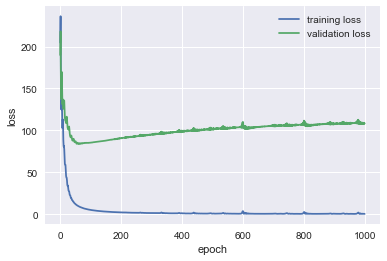

Best epoch number is:  60
The lowest validation loss is:  9.145073954020914
At the same epoch, the training loss is:  3.086062349135854


In [376]:
tr_loss, te_loss=plot_NN(epochs, tr_losses, te_losses)
print("Best epoch number is: ", te_loss.index(min(te_loss)))
print("The lowest validation loss is: ", min(te_loss))
print("At the same epoch, the training loss is: ", tr_loss[te_loss.index(min(te_loss))])

In [390]:
print("Ventricles_Norm")
ventricles_train_pred, ventricles_val_pred, tr_losses, te_losses=ventricles_pred=NN(x_train,y_train_ventricles,x_val,y_val_ventricles)


Ventricles_Norm
Iter 0, training loss 295.494537, validation loss 286.139008
Iter 1, training loss 38.278706, validation loss 36.705318
Iter 2, training loss 30.270189, validation loss 30.478430
Iter 3, training loss 114.650520, validation loss 114.120354
Iter 4, training loss 93.249313, validation loss 93.251190
Iter 5, training loss 32.032940, validation loss 32.467907
Iter 6, training loss 1.475252, validation loss 1.646666
Iter 7, training loss 10.065543, validation loss 9.759432
Iter 8, training loss 31.831715, validation loss 31.168251
Iter 9, training loss 42.233803, validation loss 41.493191
Iter 10, training loss 35.407803, validation loss 34.796410
Iter 11, training loss 19.641846, validation loss 19.235363
Iter 12, training loss 5.910471, validation loss 5.713643
Iter 13, training loss 0.470615, validation loss 0.487421
Iter 14, training loss 3.193468, validation loss 3.433158
Iter 15, training loss 9.685003, validation loss 10.130063
Iter 16, training loss 14.856505, valida

Iter 140, training loss 0.031678, validation loss 0.105417
Iter 141, training loss 0.031321, validation loss 0.105057
Iter 142, training loss 0.030983, validation loss 0.104681
Iter 143, training loss 0.030619, validation loss 0.104151
Iter 144, training loss 0.030266, validation loss 0.103550
Iter 145, training loss 0.029936, validation loss 0.103017
Iter 146, training loss 0.029587, validation loss 0.102605
Iter 147, training loss 0.029241, validation loss 0.102310
Iter 148, training loss 0.028918, validation loss 0.101996
Iter 149, training loss 0.028585, validation loss 0.101578
Iter 150, training loss 0.028263, validation loss 0.101100
Iter 151, training loss 0.027956, validation loss 0.100708
Iter 152, training loss 0.027649, validation loss 0.100381
Iter 153, training loss 0.027343, validation loss 0.100042
Iter 154, training loss 0.027037, validation loss 0.099595
Iter 155, training loss 0.026746, validation loss 0.099078
Iter 156, training loss 0.026456, validation loss 0.0985

Iter 279, training loss 0.009501, validation loss 0.078207
Iter 280, training loss 0.009440, validation loss 0.078174
Iter 281, training loss 0.009405, validation loss 0.078059
Iter 282, training loss 0.009343, validation loss 0.078138
Iter 283, training loss 0.009263, validation loss 0.077993
Iter 284, training loss 0.009213, validation loss 0.077911
Iter 285, training loss 0.009171, validation loss 0.077936
Iter 286, training loss 0.009111, validation loss 0.077728
Iter 287, training loss 0.009040, validation loss 0.077748
Iter 288, training loss 0.008987, validation loss 0.077703
Iter 289, training loss 0.008945, validation loss 0.077586
Iter 290, training loss 0.008891, validation loss 0.077645
Iter 291, training loss 0.008828, validation loss 0.077520
Iter 292, training loss 0.008772, validation loss 0.077478
Iter 293, training loss 0.008726, validation loss 0.077467
Iter 294, training loss 0.008680, validation loss 0.077363
Iter 295, training loss 0.008628, validation loss 0.0773

Iter 418, training loss 0.004718, validation loss 0.072320
Iter 419, training loss 0.004694, validation loss 0.072316
Iter 420, training loss 0.004666, validation loss 0.072379
Iter 421, training loss 0.004648, validation loss 0.072380
Iter 422, training loss 0.004631, validation loss 0.072280
Iter 423, training loss 0.004616, validation loss 0.072180
Iter 424, training loss 0.004605, validation loss 0.072272
Iter 425, training loss 0.004587, validation loss 0.072203
Iter 426, training loss 0.004576, validation loss 0.072255
Iter 427, training loss 0.004552, validation loss 0.072167
Iter 428, training loss 0.004537, validation loss 0.072219
Iter 429, training loss 0.004511, validation loss 0.072052
Iter 430, training loss 0.004494, validation loss 0.072110
Iter 431, training loss 0.004468, validation loss 0.072108
Iter 432, training loss 0.004451, validation loss 0.072118
Iter 433, training loss 0.004425, validation loss 0.071950
Iter 434, training loss 0.004409, validation loss 0.0719

Iter 557, training loss 0.002861, validation loss 0.069969
Iter 558, training loss 0.002850, validation loss 0.070148
Iter 559, training loss 0.002832, validation loss 0.069906
Iter 560, training loss 0.002818, validation loss 0.070027
Iter 561, training loss 0.002805, validation loss 0.069923
Iter 562, training loss 0.002794, validation loss 0.070025
Iter 563, training loss 0.002783, validation loss 0.069891
Iter 564, training loss 0.002772, validation loss 0.069928
Iter 565, training loss 0.002763, validation loss 0.069871
Iter 566, training loss 0.002753, validation loss 0.069941
Iter 567, training loss 0.002745, validation loss 0.069898
Iter 568, training loss 0.002735, validation loss 0.069901
Iter 569, training loss 0.002727, validation loss 0.069814
Iter 570, training loss 0.002718, validation loss 0.069850
Iter 571, training loss 0.002710, validation loss 0.069849
Iter 572, training loss 0.002701, validation loss 0.069862
Iter 573, training loss 0.002694, validation loss 0.0697

Iter 696, training loss 0.001892, validation loss 0.068954
Iter 697, training loss 0.001887, validation loss 0.069024
Iter 698, training loss 0.001882, validation loss 0.068886
Iter 699, training loss 0.001877, validation loss 0.068956
Iter 700, training loss 0.001875, validation loss 0.068888
Iter 701, training loss 0.001873, validation loss 0.069035
Iter 702, training loss 0.001873, validation loss 0.068850
Iter 703, training loss 0.001874, validation loss 0.069046
Iter 704, training loss 0.001880, validation loss 0.068795
Iter 705, training loss 0.001887, validation loss 0.069126
Iter 706, training loss 0.001889, validation loss 0.068841
Iter 707, training loss 0.001887, validation loss 0.069223
Iter 708, training loss 0.001880, validation loss 0.068776
Iter 709, training loss 0.001868, validation loss 0.069050
Iter 710, training loss 0.001847, validation loss 0.068823
Iter 711, training loss 0.001832, validation loss 0.069101
Iter 712, training loss 0.001817, validation loss 0.0688

Iter 835, training loss 0.001404, validation loss 0.068746
Iter 836, training loss 0.001380, validation loss 0.068220
Iter 837, training loss 0.001350, validation loss 0.068474
Iter 838, training loss 0.001333, validation loss 0.068276
Iter 839, training loss 0.001320, validation loss 0.068424
Iter 840, training loss 0.001317, validation loss 0.068295
Iter 841, training loss 0.001311, validation loss 0.068231
Iter 842, training loss 0.001314, validation loss 0.068369
Iter 843, training loss 0.001313, validation loss 0.068236
Iter 844, training loss 0.001318, validation loss 0.068432
Iter 845, training loss 0.001317, validation loss 0.068223
Iter 846, training loss 0.001313, validation loss 0.068464
Iter 847, training loss 0.001313, validation loss 0.068156
Iter 848, training loss 0.001313, validation loss 0.068447
Iter 849, training loss 0.001317, validation loss 0.068230
Iter 850, training loss 0.001310, validation loss 0.068529
Iter 851, training loss 0.001306, validation loss 0.0681

Iter 974, training loss 0.000993, validation loss 0.067947
Iter 975, training loss 0.001012, validation loss 0.068326
Iter 976, training loss 0.001037, validation loss 0.067906
Iter 977, training loss 0.001062, validation loss 0.068503
Iter 978, training loss 0.001081, validation loss 0.067898
Iter 979, training loss 0.001085, validation loss 0.068571
Iter 980, training loss 0.001064, validation loss 0.067919
Iter 981, training loss 0.001026, validation loss 0.068472
Iter 982, training loss 0.000986, validation loss 0.067991
Iter 983, training loss 0.000956, validation loss 0.068225
Iter 984, training loss 0.000943, validation loss 0.068071
Iter 985, training loss 0.000944, validation loss 0.068044
Iter 986, training loss 0.000955, validation loss 0.068240
Iter 987, training loss 0.000973, validation loss 0.067965
Iter 988, training loss 0.000991, validation loss 0.068373
Iter 989, training loss 0.001001, validation loss 0.067911
Iter 990, training loss 0.000996, validation loss 0.0683

Iter 1111, training loss 0.000720, validation loss 0.068042
Iter 1112, training loss 0.000720, validation loss 0.067958
Iter 1113, training loss 0.000720, validation loss 0.068088
Iter 1114, training loss 0.000721, validation loss 0.067952
Iter 1115, training loss 0.000723, validation loss 0.068113
Iter 1116, training loss 0.000726, validation loss 0.067909
Iter 1117, training loss 0.000733, validation loss 0.068191
Iter 1118, training loss 0.000742, validation loss 0.067883
Iter 1119, training loss 0.000756, validation loss 0.068271
Iter 1120, training loss 0.000769, validation loss 0.067834
Iter 1121, training loss 0.000784, validation loss 0.068377
Iter 1122, training loss 0.000793, validation loss 0.067842
Iter 1123, training loss 0.000797, validation loss 0.068436
Iter 1124, training loss 0.000786, validation loss 0.067861
Iter 1125, training loss 0.000767, validation loss 0.068376
Iter 1126, training loss 0.000742, validation loss 0.067894
Iter 1127, training loss 0.000722, valid

Iter 1248, training loss 0.000549, validation loss 0.068111
Iter 1249, training loss 0.000549, validation loss 0.068079
Iter 1250, training loss 0.000550, validation loss 0.068156
Iter 1251, training loss 0.000553, validation loss 0.068026
Iter 1252, training loss 0.000558, validation loss 0.068244
Iter 1253, training loss 0.000562, validation loss 0.068009
Iter 1254, training loss 0.000566, validation loss 0.068285
Iter 1255, training loss 0.000569, validation loss 0.067969
Iter 1256, training loss 0.000573, validation loss 0.068327
Iter 1257, training loss 0.000574, validation loss 0.067986
Iter 1258, training loss 0.000572, validation loss 0.068340
Iter 1259, training loss 0.000567, validation loss 0.067991
Iter 1260, training loss 0.000562, validation loss 0.068316
Iter 1261, training loss 0.000556, validation loss 0.068009
Iter 1262, training loss 0.000552, validation loss 0.068271
Iter 1263, training loss 0.000547, validation loss 0.068034
Iter 1264, training loss 0.000543, valid

Iter 1385, training loss 0.000501, validation loss 0.068093
Iter 1386, training loss 0.000504, validation loss 0.068641
Iter 1387, training loss 0.000499, validation loss 0.068100
Iter 1388, training loss 0.000490, validation loss 0.068607
Iter 1389, training loss 0.000475, validation loss 0.068132
Iter 1390, training loss 0.000458, validation loss 0.068517
Iter 1391, training loss 0.000443, validation loss 0.068174
Iter 1392, training loss 0.000431, validation loss 0.068397
Iter 1393, training loss 0.000424, validation loss 0.068232
Iter 1394, training loss 0.000420, validation loss 0.068281
Iter 1395, training loss 0.000420, validation loss 0.068282
Iter 1396, training loss 0.000422, validation loss 0.068212
Iter 1397, training loss 0.000425, validation loss 0.068356
Iter 1398, training loss 0.000431, validation loss 0.068162
Iter 1399, training loss 0.000437, validation loss 0.068423
Iter 1400, training loss 0.000443, validation loss 0.068134
Iter 1401, training loss 0.000449, valid

Iter 1522, training loss 0.000342, validation loss 0.068323
Iter 1523, training loss 0.000350, validation loss 0.068517
Iter 1524, training loss 0.000361, validation loss 0.068265
Iter 1525, training loss 0.000371, validation loss 0.068630
Iter 1526, training loss 0.000380, validation loss 0.068230
Iter 1527, training loss 0.000385, validation loss 0.068682
Iter 1528, training loss 0.000385, validation loss 0.068246
Iter 1529, training loss 0.000379, validation loss 0.068692
Iter 1530, training loss 0.000368, validation loss 0.068280
Iter 1531, training loss 0.000357, validation loss 0.068628
Iter 1532, training loss 0.000346, validation loss 0.068336
Iter 1533, training loss 0.000338, validation loss 0.068526
Iter 1534, training loss 0.000333, validation loss 0.068367
Iter 1535, training loss 0.000330, validation loss 0.068432
Iter 1536, training loss 0.000329, validation loss 0.068432
Iter 1537, training loss 0.000330, validation loss 0.068369
Iter 1538, training loss 0.000332, valid

Iter 1659, training loss 0.000282, validation loss 0.068658
Iter 1660, training loss 0.000302, validation loss 0.068368
Iter 1661, training loss 0.000325, validation loss 0.068816
Iter 1662, training loss 0.000345, validation loss 0.068325
Iter 1663, training loss 0.000355, validation loss 0.068908
Iter 1664, training loss 0.000351, validation loss 0.068326
Iter 1665, training loss 0.000335, validation loss 0.068880
Iter 1666, training loss 0.000313, validation loss 0.068396
Iter 1667, training loss 0.000290, validation loss 0.068747
Iter 1668, training loss 0.000273, validation loss 0.068490
Iter 1669, training loss 0.000265, validation loss 0.068588
Iter 1670, training loss 0.000267, validation loss 0.068615
Iter 1671, training loss 0.000275, validation loss 0.068447
Iter 1672, training loss 0.000286, validation loss 0.068704
Iter 1673, training loss 0.000297, validation loss 0.068377
Iter 1674, training loss 0.000305, validation loss 0.068772
Iter 1675, training loss 0.000307, valid

Iter 1796, training loss 0.000217, validation loss 0.068563
Iter 1797, training loss 0.000218, validation loss 0.068635
Iter 1798, training loss 0.000218, validation loss 0.068541
Iter 1799, training loss 0.000219, validation loss 0.068663
Iter 1800, training loss 0.000221, validation loss 0.068517
Iter 1801, training loss 0.000224, validation loss 0.068698
Iter 1802, training loss 0.000227, validation loss 0.068488
Iter 1803, training loss 0.000233, validation loss 0.068751
Iter 1804, training loss 0.000240, validation loss 0.068454
Iter 1805, training loss 0.000250, validation loss 0.068824
Iter 1806, training loss 0.000264, validation loss 0.068422
Iter 1807, training loss 0.000283, validation loss 0.068946
Iter 1808, training loss 0.000307, validation loss 0.068401
Iter 1809, training loss 0.000332, validation loss 0.069089
Iter 1810, training loss 0.000357, validation loss 0.068397
Iter 1811, training loss 0.000376, validation loss 0.069216
Iter 1812, training loss 0.000384, valid

Iter 1933, training loss 0.000180, validation loss 0.068766
Iter 1934, training loss 0.000187, validation loss 0.068703
Iter 1935, training loss 0.000229, validation loss 0.069052
Iter 1936, training loss 0.000286, validation loss 0.068509
Iter 1937, training loss 0.000335, validation loss 0.069278
Iter 1938, training loss 0.000356, validation loss 0.068463
Iter 1939, training loss 0.000331, validation loss 0.069274
Iter 1940, training loss 0.000281, validation loss 0.068521
Iter 1941, training loss 0.000223, validation loss 0.069046
Iter 1942, training loss 0.000184, validation loss 0.068699
Iter 1943, training loss 0.000176, validation loss 0.068754
Iter 1944, training loss 0.000193, validation loss 0.068945
Iter 1945, training loss 0.000223, validation loss 0.068595
Iter 1946, training loss 0.000248, validation loss 0.069120
Iter 1947, training loss 0.000255, validation loss 0.068545
Iter 1948, training loss 0.000243, validation loss 0.069086
Iter 1949, training loss 0.000218, valid

Iter 2070, training loss 0.000164, validation loss 0.068777
Iter 2071, training loss 0.000145, validation loss 0.068859
Iter 2072, training loss 0.000167, validation loss 0.069027
Iter 2073, training loss 0.000213, validation loss 0.068618
Iter 2074, training loss 0.000265, validation loss 0.069291
Iter 2075, training loss 0.000307, validation loss 0.068552
Iter 2076, training loss 0.000314, validation loss 0.069392
Iter 2077, training loss 0.000290, validation loss 0.068563
Iter 2078, training loss 0.000242, validation loss 0.069260
Iter 2079, training loss 0.000190, validation loss 0.068684
Iter 2080, training loss 0.000153, validation loss 0.068990
Iter 2081, training loss 0.000143, validation loss 0.068896
Iter 2082, training loss 0.000156, validation loss 0.068762
Iter 2083, training loss 0.000181, validation loss 0.069111
Iter 2084, training loss 0.000205, validation loss 0.068645
Iter 2085, training loss 0.000216, validation loss 0.069186
Iter 2086, training loss 0.000213, valid

Iter 2207, training loss 0.000180, validation loss 0.069177
Iter 2208, training loss 0.000181, validation loss 0.068661
Iter 2209, training loss 0.000183, validation loss 0.069205
Iter 2210, training loss 0.000183, validation loss 0.068651
Iter 2211, training loss 0.000181, validation loss 0.069181
Iter 2212, training loss 0.000180, validation loss 0.068662
Iter 2213, training loss 0.000178, validation loss 0.069199
Iter 2214, training loss 0.000175, validation loss 0.068668
Iter 2215, training loss 0.000169, validation loss 0.069154
Iter 2216, training loss 0.000162, validation loss 0.068683
Iter 2217, training loss 0.000156, validation loss 0.069112
Iter 2218, training loss 0.000148, validation loss 0.068696
Iter 2219, training loss 0.000141, validation loss 0.069044
Iter 2220, training loss 0.000133, validation loss 0.068732
Iter 2221, training loss 0.000127, validation loss 0.068973
Iter 2222, training loss 0.000122, validation loss 0.068769
Iter 2223, training loss 0.000119, valid

Iter 2344, training loss 0.000192, validation loss 0.069385
Iter 2345, training loss 0.000162, validation loss 0.068761
Iter 2346, training loss 0.000131, validation loss 0.069204
Iter 2347, training loss 0.000109, validation loss 0.068871
Iter 2348, training loss 0.000099, validation loss 0.068984
Iter 2349, training loss 0.000101, validation loss 0.068995
Iter 2350, training loss 0.000111, validation loss 0.068807
Iter 2351, training loss 0.000124, validation loss 0.069105
Iter 2352, training loss 0.000138, validation loss 0.068708
Iter 2353, training loss 0.000147, validation loss 0.069174
Iter 2354, training loss 0.000153, validation loss 0.068691
Iter 2355, training loss 0.000151, validation loss 0.069208
Iter 2356, training loss 0.000144, validation loss 0.068723
Iter 2357, training loss 0.000134, validation loss 0.069170
Iter 2358, training loss 0.000121, validation loss 0.068787
Iter 2359, training loss 0.000110, validation loss 0.069074
Iter 2360, training loss 0.000101, valid

Iter 2481, training loss 0.000090, validation loss 0.068856
Iter 2482, training loss 0.000092, validation loss 0.069076
Iter 2483, training loss 0.000096, validation loss 0.068828
Iter 2484, training loss 0.000100, validation loss 0.069118
Iter 2485, training loss 0.000107, validation loss 0.068793
Iter 2486, training loss 0.000116, validation loss 0.069193
Iter 2487, training loss 0.000129, validation loss 0.068755
Iter 2488, training loss 0.000147, validation loss 0.069308
Iter 2489, training loss 0.000172, validation loss 0.068714
Iter 2490, training loss 0.000204, validation loss 0.069479
Iter 2491, training loss 0.000248, validation loss 0.068684
Iter 2492, training loss 0.000300, validation loss 0.069734
Iter 2493, training loss 0.000367, validation loss 0.068691
Iter 2494, training loss 0.000428, validation loss 0.070029
Iter 2495, training loss 0.000483, validation loss 0.068736
Iter 2496, training loss 0.000492, validation loss 0.070188
Iter 2497, training loss 0.000465, valid

Iter 2618, training loss 0.000069, validation loss 0.068977
Iter 2619, training loss 0.000069, validation loss 0.069011
Iter 2620, training loss 0.000069, validation loss 0.069026
Iter 2621, training loss 0.000070, validation loss 0.068959
Iter 2622, training loss 0.000072, validation loss 0.069071
Iter 2623, training loss 0.000073, validation loss 0.068924
Iter 2624, training loss 0.000076, validation loss 0.069113
Iter 2625, training loss 0.000078, validation loss 0.068905
Iter 2626, training loss 0.000080, validation loss 0.069155
Iter 2627, training loss 0.000083, validation loss 0.068894
Iter 2628, training loss 0.000085, validation loss 0.069191
Iter 2629, training loss 0.000088, validation loss 0.068878
Iter 2630, training loss 0.000091, validation loss 0.069221
Iter 2631, training loss 0.000095, validation loss 0.068858
Iter 2632, training loss 0.000099, validation loss 0.069258
Iter 2633, training loss 0.000106, validation loss 0.068827
Iter 2634, training loss 0.000113, valid

Iter 2755, training loss 0.000062, validation loss 0.068952
Iter 2756, training loss 0.000067, validation loss 0.069144
Iter 2757, training loss 0.000073, validation loss 0.068897
Iter 2758, training loss 0.000076, validation loss 0.069206
Iter 2759, training loss 0.000074, validation loss 0.068899
Iter 2760, training loss 0.000070, validation loss 0.069184
Iter 2761, training loss 0.000065, validation loss 0.068943
Iter 2762, training loss 0.000061, validation loss 0.069099
Iter 2763, training loss 0.000058, validation loss 0.068997
Iter 2764, training loss 0.000057, validation loss 0.069004
Iter 2765, training loss 0.000059, validation loss 0.069064
Iter 2766, training loss 0.000061, validation loss 0.068947
Iter 2767, training loss 0.000063, validation loss 0.069113
Iter 2768, training loss 0.000064, validation loss 0.068924
Iter 2769, training loss 0.000064, validation loss 0.069126
Iter 2770, training loss 0.000063, validation loss 0.068929
Iter 2771, training loss 0.000062, valid

Iter 2892, training loss 0.000052, validation loss 0.068960
Iter 2893, training loss 0.000051, validation loss 0.069083
Iter 2894, training loss 0.000050, validation loss 0.068979
Iter 2895, training loss 0.000050, validation loss 0.069068
Iter 2896, training loss 0.000049, validation loss 0.068996
Iter 2897, training loss 0.000049, validation loss 0.069050
Iter 2898, training loss 0.000048, validation loss 0.069010
Iter 2899, training loss 0.000048, validation loss 0.069032
Iter 2900, training loss 0.000048, validation loss 0.069022
Iter 2901, training loss 0.000048, validation loss 0.069020
Iter 2902, training loss 0.000048, validation loss 0.069034
Iter 2903, training loss 0.000048, validation loss 0.069010
Iter 2904, training loss 0.000048, validation loss 0.069044
Iter 2905, training loss 0.000048, validation loss 0.069003
Iter 2906, training loss 0.000048, validation loss 0.069056
Iter 2907, training loss 0.000048, validation loss 0.068996
Iter 2908, training loss 0.000049, valid

Iter 3029, training loss 0.000698, validation loss 0.068793
Iter 3030, training loss 0.000724, validation loss 0.070856
Iter 3031, training loss 0.000707, validation loss 0.068831
Iter 3032, training loss 0.000603, validation loss 0.070680
Iter 3033, training loss 0.000458, validation loss 0.068807
Iter 3034, training loss 0.000286, validation loss 0.070044
Iter 3035, training loss 0.000144, validation loss 0.068852
Iter 3036, training loss 0.000061, validation loss 0.069295
Iter 3037, training loss 0.000045, validation loss 0.069132
Iter 3038, training loss 0.000082, validation loss 0.068847
Iter 3039, training loss 0.000150, validation loss 0.069557
Iter 3040, training loss 0.000232, validation loss 0.068673
Iter 3041, training loss 0.000307, validation loss 0.069947
Iter 3042, training loss 0.000365, validation loss 0.068676
Iter 3043, training loss 0.000378, validation loss 0.070146
Iter 3044, training loss 0.000353, validation loss 0.068715
Iter 3045, training loss 0.000283, valid

Iter 3166, training loss 0.000096, validation loss 0.068740
Iter 3167, training loss 0.000104, validation loss 0.069402
Iter 3168, training loss 0.000114, validation loss 0.068721
Iter 3169, training loss 0.000125, validation loss 0.069477
Iter 3170, training loss 0.000140, validation loss 0.068696
Iter 3171, training loss 0.000158, validation loss 0.069578
Iter 3172, training loss 0.000181, validation loss 0.068664
Iter 3173, training loss 0.000209, validation loss 0.069718
Iter 3174, training loss 0.000246, validation loss 0.068635
Iter 3175, training loss 0.000290, validation loss 0.069922
Iter 3176, training loss 0.000346, validation loss 0.068629
Iter 3177, training loss 0.000409, validation loss 0.070208
Iter 3178, training loss 0.000487, validation loss 0.068648
Iter 3179, training loss 0.000563, validation loss 0.070521
Iter 3180, training loss 0.000646, validation loss 0.068701
Iter 3181, training loss 0.000700, validation loss 0.070809
Iter 3182, training loss 0.000738, valid

Iter 3303, training loss 0.000075, validation loss 0.068664
Iter 3304, training loss 0.000073, validation loss 0.069217
Iter 3305, training loss 0.000069, validation loss 0.068690
Iter 3306, training loss 0.000064, validation loss 0.069179
Iter 3307, training loss 0.000058, validation loss 0.068707
Iter 3308, training loss 0.000053, validation loss 0.069111
Iter 3309, training loss 0.000048, validation loss 0.068724
Iter 3310, training loss 0.000044, validation loss 0.069042
Iter 3311, training loss 0.000040, validation loss 0.068748
Iter 3312, training loss 0.000037, validation loss 0.068984
Iter 3313, training loss 0.000035, validation loss 0.068784
Iter 3314, training loss 0.000033, validation loss 0.068947
Iter 3315, training loss 0.000031, validation loss 0.068824
Iter 3316, training loss 0.000031, validation loss 0.068919
Iter 3317, training loss 0.000030, validation loss 0.068854
Iter 3318, training loss 0.000030, validation loss 0.068893
Iter 3319, training loss 0.000030, valid

Iter 3440, training loss 0.000027, validation loss 0.068658
Iter 3441, training loss 0.000026, validation loss 0.068716
Iter 3442, training loss 0.000026, validation loss 0.068679
Iter 3443, training loss 0.000026, validation loss 0.068701
Iter 3444, training loss 0.000026, validation loss 0.068700
Iter 3445, training loss 0.000026, validation loss 0.068686
Iter 3446, training loss 0.000026, validation loss 0.068712
Iter 3447, training loss 0.000026, validation loss 0.068671
Iter 3448, training loss 0.000026, validation loss 0.068720
Iter 3449, training loss 0.000026, validation loss 0.068661
Iter 3450, training loss 0.000026, validation loss 0.068728
Iter 3451, training loss 0.000026, validation loss 0.068660
Iter 3452, training loss 0.000026, validation loss 0.068739
Iter 3453, training loss 0.000027, validation loss 0.068659
Iter 3454, training loss 0.000027, validation loss 0.068742
Iter 3455, training loss 0.000027, validation loss 0.068653
Iter 3456, training loss 0.000027, valid

Iter 3577, training loss 0.000041, validation loss 0.068359
Iter 3578, training loss 0.000046, validation loss 0.068753
Iter 3579, training loss 0.000052, validation loss 0.068324
Iter 3580, training loss 0.000061, validation loss 0.068834
Iter 3581, training loss 0.000074, validation loss 0.068279
Iter 3582, training loss 0.000092, validation loss 0.068960
Iter 3583, training loss 0.000117, validation loss 0.068223
Iter 3584, training loss 0.000152, validation loss 0.069157
Iter 3585, training loss 0.000203, validation loss 0.068159
Iter 3586, training loss 0.000274, validation loss 0.069477
Iter 3587, training loss 0.000379, validation loss 0.068115
Iter 3588, training loss 0.000527, validation loss 0.070023
Iter 3589, training loss 0.000746, validation loss 0.068170
Iter 3590, training loss 0.001050, validation loss 0.070985
Iter 3591, training loss 0.001494, validation loss 0.068497
Iter 3592, training loss 0.002065, validation loss 0.072606
Iter 3593, training loss 0.002830, valid

Iter 3714, training loss 0.001989, validation loss 0.068502
Iter 3715, training loss 0.003284, validation loss 0.074265
Iter 3716, training loss 0.004253, validation loss 0.069902
Iter 3717, training loss 0.004398, validation loss 0.075752
Iter 3718, training loss 0.003783, validation loss 0.069704
Iter 3719, training loss 0.002470, validation loss 0.073045
Iter 3720, training loss 0.001096, validation loss 0.068214
Iter 3721, training loss 0.000221, validation loss 0.069210
Iter 3722, training loss 0.000114, validation loss 0.068819
Iter 3723, training loss 0.000615, validation loss 0.067890
Iter 3724, training loss 0.001330, validation loss 0.071126
Iter 3725, training loss 0.001876, validation loss 0.068176
Iter 3726, training loss 0.002014, validation loss 0.072002
Iter 3727, training loss 0.001729, validation loss 0.068092
Iter 3728, training loss 0.001133, validation loss 0.070604
Iter 3729, training loss 0.000524, validation loss 0.067720
Iter 3730, training loss 0.000128, valid

Iter 3851, training loss 0.000675, validation loss 0.067347
Iter 3852, training loss 0.000444, validation loss 0.069003
Iter 3853, training loss 0.000231, validation loss 0.067300
Iter 3854, training loss 0.000087, validation loss 0.068072
Iter 3855, training loss 0.000031, validation loss 0.067644
Iter 3856, training loss 0.000055, validation loss 0.067503
Iter 3857, training loss 0.000128, validation loss 0.068232
Iter 3858, training loss 0.000219, validation loss 0.067314
Iter 3859, training loss 0.000300, validation loss 0.068690
Iter 3860, training loss 0.000352, validation loss 0.067279
Iter 3861, training loss 0.000362, validation loss 0.068804
Iter 3862, training loss 0.000335, validation loss 0.067251
Iter 3863, training loss 0.000280, validation loss 0.068602
Iter 3864, training loss 0.000213, validation loss 0.067254
Iter 3865, training loss 0.000146, validation loss 0.068239
Iter 3866, training loss 0.000090, validation loss 0.067357
Iter 3867, training loss 0.000050, valid

Iter 3988, training loss 0.000077, validation loss 0.067417
Iter 3989, training loss 0.000082, validation loss 0.066785
Iter 3990, training loss 0.000086, validation loss 0.067443
Iter 3991, training loss 0.000087, validation loss 0.066762
Iter 3992, training loss 0.000088, validation loss 0.067437
Iter 3993, training loss 0.000087, validation loss 0.066749
Iter 3994, training loss 0.000086, validation loss 0.067422
Iter 3995, training loss 0.000085, validation loss 0.066750
Iter 3996, training loss 0.000083, validation loss 0.067414
Iter 3997, training loss 0.000082, validation loss 0.066755
Iter 3998, training loss 0.000081, validation loss 0.067411
Iter 3999, training loss 0.000082, validation loss 0.066756
Iter 4000, training loss 0.000083, validation loss 0.067417
Iter 4001, training loss 0.000085, validation loss 0.066749
Iter 4002, training loss 0.000089, validation loss 0.067438
Iter 4003, training loss 0.000094, validation loss 0.066733
Iter 4004, training loss 0.000102, valid

Iter 4125, training loss 0.012681, validation loss 0.084311
Iter 4126, training loss 0.017911, validation loss 0.079587
Iter 4127, training loss 0.024530, validation loss 0.098354
Iter 4128, training loss 0.032706, validation loss 0.093176
Iter 4129, training loss 0.041032, validation loss 0.117102
Iter 4130, training loss 0.048475, validation loss 0.108370
Iter 4131, training loss 0.051400, validation loss 0.128318
Iter 4132, training loss 0.048357, validation loss 0.109035
Iter 4133, training loss 0.037433, validation loss 0.112347
Iter 4134, training loss 0.022356, validation loss 0.085553
Iter 4135, training loss 0.008298, validation loss 0.078843
Iter 4136, training loss 0.001007, validation loss 0.067913
Iter 4137, training loss 0.002200, validation loss 0.068430
Iter 4138, training loss 0.008820, validation loss 0.079537
Iter 4139, training loss 0.015494, validation loss 0.078829
Iter 4140, training loss 0.017846, validation loss 0.090152
Iter 4141, training loss 0.015010, valid

Iter 4262, training loss 0.059992, validation loss 0.136893
Iter 4263, training loss 0.076453, validation loss 0.135052
Iter 4264, training loss 0.088495, validation loss 0.167250
Iter 4265, training loss 0.091857, validation loss 0.151446
Iter 4266, training loss 0.080221, validation loss 0.156929
Iter 4267, training loss 0.055594, validation loss 0.117412
Iter 4268, training loss 0.026248, validation loss 0.097586
Iter 4269, training loss 0.005438, validation loss 0.070577
Iter 4270, training loss 0.001414, validation loss 0.067472
Iter 4271, training loss 0.011722, validation loss 0.081251
Iter 4272, training loss 0.025161, validation loss 0.088241
Iter 4273, training loss 0.030215, validation loss 0.101861
Iter 4274, training loss 0.023549, validation loss 0.086115
Iter 4275, training loss 0.010832, validation loss 0.079644
Iter 4276, training loss 0.001683, validation loss 0.066277
Iter 4277, training loss 0.001454, validation loss 0.065950
Iter 4278, training loss 0.007763, valid

Iter 4399, training loss 0.000036, validation loss 0.064046
Iter 4400, training loss 0.000035, validation loss 0.064079
Iter 4401, training loss 0.000035, validation loss 0.064046
Iter 4402, training loss 0.000035, validation loss 0.064075
Iter 4403, training loss 0.000035, validation loss 0.064045
Iter 4404, training loss 0.000034, validation loss 0.064072
Iter 4405, training loss 0.000034, validation loss 0.064044
Iter 4406, training loss 0.000034, validation loss 0.064070
Iter 4407, training loss 0.000034, validation loss 0.064043
Iter 4408, training loss 0.000034, validation loss 0.064068
Iter 4409, training loss 0.000033, validation loss 0.064042
Iter 4410, training loss 0.000033, validation loss 0.064067
Iter 4411, training loss 0.000033, validation loss 0.064040
Iter 4412, training loss 0.000033, validation loss 0.064066
Iter 4413, training loss 0.000033, validation loss 0.064037
Iter 4414, training loss 0.000033, validation loss 0.064067
Iter 4415, training loss 0.000033, valid

Iter 4536, training loss 0.000128, validation loss 0.061256
Iter 4537, training loss 0.000116, validation loss 0.061091
Iter 4538, training loss 0.000105, validation loss 0.061146
Iter 4539, training loss 0.000108, validation loss 0.061179
Iter 4540, training loss 0.000115, validation loss 0.061070
Iter 4541, training loss 0.000113, validation loss 0.061204
Iter 4542, training loss 0.000104, validation loss 0.061083
Iter 4543, training loss 0.000099, validation loss 0.061112
Iter 4544, training loss 0.000101, validation loss 0.061152
Iter 4545, training loss 0.000104, validation loss 0.061056
Iter 4546, training loss 0.000102, validation loss 0.061160
Iter 4547, training loss 0.000096, validation loss 0.061074
Iter 4548, training loss 0.000093, validation loss 0.061090
Iter 4549, training loss 0.000095, validation loss 0.061128
Iter 4550, training loss 0.000096, validation loss 0.061048
Iter 4551, training loss 0.000094, validation loss 0.061128
Iter 4552, training loss 0.000090, valid

Iter 4673, training loss 0.000039, validation loss 0.060854
Iter 4674, training loss 0.000038, validation loss 0.060853
Iter 4675, training loss 0.000038, validation loss 0.060852
Iter 4676, training loss 0.000038, validation loss 0.060851
Iter 4677, training loss 0.000038, validation loss 0.060850
Iter 4678, training loss 0.000038, validation loss 0.060849
Iter 4679, training loss 0.000037, validation loss 0.060848
Iter 4680, training loss 0.000037, validation loss 0.060847
Iter 4681, training loss 0.000037, validation loss 0.060846
Iter 4682, training loss 0.000037, validation loss 0.060845
Iter 4683, training loss 0.000037, validation loss 0.060844
Iter 4684, training loss 0.000037, validation loss 0.060843
Iter 4685, training loss 0.000036, validation loss 0.060842
Iter 4686, training loss 0.000036, validation loss 0.060842
Iter 4687, training loss 0.000036, validation loss 0.060841
Iter 4688, training loss 0.000036, validation loss 0.060840
Iter 4689, training loss 0.000036, valid

Iter 4810, training loss 0.002178, validation loss 0.058889
Iter 4811, training loss 0.014213, validation loss 0.070296
Iter 4812, training loss 0.021578, validation loss 0.080594
Iter 4813, training loss 0.002955, validation loss 0.059126
Iter 4814, training loss 0.008541, validation loss 0.064406
Iter 4815, training loss 0.016160, validation loss 0.074368
Iter 4816, training loss 0.002911, validation loss 0.058889
Iter 4817, training loss 0.005724, validation loss 0.061554
Iter 4818, training loss 0.011928, validation loss 0.069629
Iter 4819, training loss 0.002447, validation loss 0.058421
Iter 4820, training loss 0.004189, validation loss 0.060074
Iter 4821, training loss 0.008791, validation loss 0.066200
Iter 4822, training loss 0.001909, validation loss 0.057944
Iter 4823, training loss 0.003250, validation loss 0.059200
Iter 4824, training loss 0.006498, validation loss 0.063649
Iter 4825, training loss 0.001456, validation loss 0.057512
Iter 4826, training loss 0.002607, valid

Iter 4947, training loss 0.000105, validation loss 0.055686
Iter 4948, training loss 0.000104, validation loss 0.055685
Iter 4949, training loss 0.000103, validation loss 0.055683
Iter 4950, training loss 0.000103, validation loss 0.055681
Iter 4951, training loss 0.000102, validation loss 0.055680
Iter 4952, training loss 0.000101, validation loss 0.055678
Iter 4953, training loss 0.000100, validation loss 0.055676
Iter 4954, training loss 0.000100, validation loss 0.055675
Iter 4955, training loss 0.000099, validation loss 0.055673
Iter 4956, training loss 0.000098, validation loss 0.055672
Iter 4957, training loss 0.000097, validation loss 0.055671
Iter 4958, training loss 0.000097, validation loss 0.055669
Iter 4959, training loss 0.000096, validation loss 0.055667
Iter 4960, training loss 0.000095, validation loss 0.055665
Iter 4961, training loss 0.000094, validation loss 0.055663
Iter 4962, training loss 0.000094, validation loss 0.055662
Iter 4963, training loss 0.000093, valid

Iter 5084, training loss 0.000046, validation loss 0.055533
Iter 5085, training loss 0.000046, validation loss 0.055532
Iter 5086, training loss 0.000046, validation loss 0.055531
Iter 5087, training loss 0.000045, validation loss 0.055530
Iter 5088, training loss 0.000045, validation loss 0.055529
Iter 5089, training loss 0.000045, validation loss 0.055528
Iter 5090, training loss 0.000045, validation loss 0.055527
Iter 5091, training loss 0.000045, validation loss 0.055526
Iter 5092, training loss 0.000044, validation loss 0.055525
Iter 5093, training loss 0.000044, validation loss 0.055524
Iter 5094, training loss 0.000044, validation loss 0.055523
Iter 5095, training loss 0.000044, validation loss 0.055523
Iter 5096, training loss 0.000044, validation loss 0.055522
Iter 5097, training loss 0.000043, validation loss 0.055521
Iter 5098, training loss 0.000043, validation loss 0.055520
Iter 5099, training loss 0.000043, validation loss 0.055519
Iter 5100, training loss 0.000043, valid

Iter 5221, training loss 0.000026, validation loss 0.055420
Iter 5222, training loss 0.000026, validation loss 0.055419
Iter 5223, training loss 0.000026, validation loss 0.055419
Iter 5224, training loss 0.000026, validation loss 0.055418
Iter 5225, training loss 0.000026, validation loss 0.055418
Iter 5226, training loss 0.000026, validation loss 0.055417
Iter 5227, training loss 0.000026, validation loss 0.055416
Iter 5228, training loss 0.000026, validation loss 0.055416
Iter 5229, training loss 0.000026, validation loss 0.055415
Iter 5230, training loss 0.000026, validation loss 0.055415
Iter 5231, training loss 0.000026, validation loss 0.055414
Iter 5232, training loss 0.000025, validation loss 0.055414
Iter 5233, training loss 0.000025, validation loss 0.055413
Iter 5234, training loss 0.000025, validation loss 0.055412
Iter 5235, training loss 0.000025, validation loss 0.055412
Iter 5236, training loss 0.000025, validation loss 0.055411
Iter 5237, training loss 0.000025, valid

Iter 5358, training loss 0.000017, validation loss 0.055340
Iter 5359, training loss 0.000017, validation loss 0.055340
Iter 5360, training loss 0.000017, validation loss 0.055339
Iter 5361, training loss 0.000017, validation loss 0.055338
Iter 5362, training loss 0.000017, validation loss 0.055338
Iter 5363, training loss 0.000017, validation loss 0.055337
Iter 5364, training loss 0.000017, validation loss 0.055337
Iter 5365, training loss 0.000016, validation loss 0.055336
Iter 5366, training loss 0.000016, validation loss 0.055336
Iter 5367, training loss 0.000016, validation loss 0.055335
Iter 5368, training loss 0.000016, validation loss 0.055335
Iter 5369, training loss 0.000016, validation loss 0.055334
Iter 5370, training loss 0.000016, validation loss 0.055334
Iter 5371, training loss 0.000016, validation loss 0.055333
Iter 5372, training loss 0.000016, validation loss 0.055333
Iter 5373, training loss 0.000016, validation loss 0.055332
Iter 5374, training loss 0.000016, valid

Iter 5495, training loss 0.000206, validation loss 0.050606
Iter 5496, training loss 0.000189, validation loss 0.050742
Iter 5497, training loss 0.000180, validation loss 0.050708
Iter 5498, training loss 0.000192, validation loss 0.050614
Iter 5499, training loss 0.000179, validation loss 0.050731
Iter 5500, training loss 0.000172, validation loss 0.050707
Iter 5501, training loss 0.000180, validation loss 0.050623
Iter 5502, training loss 0.000170, validation loss 0.050724
Iter 5503, training loss 0.000164, validation loss 0.050705
Iter 5504, training loss 0.000170, validation loss 0.050631
Iter 5505, training loss 0.000162, validation loss 0.050718
Iter 5506, training loss 0.000157, validation loss 0.050702
Iter 5507, training loss 0.000161, validation loss 0.050636
Iter 5508, training loss 0.000155, validation loss 0.050711
Iter 5509, training loss 0.000151, validation loss 0.050695
Iter 5510, training loss 0.000153, validation loss 0.050638
Iter 5511, training loss 0.000148, valid

Iter 5632, training loss 0.000052, validation loss 0.050558
Iter 5633, training loss 0.000052, validation loss 0.050558
Iter 5634, training loss 0.000052, validation loss 0.050558
Iter 5635, training loss 0.000051, validation loss 0.050557
Iter 5636, training loss 0.000051, validation loss 0.050557
Iter 5637, training loss 0.000051, validation loss 0.050557
Iter 5638, training loss 0.000050, validation loss 0.050557
Iter 5639, training loss 0.000050, validation loss 0.050556
Iter 5640, training loss 0.000050, validation loss 0.050556
Iter 5641, training loss 0.000050, validation loss 0.050555
Iter 5642, training loss 0.000049, validation loss 0.050555
Iter 5643, training loss 0.000049, validation loss 0.050555
Iter 5644, training loss 0.000049, validation loss 0.050554
Iter 5645, training loss 0.000048, validation loss 0.050554
Iter 5646, training loss 0.000048, validation loss 0.050554
Iter 5647, training loss 0.000048, validation loss 0.050554
Iter 5648, training loss 0.000047, valid

Iter 5769, training loss 0.000026, validation loss 0.050479
Iter 5770, training loss 0.000026, validation loss 0.050479
Iter 5771, training loss 0.000026, validation loss 0.050478
Iter 5772, training loss 0.000026, validation loss 0.050478
Iter 5773, training loss 0.000026, validation loss 0.050477
Iter 5774, training loss 0.000026, validation loss 0.050477
Iter 5775, training loss 0.000025, validation loss 0.050477
Iter 5776, training loss 0.000025, validation loss 0.050476
Iter 5777, training loss 0.000025, validation loss 0.050476
Iter 5778, training loss 0.000025, validation loss 0.050475
Iter 5779, training loss 0.000025, validation loss 0.050475
Iter 5780, training loss 0.000025, validation loss 0.050475
Iter 5781, training loss 0.000025, validation loss 0.050474
Iter 5782, training loss 0.000025, validation loss 0.050474
Iter 5783, training loss 0.000025, validation loss 0.050473
Iter 5784, training loss 0.000025, validation loss 0.050473
Iter 5785, training loss 0.000024, valid

Iter 5906, training loss 0.000016, validation loss 0.050449
Iter 5907, training loss 0.000015, validation loss 0.050449
Iter 5908, training loss 0.000015, validation loss 0.050449
Iter 5909, training loss 0.000015, validation loss 0.050449
Iter 5910, training loss 0.000015, validation loss 0.050449
Iter 5911, training loss 0.000015, validation loss 0.050448
Iter 5912, training loss 0.000015, validation loss 0.050448
Iter 5913, training loss 0.000015, validation loss 0.050448
Iter 5914, training loss 0.000015, validation loss 0.050448
Iter 5915, training loss 0.000015, validation loss 0.050448
Iter 5916, training loss 0.000015, validation loss 0.050448
Iter 5917, training loss 0.000015, validation loss 0.050448
Iter 5918, training loss 0.000015, validation loss 0.050448
Iter 5919, training loss 0.000015, validation loss 0.050447
Iter 5920, training loss 0.000015, validation loss 0.050447
Iter 5921, training loss 0.000015, validation loss 0.050447
Iter 5922, training loss 0.000015, valid

Iter 6043, training loss 0.000010, validation loss 0.050434
Iter 6044, training loss 0.000010, validation loss 0.050435
Iter 6045, training loss 0.000010, validation loss 0.050434
Iter 6046, training loss 0.000010, validation loss 0.050434
Iter 6047, training loss 0.000010, validation loss 0.050434
Iter 6048, training loss 0.000010, validation loss 0.050434
Iter 6049, training loss 0.000010, validation loss 0.050434
Iter 6050, training loss 0.000010, validation loss 0.050434
Iter 6051, training loss 0.000010, validation loss 0.050433
Iter 6052, training loss 0.000010, validation loss 0.050434
Iter 6053, training loss 0.000010, validation loss 0.050433
Iter 6054, training loss 0.000010, validation loss 0.050435
Iter 6055, training loss 0.000010, validation loss 0.050432
Iter 6056, training loss 0.000010, validation loss 0.050435
Iter 6057, training loss 0.000010, validation loss 0.050432
Iter 6058, training loss 0.000010, validation loss 0.050435
Iter 6059, training loss 0.000010, valid

Iter 6180, training loss 0.000143, validation loss 0.045522
Iter 6181, training loss 0.000148, validation loss 0.045467
Iter 6182, training loss 0.000147, validation loss 0.045643
Iter 6183, training loss 0.000136, validation loss 0.045537
Iter 6184, training loss 0.000141, validation loss 0.045461
Iter 6185, training loss 0.000137, validation loss 0.045610
Iter 6186, training loss 0.000130, validation loss 0.045546
Iter 6187, training loss 0.000134, validation loss 0.045459
Iter 6188, training loss 0.000129, validation loss 0.045581
Iter 6189, training loss 0.000125, validation loss 0.045550
Iter 6190, training loss 0.000127, validation loss 0.045460
Iter 6191, training loss 0.000122, validation loss 0.045557
Iter 6192, training loss 0.000120, validation loss 0.045551
Iter 6193, training loss 0.000121, validation loss 0.045463
Iter 6194, training loss 0.000117, validation loss 0.045538
Iter 6195, training loss 0.000116, validation loss 0.045548
Iter 6196, training loss 0.000116, valid

Iter 6317, training loss 0.000037, validation loss 0.045402
Iter 6318, training loss 0.000037, validation loss 0.045402
Iter 6319, training loss 0.000037, validation loss 0.045401
Iter 6320, training loss 0.000036, validation loss 0.045401
Iter 6321, training loss 0.000036, validation loss 0.045400
Iter 6322, training loss 0.000036, validation loss 0.045400
Iter 6323, training loss 0.000036, validation loss 0.045400
Iter 6324, training loss 0.000035, validation loss 0.045399
Iter 6325, training loss 0.000035, validation loss 0.045399
Iter 6326, training loss 0.000035, validation loss 0.045398
Iter 6327, training loss 0.000035, validation loss 0.045398
Iter 6328, training loss 0.000035, validation loss 0.045398
Iter 6329, training loss 0.000034, validation loss 0.045397
Iter 6330, training loss 0.000034, validation loss 0.045397
Iter 6331, training loss 0.000034, validation loss 0.045397
Iter 6332, training loss 0.000034, validation loss 0.045396
Iter 6333, training loss 0.000033, valid

Iter 6454, training loss 0.000017, validation loss 0.045379
Iter 6455, training loss 0.000017, validation loss 0.045379
Iter 6456, training loss 0.000017, validation loss 0.045379
Iter 6457, training loss 0.000017, validation loss 0.045379
Iter 6458, training loss 0.000017, validation loss 0.045378
Iter 6459, training loss 0.000017, validation loss 0.045378
Iter 6460, training loss 0.000016, validation loss 0.045378
Iter 6461, training loss 0.000016, validation loss 0.045378
Iter 6462, training loss 0.000016, validation loss 0.045378
Iter 6463, training loss 0.000016, validation loss 0.045378
Iter 6464, training loss 0.000016, validation loss 0.045378
Iter 6465, training loss 0.000016, validation loss 0.045378
Iter 6466, training loss 0.000016, validation loss 0.045378
Iter 6467, training loss 0.000016, validation loss 0.045377
Iter 6468, training loss 0.000016, validation loss 0.045377
Iter 6469, training loss 0.000016, validation loss 0.045377
Iter 6470, training loss 0.000016, valid

Iter 6591, training loss 0.000009, validation loss 0.045351
Iter 6592, training loss 0.000009, validation loss 0.045351
Iter 6593, training loss 0.000009, validation loss 0.045351
Iter 6594, training loss 0.000009, validation loss 0.045350
Iter 6595, training loss 0.000009, validation loss 0.045350
Iter 6596, training loss 0.000009, validation loss 0.045350
Iter 6597, training loss 0.000009, validation loss 0.045350
Iter 6598, training loss 0.000009, validation loss 0.045349
Iter 6599, training loss 0.000009, validation loss 0.045349
Iter 6600, training loss 0.000009, validation loss 0.045349
Iter 6601, training loss 0.000009, validation loss 0.045349
Iter 6602, training loss 0.000009, validation loss 0.045348
Iter 6603, training loss 0.000009, validation loss 0.045348
Iter 6604, training loss 0.000009, validation loss 0.045348
Iter 6605, training loss 0.000009, validation loss 0.045347
Iter 6606, training loss 0.000009, validation loss 0.045347
Iter 6607, training loss 0.000009, valid

Iter 6728, training loss 0.000006, validation loss 0.045314
Iter 6729, training loss 0.000006, validation loss 0.045313
Iter 6730, training loss 0.000006, validation loss 0.045313
Iter 6731, training loss 0.000006, validation loss 0.045313
Iter 6732, training loss 0.000006, validation loss 0.045312
Iter 6733, training loss 0.000006, validation loss 0.045312
Iter 6734, training loss 0.000006, validation loss 0.045312
Iter 6735, training loss 0.000006, validation loss 0.045311
Iter 6736, training loss 0.000006, validation loss 0.045311
Iter 6737, training loss 0.000006, validation loss 0.045311
Iter 6738, training loss 0.000006, validation loss 0.045310
Iter 6739, training loss 0.000006, validation loss 0.045310
Iter 6740, training loss 0.000006, validation loss 0.045310
Iter 6741, training loss 0.000005, validation loss 0.045310
Iter 6742, training loss 0.000005, validation loss 0.045309
Iter 6743, training loss 0.000005, validation loss 0.045309
Iter 6744, training loss 0.000005, valid

Iter 6865, training loss 0.004540, validation loss 0.044264
Iter 6866, training loss 0.002139, validation loss 0.042363
Iter 6867, training loss 0.009311, validation loss 0.054113
Iter 6868, training loss 0.003433, validation loss 0.043179
Iter 6869, training loss 0.001683, validation loss 0.041858
Iter 6870, training loss 0.006778, validation loss 0.050640
Iter 6871, training loss 0.002271, validation loss 0.042175
Iter 6872, training loss 0.001562, validation loss 0.041664
Iter 6873, training loss 0.004988, validation loss 0.048173
Iter 6874, training loss 0.001370, validation loss 0.041509
Iter 6875, training loss 0.001535, validation loss 0.041600
Iter 6876, training loss 0.003639, validation loss 0.046354
Iter 6877, training loss 0.000783, validation loss 0.041144
Iter 6878, training loss 0.001498, validation loss 0.041524
Iter 6879, training loss 0.002593, validation loss 0.044925
Iter 6880, training loss 0.000456, validation loss 0.041003
Iter 6881, training loss 0.001413, valid

Iter 7002, training loss 0.000032, validation loss 0.040749
Iter 7003, training loss 0.000032, validation loss 0.040748
Iter 7004, training loss 0.000032, validation loss 0.040752
Iter 7005, training loss 0.000031, validation loss 0.040749
Iter 7006, training loss 0.000031, validation loss 0.040749
Iter 7007, training loss 0.000031, validation loss 0.040752
Iter 7008, training loss 0.000030, validation loss 0.040749
Iter 7009, training loss 0.000030, validation loss 0.040750
Iter 7010, training loss 0.000030, validation loss 0.040752
Iter 7011, training loss 0.000030, validation loss 0.040750
Iter 7012, training loss 0.000029, validation loss 0.040751
Iter 7013, training loss 0.000029, validation loss 0.040752
Iter 7014, training loss 0.000029, validation loss 0.040750
Iter 7015, training loss 0.000028, validation loss 0.040752
Iter 7016, training loss 0.000028, validation loss 0.040752
Iter 7017, training loss 0.000028, validation loss 0.040751
Iter 7018, training loss 0.000028, valid

Iter 7139, training loss 0.000012, validation loss 0.040733
Iter 7140, training loss 0.000012, validation loss 0.040733
Iter 7141, training loss 0.000012, validation loss 0.040733
Iter 7142, training loss 0.000012, validation loss 0.040733
Iter 7143, training loss 0.000012, validation loss 0.040733
Iter 7144, training loss 0.000011, validation loss 0.040733
Iter 7145, training loss 0.000011, validation loss 0.040732
Iter 7146, training loss 0.000011, validation loss 0.040732
Iter 7147, training loss 0.000011, validation loss 0.040732
Iter 7148, training loss 0.000011, validation loss 0.040732
Iter 7149, training loss 0.000011, validation loss 0.040732
Iter 7150, training loss 0.000011, validation loss 0.040731
Iter 7151, training loss 0.000011, validation loss 0.040731
Iter 7152, training loss 0.000011, validation loss 0.040731
Iter 7153, training loss 0.000011, validation loss 0.040731
Iter 7154, training loss 0.000011, validation loss 0.040731
Iter 7155, training loss 0.000011, valid

Iter 7276, training loss 0.000006, validation loss 0.040705
Iter 7277, training loss 0.000006, validation loss 0.040705
Iter 7278, training loss 0.000006, validation loss 0.040705
Iter 7279, training loss 0.000006, validation loss 0.040705
Iter 7280, training loss 0.000006, validation loss 0.040705
Iter 7281, training loss 0.000006, validation loss 0.040704
Iter 7282, training loss 0.000006, validation loss 0.040704
Iter 7283, training loss 0.000006, validation loss 0.040704
Iter 7284, training loss 0.000006, validation loss 0.040704
Iter 7285, training loss 0.000006, validation loss 0.040703
Iter 7286, training loss 0.000006, validation loss 0.040703
Iter 7287, training loss 0.000006, validation loss 0.040703
Iter 7288, training loss 0.000006, validation loss 0.040703
Iter 7289, training loss 0.000006, validation loss 0.040702
Iter 7290, training loss 0.000006, validation loss 0.040702
Iter 7291, training loss 0.000006, validation loss 0.040702
Iter 7292, training loss 0.000006, valid

Iter 7413, training loss 0.000003, validation loss 0.040676
Iter 7414, training loss 0.000003, validation loss 0.040676
Iter 7415, training loss 0.000003, validation loss 0.040675
Iter 7416, training loss 0.000003, validation loss 0.040675
Iter 7417, training loss 0.000003, validation loss 0.040675
Iter 7418, training loss 0.000003, validation loss 0.040675
Iter 7419, training loss 0.000003, validation loss 0.040674
Iter 7420, training loss 0.000003, validation loss 0.040674
Iter 7421, training loss 0.000003, validation loss 0.040674
Iter 7422, training loss 0.000003, validation loss 0.040674
Iter 7423, training loss 0.000003, validation loss 0.040674
Iter 7424, training loss 0.000003, validation loss 0.040674
Iter 7425, training loss 0.000003, validation loss 0.040673
Iter 7426, training loss 0.000003, validation loss 0.040673
Iter 7427, training loss 0.000003, validation loss 0.040673
Iter 7428, training loss 0.000003, validation loss 0.040673
Iter 7429, training loss 0.000003, valid

Iter 7550, training loss 0.001112, validation loss 0.037793
Iter 7551, training loss 0.000752, validation loss 0.037221
Iter 7552, training loss 0.001993, validation loss 0.037161
Iter 7553, training loss 0.000425, validation loss 0.036618
Iter 7554, training loss 0.001052, validation loss 0.037631
Iter 7555, training loss 0.001273, validation loss 0.036544
Iter 7556, training loss 0.000246, validation loss 0.036070
Iter 7557, training loss 0.001115, validation loss 0.037663
Iter 7558, training loss 0.000669, validation loss 0.036078
Iter 7559, training loss 0.000334, validation loss 0.035915
Iter 7560, training loss 0.000944, validation loss 0.037370
Iter 7561, training loss 0.000314, validation loss 0.035868
Iter 7562, training loss 0.000453, validation loss 0.035894
Iter 7563, training loss 0.000653, validation loss 0.036907
Iter 7564, training loss 0.000180, validation loss 0.035885
Iter 7565, training loss 0.000501, validation loss 0.035878
Iter 7566, training loss 0.000399, valid

Iter 7687, training loss 0.000020, validation loss 0.035791
Iter 7688, training loss 0.000020, validation loss 0.035791
Iter 7689, training loss 0.000020, validation loss 0.035791
Iter 7690, training loss 0.000020, validation loss 0.035790
Iter 7691, training loss 0.000020, validation loss 0.035790
Iter 7692, training loss 0.000020, validation loss 0.035790
Iter 7693, training loss 0.000019, validation loss 0.035789
Iter 7694, training loss 0.000019, validation loss 0.035789
Iter 7695, training loss 0.000019, validation loss 0.035789
Iter 7696, training loss 0.000019, validation loss 0.035788
Iter 7697, training loss 0.000019, validation loss 0.035788
Iter 7698, training loss 0.000018, validation loss 0.035787
Iter 7699, training loss 0.000018, validation loss 0.035786
Iter 7700, training loss 0.000018, validation loss 0.035786
Iter 7701, training loss 0.000018, validation loss 0.035786
Iter 7702, training loss 0.000018, validation loss 0.035785
Iter 7703, training loss 0.000018, valid

Iter 7824, training loss 0.000007, validation loss 0.035753
Iter 7825, training loss 0.000007, validation loss 0.035753
Iter 7826, training loss 0.000007, validation loss 0.035753
Iter 7827, training loss 0.000007, validation loss 0.035752
Iter 7828, training loss 0.000007, validation loss 0.035752
Iter 7829, training loss 0.000007, validation loss 0.035752
Iter 7830, training loss 0.000007, validation loss 0.035752
Iter 7831, training loss 0.000007, validation loss 0.035751
Iter 7832, training loss 0.000007, validation loss 0.035751
Iter 7833, training loss 0.000007, validation loss 0.035751
Iter 7834, training loss 0.000007, validation loss 0.035750
Iter 7835, training loss 0.000007, validation loss 0.035750
Iter 7836, training loss 0.000007, validation loss 0.035750
Iter 7837, training loss 0.000007, validation loss 0.035749
Iter 7838, training loss 0.000007, validation loss 0.035749
Iter 7839, training loss 0.000007, validation loss 0.035749
Iter 7840, training loss 0.000007, valid

Iter 7961, training loss 0.000004, validation loss 0.035729
Iter 7962, training loss 0.000004, validation loss 0.035729
Iter 7963, training loss 0.000004, validation loss 0.035729
Iter 7964, training loss 0.000004, validation loss 0.035728
Iter 7965, training loss 0.000004, validation loss 0.035728
Iter 7966, training loss 0.000004, validation loss 0.035728
Iter 7967, training loss 0.000004, validation loss 0.035728
Iter 7968, training loss 0.000003, validation loss 0.035728
Iter 7969, training loss 0.000003, validation loss 0.035728
Iter 7970, training loss 0.000003, validation loss 0.035727
Iter 7971, training loss 0.000003, validation loss 0.035727
Iter 7972, training loss 0.000003, validation loss 0.035727
Iter 7973, training loss 0.000003, validation loss 0.035727
Iter 7974, training loss 0.000003, validation loss 0.035727
Iter 7975, training loss 0.000003, validation loss 0.035726
Iter 7976, training loss 0.000003, validation loss 0.035726
Iter 7977, training loss 0.000003, valid

Iter 8098, training loss 0.000002, validation loss 0.035699
Iter 8099, training loss 0.000002, validation loss 0.035699
Iter 8100, training loss 0.000002, validation loss 0.035698
Iter 8101, training loss 0.000002, validation loss 0.035698
Iter 8102, training loss 0.000002, validation loss 0.035698
Iter 8103, training loss 0.000002, validation loss 0.035698
Iter 8104, training loss 0.000002, validation loss 0.035698
Iter 8105, training loss 0.000002, validation loss 0.035698
Iter 8106, training loss 0.000002, validation loss 0.035697
Iter 8107, training loss 0.000002, validation loss 0.035697
Iter 8108, training loss 0.000002, validation loss 0.035697
Iter 8109, training loss 0.000002, validation loss 0.035697
Iter 8110, training loss 0.000002, validation loss 0.035697
Iter 8111, training loss 0.000002, validation loss 0.035696
Iter 8112, training loss 0.000002, validation loss 0.035696
Iter 8113, training loss 0.000002, validation loss 0.035696
Iter 8114, training loss 0.000002, valid

Iter 8235, training loss 0.000001, validation loss 0.035667
Iter 8236, training loss 0.000001, validation loss 0.035666
Iter 8237, training loss 0.000001, validation loss 0.035666
Iter 8238, training loss 0.000001, validation loss 0.035666
Iter 8239, training loss 0.000001, validation loss 0.035666
Iter 8240, training loss 0.000001, validation loss 0.035665
Iter 8241, training loss 0.000001, validation loss 0.035665
Iter 8242, training loss 0.000001, validation loss 0.035665
Iter 8243, training loss 0.000001, validation loss 0.035665
Iter 8244, training loss 0.000001, validation loss 0.035664
Iter 8245, training loss 0.000001, validation loss 0.035665
Iter 8246, training loss 0.000001, validation loss 0.035664
Iter 8247, training loss 0.000001, validation loss 0.035664
Iter 8248, training loss 0.000001, validation loss 0.035663
Iter 8249, training loss 0.000001, validation loss 0.035664
Iter 8250, training loss 0.000001, validation loss 0.035663
Iter 8251, training loss 0.000001, valid

Iter 8372, training loss 0.000044, validation loss 0.030290
Iter 8373, training loss 0.000043, validation loss 0.030292
Iter 8374, training loss 0.000045, validation loss 0.030342
Iter 8375, training loss 0.000040, validation loss 0.030300
Iter 8376, training loss 0.000041, validation loss 0.030287
Iter 8377, training loss 0.000041, validation loss 0.030331
Iter 8378, training loss 0.000038, validation loss 0.030310
Iter 8379, training loss 0.000039, validation loss 0.030288
Iter 8380, training loss 0.000037, validation loss 0.030322
Iter 8381, training loss 0.000036, validation loss 0.030318
Iter 8382, training loss 0.000037, validation loss 0.030290
Iter 8383, training loss 0.000034, validation loss 0.030313
Iter 8384, training loss 0.000035, validation loss 0.030323
Iter 8385, training loss 0.000034, validation loss 0.030294
Iter 8386, training loss 0.000032, validation loss 0.030307
Iter 8387, training loss 0.000033, validation loss 0.030323
Iter 8388, training loss 0.000032, valid

Iter 8509, training loss 0.000008, validation loss 0.030256
Iter 8510, training loss 0.000008, validation loss 0.030255
Iter 8511, training loss 0.000008, validation loss 0.030255
Iter 8512, training loss 0.000008, validation loss 0.030255
Iter 8513, training loss 0.000008, validation loss 0.030255
Iter 8514, training loss 0.000007, validation loss 0.030254
Iter 8515, training loss 0.000007, validation loss 0.030254
Iter 8516, training loss 0.000007, validation loss 0.030254
Iter 8517, training loss 0.000007, validation loss 0.030253
Iter 8518, training loss 0.000007, validation loss 0.030253
Iter 8519, training loss 0.000007, validation loss 0.030253
Iter 8520, training loss 0.000007, validation loss 0.030253
Iter 8521, training loss 0.000007, validation loss 0.030253
Iter 8522, training loss 0.000007, validation loss 0.030252
Iter 8523, training loss 0.000007, validation loss 0.030252
Iter 8524, training loss 0.000007, validation loss 0.030252
Iter 8525, training loss 0.000007, valid

Iter 8646, training loss 0.000003, validation loss 0.030215
Iter 8647, training loss 0.000003, validation loss 0.030215
Iter 8648, training loss 0.000003, validation loss 0.030214
Iter 8649, training loss 0.000003, validation loss 0.030214
Iter 8650, training loss 0.000003, validation loss 0.030214
Iter 8651, training loss 0.000003, validation loss 0.030214
Iter 8652, training loss 0.000003, validation loss 0.030213
Iter 8653, training loss 0.000003, validation loss 0.030213
Iter 8654, training loss 0.000003, validation loss 0.030213
Iter 8655, training loss 0.000003, validation loss 0.030213
Iter 8656, training loss 0.000003, validation loss 0.030212
Iter 8657, training loss 0.000003, validation loss 0.030212
Iter 8658, training loss 0.000003, validation loss 0.030212
Iter 8659, training loss 0.000003, validation loss 0.030212
Iter 8660, training loss 0.000003, validation loss 0.030211
Iter 8661, training loss 0.000003, validation loss 0.030211
Iter 8662, training loss 0.000003, valid

Iter 8783, training loss 0.000002, validation loss 0.030185
Iter 8784, training loss 0.000002, validation loss 0.030185
Iter 8785, training loss 0.000002, validation loss 0.030185
Iter 8786, training loss 0.000002, validation loss 0.030184
Iter 8787, training loss 0.000002, validation loss 0.030184
Iter 8788, training loss 0.000002, validation loss 0.030184
Iter 8789, training loss 0.000002, validation loss 0.030184
Iter 8790, training loss 0.000001, validation loss 0.030184
Iter 8791, training loss 0.000001, validation loss 0.030184
Iter 8792, training loss 0.000001, validation loss 0.030183
Iter 8793, training loss 0.000001, validation loss 0.030183
Iter 8794, training loss 0.000001, validation loss 0.030183
Iter 8795, training loss 0.000001, validation loss 0.030183
Iter 8796, training loss 0.000001, validation loss 0.030183
Iter 8797, training loss 0.000001, validation loss 0.030182
Iter 8798, training loss 0.000001, validation loss 0.030182
Iter 8799, training loss 0.000001, valid

Iter 8920, training loss 0.000001, validation loss 0.030159
Iter 8921, training loss 0.000001, validation loss 0.030159
Iter 8922, training loss 0.000001, validation loss 0.030159
Iter 8923, training loss 0.000001, validation loss 0.030159
Iter 8924, training loss 0.000001, validation loss 0.030159
Iter 8925, training loss 0.000001, validation loss 0.030159
Iter 8926, training loss 0.000001, validation loss 0.030158
Iter 8927, training loss 0.000001, validation loss 0.030158
Iter 8928, training loss 0.000001, validation loss 0.030158
Iter 8929, training loss 0.000001, validation loss 0.030158
Iter 8930, training loss 0.000001, validation loss 0.030158
Iter 8931, training loss 0.000001, validation loss 0.030157
Iter 8932, training loss 0.000001, validation loss 0.030157
Iter 8933, training loss 0.000001, validation loss 0.030157
Iter 8934, training loss 0.000001, validation loss 0.030157
Iter 8935, training loss 0.000001, validation loss 0.030157
Iter 8936, training loss 0.000001, valid

Iter 9057, training loss 0.000001, validation loss 0.030137
Iter 9058, training loss 0.000001, validation loss 0.030137
Iter 9059, training loss 0.000001, validation loss 0.030137
Iter 9060, training loss 0.000001, validation loss 0.030137
Iter 9061, training loss 0.000001, validation loss 0.030136
Iter 9062, training loss 0.000001, validation loss 0.030136
Iter 9063, training loss 0.000001, validation loss 0.030136
Iter 9064, training loss 0.000001, validation loss 0.030136
Iter 9065, training loss 0.000001, validation loss 0.030136
Iter 9066, training loss 0.000001, validation loss 0.030136
Iter 9067, training loss 0.000001, validation loss 0.030136
Iter 9068, training loss 0.000001, validation loss 0.030136
Iter 9069, training loss 0.000001, validation loss 0.030135
Iter 9070, training loss 0.000001, validation loss 0.030135
Iter 9071, training loss 0.000001, validation loss 0.030135
Iter 9072, training loss 0.000001, validation loss 0.030135
Iter 9073, training loss 0.000001, valid

Iter 9194, training loss 0.000079, validation loss 0.026552
Iter 9195, training loss 0.000048, validation loss 0.026391
Iter 9196, training loss 0.000040, validation loss 0.026393
Iter 9197, training loss 0.000064, validation loss 0.026519
Iter 9198, training loss 0.000038, validation loss 0.026387
Iter 9199, training loss 0.000038, validation loss 0.026384
Iter 9200, training loss 0.000053, validation loss 0.026491
Iter 9201, training loss 0.000032, validation loss 0.026386
Iter 9202, training loss 0.000035, validation loss 0.026377
Iter 9203, training loss 0.000044, validation loss 0.026468
Iter 9204, training loss 0.000028, validation loss 0.026386
Iter 9205, training loss 0.000032, validation loss 0.026374
Iter 9206, training loss 0.000037, validation loss 0.026449
Iter 9207, training loss 0.000025, validation loss 0.026386
Iter 9208, training loss 0.000030, validation loss 0.026370
Iter 9209, training loss 0.000031, validation loss 0.026433
Iter 9210, training loss 0.000023, valid

Iter 9331, training loss 0.000004, validation loss 0.026333
Iter 9332, training loss 0.000004, validation loss 0.026333
Iter 9333, training loss 0.000004, validation loss 0.026333
Iter 9334, training loss 0.000004, validation loss 0.026333
Iter 9335, training loss 0.000004, validation loss 0.026333
Iter 9336, training loss 0.000004, validation loss 0.026333
Iter 9337, training loss 0.000004, validation loss 0.026332
Iter 9338, training loss 0.000004, validation loss 0.026332
Iter 9339, training loss 0.000004, validation loss 0.026332
Iter 9340, training loss 0.000004, validation loss 0.026332
Iter 9341, training loss 0.000004, validation loss 0.026332
Iter 9342, training loss 0.000004, validation loss 0.026332
Iter 9343, training loss 0.000004, validation loss 0.026332
Iter 9344, training loss 0.000004, validation loss 0.026332
Iter 9345, training loss 0.000004, validation loss 0.026332
Iter 9346, training loss 0.000004, validation loss 0.026332
Iter 9347, training loss 0.000004, valid

Iter 9468, training loss 0.000002, validation loss 0.026321
Iter 9469, training loss 0.000001, validation loss 0.026321
Iter 9470, training loss 0.000001, validation loss 0.026321
Iter 9471, training loss 0.000001, validation loss 0.026321
Iter 9472, training loss 0.000001, validation loss 0.026321
Iter 9473, training loss 0.000001, validation loss 0.026321
Iter 9474, training loss 0.000001, validation loss 0.026321
Iter 9475, training loss 0.000001, validation loss 0.026321
Iter 9476, training loss 0.000001, validation loss 0.026321
Iter 9477, training loss 0.000001, validation loss 0.026321
Iter 9478, training loss 0.000001, validation loss 0.026320
Iter 9479, training loss 0.000001, validation loss 0.026320
Iter 9480, training loss 0.000001, validation loss 0.026320
Iter 9481, training loss 0.000001, validation loss 0.026320
Iter 9482, training loss 0.000001, validation loss 0.026320
Iter 9483, training loss 0.000001, validation loss 0.026320
Iter 9484, training loss 0.000001, valid

Iter 9605, training loss 0.000001, validation loss 0.026319
Iter 9606, training loss 0.000001, validation loss 0.026319
Iter 9607, training loss 0.000001, validation loss 0.026319
Iter 9608, training loss 0.000001, validation loss 0.026319
Iter 9609, training loss 0.000001, validation loss 0.026319
Iter 9610, training loss 0.000001, validation loss 0.026319
Iter 9611, training loss 0.000001, validation loss 0.026319
Iter 9612, training loss 0.000001, validation loss 0.026319
Iter 9613, training loss 0.000001, validation loss 0.026319
Iter 9614, training loss 0.000001, validation loss 0.026319
Iter 9615, training loss 0.000001, validation loss 0.026319
Iter 9616, training loss 0.000001, validation loss 0.026319
Iter 9617, training loss 0.000001, validation loss 0.026319
Iter 9618, training loss 0.000001, validation loss 0.026319
Iter 9619, training loss 0.000001, validation loss 0.026319
Iter 9620, training loss 0.000001, validation loss 0.026319
Iter 9621, training loss 0.000001, valid

Iter 9742, training loss 0.000000, validation loss 0.026324
Iter 9743, training loss 0.000000, validation loss 0.026324
Iter 9744, training loss 0.000000, validation loss 0.026324
Iter 9745, training loss 0.000000, validation loss 0.026324
Iter 9746, training loss 0.000000, validation loss 0.026324
Iter 9747, training loss 0.000000, validation loss 0.026324
Iter 9748, training loss 0.000000, validation loss 0.026324
Iter 9749, training loss 0.000000, validation loss 0.026324
Iter 9750, training loss 0.000000, validation loss 0.026324
Iter 9751, training loss 0.000000, validation loss 0.026324
Iter 9752, training loss 0.000000, validation loss 0.026324
Iter 9753, training loss 0.000000, validation loss 0.026324
Iter 9754, training loss 0.000000, validation loss 0.026324
Iter 9755, training loss 0.000000, validation loss 0.026324
Iter 9756, training loss 0.000000, validation loss 0.026324
Iter 9757, training loss 0.000000, validation loss 0.026324
Iter 9758, training loss 0.000000, valid

Iter 9879, training loss 0.000256, validation loss 0.023274
Iter 9880, training loss 0.000194, validation loss 0.023215
Iter 9881, training loss 0.000432, validation loss 0.023779
Iter 9882, training loss 0.000087, validation loss 0.023148
Iter 9883, training loss 0.000285, validation loss 0.023259
Iter 9884, training loss 0.000237, validation loss 0.023482
Iter 9885, training loss 0.000083, validation loss 0.023211
Iter 9886, training loss 0.000275, validation loss 0.023238
Iter 9887, training loss 0.000096, validation loss 0.023241
Iter 9888, training loss 0.000136, validation loss 0.023314
Iter 9889, training loss 0.000189, validation loss 0.023167
Iter 9890, training loss 0.000051, validation loss 0.023121
Iter 9891, training loss 0.000160, validation loss 0.023354
Iter 9892, training loss 0.000098, validation loss 0.023109
Iter 9893, training loss 0.000065, validation loss 0.023100
Iter 9894, training loss 0.000135, validation loss 0.023324
Iter 9895, training loss 0.000047, valid

Iter 10016, training loss 0.000004, validation loss 0.023117
Iter 10017, training loss 0.000004, validation loss 0.023117
Iter 10018, training loss 0.000004, validation loss 0.023117
Iter 10019, training loss 0.000004, validation loss 0.023117
Iter 10020, training loss 0.000004, validation loss 0.023117
Iter 10021, training loss 0.000004, validation loss 0.023117
Iter 10022, training loss 0.000003, validation loss 0.023117
Iter 10023, training loss 0.000003, validation loss 0.023117
Iter 10024, training loss 0.000003, validation loss 0.023116
Iter 10025, training loss 0.000003, validation loss 0.023116
Iter 10026, training loss 0.000003, validation loss 0.023116
Iter 10027, training loss 0.000003, validation loss 0.023116
Iter 10028, training loss 0.000003, validation loss 0.023116
Iter 10029, training loss 0.000003, validation loss 0.023116
Iter 10030, training loss 0.000003, validation loss 0.023115
Iter 10031, training loss 0.000003, validation loss 0.023115
Iter 10032, training los

Iter 10151, training loss 0.000001, validation loss 0.023106
Iter 10152, training loss 0.000001, validation loss 0.023106
Iter 10153, training loss 0.000001, validation loss 0.023106
Iter 10154, training loss 0.000001, validation loss 0.023106
Iter 10155, training loss 0.000001, validation loss 0.023106
Iter 10156, training loss 0.000001, validation loss 0.023106
Iter 10157, training loss 0.000001, validation loss 0.023106
Iter 10158, training loss 0.000001, validation loss 0.023106
Iter 10159, training loss 0.000001, validation loss 0.023106
Iter 10160, training loss 0.000001, validation loss 0.023106
Iter 10161, training loss 0.000001, validation loss 0.023106
Iter 10162, training loss 0.000001, validation loss 0.023106
Iter 10163, training loss 0.000001, validation loss 0.023106
Iter 10164, training loss 0.000001, validation loss 0.023106
Iter 10165, training loss 0.000001, validation loss 0.023106
Iter 10166, training loss 0.000001, validation loss 0.023105
Iter 10167, training los

Iter 10286, training loss 0.000000, validation loss 0.023103
Iter 10287, training loss 0.000000, validation loss 0.023103
Iter 10288, training loss 0.000000, validation loss 0.023103
Iter 10289, training loss 0.000000, validation loss 0.023103
Iter 10290, training loss 0.000000, validation loss 0.023103
Iter 10291, training loss 0.000000, validation loss 0.023103
Iter 10292, training loss 0.000000, validation loss 0.023103
Iter 10293, training loss 0.000000, validation loss 0.023103
Iter 10294, training loss 0.000000, validation loss 0.023103
Iter 10295, training loss 0.000000, validation loss 0.023103
Iter 10296, training loss 0.000000, validation loss 0.023103
Iter 10297, training loss 0.000000, validation loss 0.023103
Iter 10298, training loss 0.000000, validation loss 0.023103
Iter 10299, training loss 0.000000, validation loss 0.023103
Iter 10300, training loss 0.000000, validation loss 0.023103
Iter 10301, training loss 0.000000, validation loss 0.023103
Iter 10302, training los

Iter 10421, training loss 0.000000, validation loss 0.023101
Iter 10422, training loss 0.000000, validation loss 0.023101
Iter 10423, training loss 0.000000, validation loss 0.023101
Iter 10424, training loss 0.000000, validation loss 0.023101
Iter 10425, training loss 0.000000, validation loss 0.023101
Iter 10426, training loss 0.000000, validation loss 0.023101
Iter 10427, training loss 0.000000, validation loss 0.023101
Iter 10428, training loss 0.000000, validation loss 0.023101
Iter 10429, training loss 0.000000, validation loss 0.023101
Iter 10430, training loss 0.000000, validation loss 0.023101
Iter 10431, training loss 0.000000, validation loss 0.023101
Iter 10432, training loss 0.000000, validation loss 0.023101
Iter 10433, training loss 0.000000, validation loss 0.023101
Iter 10434, training loss 0.000000, validation loss 0.023101
Iter 10435, training loss 0.000000, validation loss 0.023101
Iter 10436, training loss 0.000000, validation loss 0.023101
Iter 10437, training los

Iter 10556, training loss 0.000000, validation loss 0.023097
Iter 10557, training loss 0.000000, validation loss 0.023097
Iter 10558, training loss 0.000000, validation loss 0.023097
Iter 10559, training loss 0.000000, validation loss 0.023097
Iter 10560, training loss 0.000000, validation loss 0.023097
Iter 10561, training loss 0.000000, validation loss 0.023097
Iter 10562, training loss 0.000000, validation loss 0.023097
Iter 10563, training loss 0.000000, validation loss 0.023097
Iter 10564, training loss 0.000000, validation loss 0.023097
Iter 10565, training loss 0.000000, validation loss 0.023097
Iter 10566, training loss 0.000000, validation loss 0.023097
Iter 10567, training loss 0.000000, validation loss 0.023097
Iter 10568, training loss 0.000000, validation loss 0.023097
Iter 10569, training loss 0.000000, validation loss 0.023097
Iter 10570, training loss 0.000000, validation loss 0.023097
Iter 10571, training loss 0.000000, validation loss 0.023097
Iter 10572, training los

Iter 10691, training loss 0.001852, validation loss 0.023968
Iter 10692, training loss 0.002938, validation loss 0.025135
Iter 10693, training loss 0.010524, validation loss 0.032105
Iter 10694, training loss 0.006420, validation loss 0.029220
Iter 10695, training loss 0.000341, validation loss 0.021165
Iter 10696, training loss 0.004966, validation loss 0.025728
Iter 10697, training loss 0.005288, validation loss 0.027581
Iter 10698, training loss 0.000383, validation loss 0.020925
Iter 10699, training loss 0.003218, validation loss 0.023732
Iter 10700, training loss 0.003450, validation loss 0.024989
Iter 10701, training loss 0.000257, validation loss 0.020630
Iter 10702, training loss 0.002720, validation loss 0.023056
Iter 10703, training loss 0.001843, validation loss 0.022657
Iter 10704, training loss 0.000392, validation loss 0.020681
Iter 10705, training loss 0.002299, validation loss 0.022456
Iter 10706, training loss 0.000652, validation loss 0.020977
Iter 10707, training los

Iter 10826, training loss 0.000003, validation loss 0.019932
Iter 10827, training loss 0.000003, validation loss 0.019934
Iter 10828, training loss 0.000003, validation loss 0.019934
Iter 10829, training loss 0.000003, validation loss 0.019935
Iter 10830, training loss 0.000003, validation loss 0.019937
Iter 10831, training loss 0.000003, validation loss 0.019937
Iter 10832, training loss 0.000003, validation loss 0.019938
Iter 10833, training loss 0.000003, validation loss 0.019939
Iter 10834, training loss 0.000003, validation loss 0.019940
Iter 10835, training loss 0.000003, validation loss 0.019940
Iter 10836, training loss 0.000003, validation loss 0.019942
Iter 10837, training loss 0.000003, validation loss 0.019942
Iter 10838, training loss 0.000003, validation loss 0.019943
Iter 10839, training loss 0.000003, validation loss 0.019944
Iter 10840, training loss 0.000003, validation loss 0.019945
Iter 10841, training loss 0.000003, validation loss 0.019945
Iter 10842, training los

Iter 10961, training loss 0.000001, validation loss 0.020008
Iter 10962, training loss 0.000001, validation loss 0.020009
Iter 10963, training loss 0.000001, validation loss 0.020009
Iter 10964, training loss 0.000001, validation loss 0.020009
Iter 10965, training loss 0.000001, validation loss 0.020009
Iter 10966, training loss 0.000001, validation loss 0.020010
Iter 10967, training loss 0.000001, validation loss 0.020010
Iter 10968, training loss 0.000001, validation loss 0.020010
Iter 10969, training loss 0.000001, validation loss 0.020011
Iter 10970, training loss 0.000001, validation loss 0.020011
Iter 10971, training loss 0.000001, validation loss 0.020011
Iter 10972, training loss 0.000001, validation loss 0.020011
Iter 10973, training loss 0.000001, validation loss 0.020011
Iter 10974, training loss 0.000001, validation loss 0.020012
Iter 10975, training loss 0.000001, validation loss 0.020012
Iter 10976, training loss 0.000001, validation loss 0.020012
Iter 10977, training los

Iter 11096, training loss 0.000000, validation loss 0.020031
Iter 11097, training loss 0.000000, validation loss 0.020031
Iter 11098, training loss 0.000000, validation loss 0.020031
Iter 11099, training loss 0.000000, validation loss 0.020031
Iter 11100, training loss 0.000000, validation loss 0.020031
Iter 11101, training loss 0.000000, validation loss 0.020031
Iter 11102, training loss 0.000000, validation loss 0.020031
Iter 11103, training loss 0.000000, validation loss 0.020031
Iter 11104, training loss 0.000000, validation loss 0.020031
Iter 11105, training loss 0.000000, validation loss 0.020031
Iter 11106, training loss 0.000000, validation loss 0.020032
Iter 11107, training loss 0.000000, validation loss 0.020032
Iter 11108, training loss 0.000000, validation loss 0.020032
Iter 11109, training loss 0.000000, validation loss 0.020032
Iter 11110, training loss 0.000000, validation loss 0.020032
Iter 11111, training loss 0.000000, validation loss 0.020032
Iter 11112, training los

Iter 11231, training loss 0.000000, validation loss 0.020039
Iter 11232, training loss 0.000000, validation loss 0.020039
Iter 11233, training loss 0.000000, validation loss 0.020039
Iter 11234, training loss 0.000000, validation loss 0.020039
Iter 11235, training loss 0.000000, validation loss 0.020039
Iter 11236, training loss 0.000000, validation loss 0.020039
Iter 11237, training loss 0.000000, validation loss 0.020039
Iter 11238, training loss 0.000000, validation loss 0.020039
Iter 11239, training loss 0.000000, validation loss 0.020039
Iter 11240, training loss 0.000000, validation loss 0.020039
Iter 11241, training loss 0.000000, validation loss 0.020039
Iter 11242, training loss 0.000000, validation loss 0.020039
Iter 11243, training loss 0.000000, validation loss 0.020039
Iter 11244, training loss 0.000000, validation loss 0.020039
Iter 11245, training loss 0.000000, validation loss 0.020039
Iter 11246, training loss 0.000000, validation loss 0.020039
Iter 11247, training los

Iter 11366, training loss 0.000000, validation loss 0.020041
Iter 11367, training loss 0.000000, validation loss 0.020041
Iter 11368, training loss 0.000000, validation loss 0.020041
Iter 11369, training loss 0.000000, validation loss 0.020041
Iter 11370, training loss 0.000000, validation loss 0.020041
Iter 11371, training loss 0.000000, validation loss 0.020041
Iter 11372, training loss 0.000000, validation loss 0.020041
Iter 11373, training loss 0.000000, validation loss 0.020041
Iter 11374, training loss 0.000000, validation loss 0.020041
Iter 11375, training loss 0.000000, validation loss 0.020042
Iter 11376, training loss 0.000000, validation loss 0.020042
Iter 11377, training loss 0.000000, validation loss 0.020042
Iter 11378, training loss 0.000000, validation loss 0.020042
Iter 11379, training loss 0.000000, validation loss 0.020042
Iter 11380, training loss 0.000000, validation loss 0.020042
Iter 11381, training loss 0.000000, validation loss 0.020042
Iter 11382, training los

Iter 11501, training loss 0.000000, validation loss 0.020043
Iter 11502, training loss 0.000000, validation loss 0.020043
Iter 11503, training loss 0.000000, validation loss 0.020043
Iter 11504, training loss 0.000000, validation loss 0.020043
Iter 11505, training loss 0.000000, validation loss 0.020043
Iter 11506, training loss 0.000000, validation loss 0.020043
Iter 11507, training loss 0.000000, validation loss 0.020043
Iter 11508, training loss 0.000000, validation loss 0.020043
Iter 11509, training loss 0.000000, validation loss 0.020043
Iter 11510, training loss 0.000000, validation loss 0.020043
Iter 11511, training loss 0.000000, validation loss 0.020043
Iter 11512, training loss 0.000000, validation loss 0.020043
Iter 11513, training loss 0.000000, validation loss 0.020043
Iter 11514, training loss 0.000000, validation loss 0.020043
Iter 11515, training loss 0.000000, validation loss 0.020043
Iter 11516, training loss 0.000000, validation loss 0.020043
Iter 11517, training los

Iter 11636, training loss 0.000028, validation loss 0.017703
Iter 11637, training loss 0.000110, validation loss 0.017850
Iter 11638, training loss 0.000104, validation loss 0.017730
Iter 11639, training loss 0.000022, validation loss 0.017679
Iter 11640, training loss 0.000100, validation loss 0.017832
Iter 11641, training loss 0.000060, validation loss 0.017693
Iter 11642, training loss 0.000025, validation loss 0.017673
Iter 11643, training loss 0.000082, validation loss 0.017807
Iter 11644, training loss 0.000032, validation loss 0.017678
Iter 11645, training loss 0.000030, validation loss 0.017680
Iter 11646, training loss 0.000062, validation loss 0.017787
Iter 11647, training loss 0.000018, validation loss 0.017686
Iter 11648, training loss 0.000032, validation loss 0.017696
Iter 11649, training loss 0.000043, validation loss 0.017774
Iter 11650, training loss 0.000012, validation loss 0.017702
Iter 11651, training loss 0.000031, validation loss 0.017707
Iter 11652, training los

Iter 11771, training loss 0.000001, validation loss 0.017866
Iter 11772, training loss 0.000001, validation loss 0.017867
Iter 11773, training loss 0.000001, validation loss 0.017867
Iter 11774, training loss 0.000001, validation loss 0.017868
Iter 11775, training loss 0.000001, validation loss 0.017868
Iter 11776, training loss 0.000001, validation loss 0.017868
Iter 11777, training loss 0.000001, validation loss 0.017869
Iter 11778, training loss 0.000001, validation loss 0.017869
Iter 11779, training loss 0.000001, validation loss 0.017869
Iter 11780, training loss 0.000001, validation loss 0.017870
Iter 11781, training loss 0.000001, validation loss 0.017870
Iter 11782, training loss 0.000001, validation loss 0.017870
Iter 11783, training loss 0.000001, validation loss 0.017871
Iter 11784, training loss 0.000001, validation loss 0.017871
Iter 11785, training loss 0.000001, validation loss 0.017871
Iter 11786, training loss 0.000001, validation loss 0.017871
Iter 11787, training los

Iter 11906, training loss 0.000000, validation loss 0.017895
Iter 11907, training loss 0.000000, validation loss 0.017895
Iter 11908, training loss 0.000000, validation loss 0.017895
Iter 11909, training loss 0.000000, validation loss 0.017895
Iter 11910, training loss 0.000000, validation loss 0.017895
Iter 11911, training loss 0.000000, validation loss 0.017896
Iter 11912, training loss 0.000000, validation loss 0.017896
Iter 11913, training loss 0.000000, validation loss 0.017896
Iter 11914, training loss 0.000000, validation loss 0.017896
Iter 11915, training loss 0.000000, validation loss 0.017896
Iter 11916, training loss 0.000000, validation loss 0.017896
Iter 11917, training loss 0.000000, validation loss 0.017896
Iter 11918, training loss 0.000000, validation loss 0.017896
Iter 11919, training loss 0.000000, validation loss 0.017896
Iter 11920, training loss 0.000000, validation loss 0.017896
Iter 11921, training loss 0.000000, validation loss 0.017897
Iter 11922, training los

Iter 12041, training loss 0.000000, validation loss 0.017904
Iter 12042, training loss 0.000000, validation loss 0.017904
Iter 12043, training loss 0.000000, validation loss 0.017904
Iter 12044, training loss 0.000000, validation loss 0.017904
Iter 12045, training loss 0.000000, validation loss 0.017904
Iter 12046, training loss 0.000000, validation loss 0.017904
Iter 12047, training loss 0.000000, validation loss 0.017904
Iter 12048, training loss 0.000000, validation loss 0.017904
Iter 12049, training loss 0.000000, validation loss 0.017904
Iter 12050, training loss 0.000000, validation loss 0.017904
Iter 12051, training loss 0.000000, validation loss 0.017904
Iter 12052, training loss 0.000000, validation loss 0.017904
Iter 12053, training loss 0.000000, validation loss 0.017904
Iter 12054, training loss 0.000000, validation loss 0.017904
Iter 12055, training loss 0.000000, validation loss 0.017904
Iter 12056, training loss 0.000000, validation loss 0.017904
Iter 12057, training los

Iter 12176, training loss 0.000000, validation loss 0.017906
Iter 12177, training loss 0.000000, validation loss 0.017906
Iter 12178, training loss 0.000000, validation loss 0.017906
Iter 12179, training loss 0.000000, validation loss 0.017906
Iter 12180, training loss 0.000000, validation loss 0.017906
Iter 12181, training loss 0.000000, validation loss 0.017906
Iter 12182, training loss 0.000000, validation loss 0.017906
Iter 12183, training loss 0.000000, validation loss 0.017906
Iter 12184, training loss 0.000000, validation loss 0.017906
Iter 12185, training loss 0.000000, validation loss 0.017906
Iter 12186, training loss 0.000000, validation loss 0.017906
Iter 12187, training loss 0.000000, validation loss 0.017906
Iter 12188, training loss 0.000000, validation loss 0.017906
Iter 12189, training loss 0.000000, validation loss 0.017906
Iter 12190, training loss 0.000000, validation loss 0.017906
Iter 12191, training loss 0.000000, validation loss 0.017906
Iter 12192, training los

Iter 12311, training loss 0.000000, validation loss 0.017905
Iter 12312, training loss 0.000000, validation loss 0.017905
Iter 12313, training loss 0.000000, validation loss 0.017905
Iter 12314, training loss 0.000000, validation loss 0.017905
Iter 12315, training loss 0.000000, validation loss 0.017905
Iter 12316, training loss 0.000000, validation loss 0.017905
Iter 12317, training loss 0.000000, validation loss 0.017905
Iter 12318, training loss 0.000000, validation loss 0.017905
Iter 12319, training loss 0.000000, validation loss 0.017905
Iter 12320, training loss 0.000000, validation loss 0.017905
Iter 12321, training loss 0.000000, validation loss 0.017905
Iter 12322, training loss 0.000000, validation loss 0.017905
Iter 12323, training loss 0.000000, validation loss 0.017905
Iter 12324, training loss 0.000000, validation loss 0.017905
Iter 12325, training loss 0.000000, validation loss 0.017905
Iter 12326, training loss 0.000000, validation loss 0.017905
Iter 12327, training los

Iter 12446, training loss 0.000026, validation loss 0.013700
Iter 12447, training loss 0.000014, validation loss 0.013663
Iter 12448, training loss 0.000023, validation loss 0.013665
Iter 12449, training loss 0.000012, validation loss 0.013670
Iter 12450, training loss 0.000020, validation loss 0.013690
Iter 12451, training loss 0.000010, validation loss 0.013661
Iter 12452, training loss 0.000017, validation loss 0.013660
Iter 12453, training loss 0.000009, validation loss 0.013664
Iter 12454, training loss 0.000015, validation loss 0.013681
Iter 12455, training loss 0.000008, validation loss 0.013660
Iter 12456, training loss 0.000013, validation loss 0.013657
Iter 12457, training loss 0.000008, validation loss 0.013661
Iter 12458, training loss 0.000012, validation loss 0.013675
Iter 12459, training loss 0.000007, validation loss 0.013660
Iter 12460, training loss 0.000010, validation loss 0.013656
Iter 12461, training loss 0.000007, validation loss 0.013660
Iter 12462, training los

Iter 12581, training loss 0.000001, validation loss 0.013718
Iter 12582, training loss 0.000001, validation loss 0.013718
Iter 12583, training loss 0.000001, validation loss 0.013718
Iter 12584, training loss 0.000001, validation loss 0.013718
Iter 12585, training loss 0.000001, validation loss 0.013719
Iter 12586, training loss 0.000001, validation loss 0.013719
Iter 12587, training loss 0.000001, validation loss 0.013719
Iter 12588, training loss 0.000001, validation loss 0.013719
Iter 12589, training loss 0.000001, validation loss 0.013719
Iter 12590, training loss 0.000001, validation loss 0.013720
Iter 12591, training loss 0.000001, validation loss 0.013720
Iter 12592, training loss 0.000001, validation loss 0.013720
Iter 12593, training loss 0.000001, validation loss 0.013720
Iter 12594, training loss 0.000001, validation loss 0.013720
Iter 12595, training loss 0.000001, validation loss 0.013720
Iter 12596, training loss 0.000001, validation loss 0.013721
Iter 12597, training los

Iter 12716, training loss 0.000000, validation loss 0.013728
Iter 12717, training loss 0.000000, validation loss 0.013728
Iter 12718, training loss 0.000000, validation loss 0.013727
Iter 12719, training loss 0.000000, validation loss 0.013727
Iter 12720, training loss 0.000000, validation loss 0.013728
Iter 12721, training loss 0.000000, validation loss 0.013728
Iter 12722, training loss 0.000000, validation loss 0.013728
Iter 12723, training loss 0.000000, validation loss 0.013727
Iter 12724, training loss 0.000000, validation loss 0.013727
Iter 12725, training loss 0.000000, validation loss 0.013727
Iter 12726, training loss 0.000000, validation loss 0.013727
Iter 12727, training loss 0.000000, validation loss 0.013727
Iter 12728, training loss 0.000000, validation loss 0.013727
Iter 12729, training loss 0.000000, validation loss 0.013727
Iter 12730, training loss 0.000000, validation loss 0.013727
Iter 12731, training loss 0.000000, validation loss 0.013727
Iter 12732, training los

Iter 12851, training loss 0.000000, validation loss 0.013725
Iter 12852, training loss 0.000000, validation loss 0.013725
Iter 12853, training loss 0.000000, validation loss 0.013725
Iter 12854, training loss 0.000000, validation loss 0.013725
Iter 12855, training loss 0.000000, validation loss 0.013725
Iter 12856, training loss 0.000000, validation loss 0.013725
Iter 12857, training loss 0.000000, validation loss 0.013725
Iter 12858, training loss 0.000000, validation loss 0.013725
Iter 12859, training loss 0.000000, validation loss 0.013725
Iter 12860, training loss 0.000000, validation loss 0.013725
Iter 12861, training loss 0.000000, validation loss 0.013725
Iter 12862, training loss 0.000000, validation loss 0.013725
Iter 12863, training loss 0.000000, validation loss 0.013725
Iter 12864, training loss 0.000000, validation loss 0.013725
Iter 12865, training loss 0.000000, validation loss 0.013725
Iter 12866, training loss 0.000000, validation loss 0.013725
Iter 12867, training los

Iter 12986, training loss 0.000000, validation loss 0.013723
Iter 12987, training loss 0.000000, validation loss 0.013723
Iter 12988, training loss 0.000000, validation loss 0.013723
Iter 12989, training loss 0.000000, validation loss 0.013723
Iter 12990, training loss 0.000000, validation loss 0.013723
Iter 12991, training loss 0.000000, validation loss 0.013723
Iter 12992, training loss 0.000000, validation loss 0.013722
Iter 12993, training loss 0.000000, validation loss 0.013722
Iter 12994, training loss 0.000000, validation loss 0.013722
Iter 12995, training loss 0.000000, validation loss 0.013722
Iter 12996, training loss 0.000000, validation loss 0.013722
Iter 12997, training loss 0.000000, validation loss 0.013722
Iter 12998, training loss 0.000000, validation loss 0.013722
Iter 12999, training loss 0.000000, validation loss 0.013722
Iter 13000, training loss 0.000000, validation loss 0.013722
Iter 13001, training loss 0.000000, validation loss 0.013722
Iter 13002, training los

Iter 13121, training loss 0.000000, validation loss 0.013721
Iter 13122, training loss 0.000000, validation loss 0.013721
Iter 13123, training loss 0.000000, validation loss 0.013721
Iter 13124, training loss 0.000000, validation loss 0.013721
Iter 13125, training loss 0.000000, validation loss 0.013721
Iter 13126, training loss 0.000000, validation loss 0.013721
Iter 13127, training loss 0.000000, validation loss 0.013721
Iter 13128, training loss 0.000000, validation loss 0.013721
Iter 13129, training loss 0.000000, validation loss 0.013721
Iter 13130, training loss 0.000000, validation loss 0.013721
Iter 13131, training loss 0.000000, validation loss 0.013721
Iter 13132, training loss 0.000000, validation loss 0.013721
Iter 13133, training loss 0.000000, validation loss 0.013721
Iter 13134, training loss 0.000000, validation loss 0.013721
Iter 13135, training loss 0.000000, validation loss 0.013721
Iter 13136, training loss 0.000000, validation loss 0.013721
Iter 13137, training los

Iter 13256, training loss 0.000000, validation loss 0.013720
Iter 13257, training loss 0.000000, validation loss 0.013721
Iter 13258, training loss 0.000000, validation loss 0.013721
Iter 13259, training loss 0.000000, validation loss 0.013721
Iter 13260, training loss 0.000000, validation loss 0.013721
Iter 13261, training loss 0.000000, validation loss 0.013720
Iter 13262, training loss 0.000000, validation loss 0.013720
Iter 13263, training loss 0.000000, validation loss 0.013720
Iter 13264, training loss 0.000000, validation loss 0.013720
Iter 13265, training loss 0.000000, validation loss 0.013720
Iter 13266, training loss 0.000000, validation loss 0.013720
Iter 13267, training loss 0.000000, validation loss 0.013720
Iter 13268, training loss 0.000000, validation loss 0.013720
Iter 13269, training loss 0.000000, validation loss 0.013720
Iter 13270, training loss 0.000000, validation loss 0.013720
Iter 13271, training loss 0.000000, validation loss 0.013720
Iter 13272, training los

Iter 13391, training loss 0.000000, validation loss 0.013720
Iter 13392, training loss 0.000000, validation loss 0.013720
Iter 13393, training loss 0.000000, validation loss 0.013720
Iter 13394, training loss 0.000000, validation loss 0.013720
Iter 13395, training loss 0.000000, validation loss 0.013720
Iter 13396, training loss 0.000000, validation loss 0.013720
Iter 13397, training loss 0.000000, validation loss 0.013720
Iter 13398, training loss 0.000000, validation loss 0.013720
Iter 13399, training loss 0.000000, validation loss 0.013720
Iter 13400, training loss 0.000000, validation loss 0.013720
Iter 13401, training loss 0.000000, validation loss 0.013720
Iter 13402, training loss 0.000000, validation loss 0.013720
Iter 13403, training loss 0.000000, validation loss 0.013720
Iter 13404, training loss 0.000000, validation loss 0.013720
Iter 13405, training loss 0.000000, validation loss 0.013720
Iter 13406, training loss 0.000000, validation loss 0.013720
Iter 13407, training los

Iter 13526, training loss 0.000000, validation loss 0.013721
Iter 13527, training loss 0.000000, validation loss 0.013721
Iter 13528, training loss 0.000000, validation loss 0.013721
Iter 13529, training loss 0.000000, validation loss 0.013721
Iter 13530, training loss 0.000000, validation loss 0.013721
Iter 13531, training loss 0.000000, validation loss 0.013721
Iter 13532, training loss 0.000000, validation loss 0.013721
Iter 13533, training loss 0.000000, validation loss 0.013721
Iter 13534, training loss 0.000000, validation loss 0.013721
Iter 13535, training loss 0.000000, validation loss 0.013721
Iter 13536, training loss 0.000000, validation loss 0.013721
Iter 13537, training loss 0.000000, validation loss 0.013721
Iter 13538, training loss 0.000000, validation loss 0.013721
Iter 13539, training loss 0.000000, validation loss 0.013721
Iter 13540, training loss 0.000000, validation loss 0.013721
Iter 13541, training loss 0.000000, validation loss 0.013721
Iter 13542, training los

Iter 13661, training loss 0.000000, validation loss 0.013721
Iter 13662, training loss 0.000000, validation loss 0.013721
Iter 13663, training loss 0.000000, validation loss 0.013721
Iter 13664, training loss 0.000000, validation loss 0.013721
Iter 13665, training loss 0.000000, validation loss 0.013721
Iter 13666, training loss 0.000000, validation loss 0.013721
Iter 13667, training loss 0.000000, validation loss 0.013721
Iter 13668, training loss 0.000000, validation loss 0.013721
Iter 13669, training loss 0.000000, validation loss 0.013721
Iter 13670, training loss 0.000000, validation loss 0.013721
Iter 13671, training loss 0.000000, validation loss 0.013721
Iter 13672, training loss 0.000000, validation loss 0.013721
Iter 13673, training loss 0.000000, validation loss 0.013721
Iter 13674, training loss 0.000000, validation loss 0.013721
Iter 13675, training loss 0.000000, validation loss 0.013721
Iter 13676, training loss 0.000000, validation loss 0.013721
Iter 13677, training los

Iter 13796, training loss 0.000000, validation loss 0.013721
Iter 13797, training loss 0.000000, validation loss 0.013721
Iter 13798, training loss 0.000000, validation loss 0.013721
Iter 13799, training loss 0.000000, validation loss 0.013721
Iter 13800, training loss 0.000000, validation loss 0.013721
Iter 13801, training loss 0.000000, validation loss 0.013721
Iter 13802, training loss 0.000000, validation loss 0.013721
Iter 13803, training loss 0.000000, validation loss 0.013721
Iter 13804, training loss 0.000000, validation loss 0.013721
Iter 13805, training loss 0.000000, validation loss 0.013721
Iter 13806, training loss 0.000000, validation loss 0.013721
Iter 13807, training loss 0.000000, validation loss 0.013721
Iter 13808, training loss 0.000000, validation loss 0.013721
Iter 13809, training loss 0.000000, validation loss 0.013721
Iter 13810, training loss 0.000000, validation loss 0.013721
Iter 13811, training loss 0.000000, validation loss 0.013721
Iter 13812, training los

Iter 13931, training loss 0.000000, validation loss 0.013722
Iter 13932, training loss 0.000000, validation loss 0.013722
Iter 13933, training loss 0.000000, validation loss 0.013722
Iter 13934, training loss 0.000000, validation loss 0.013722
Iter 13935, training loss 0.000000, validation loss 0.013722
Iter 13936, training loss 0.000000, validation loss 0.013722
Iter 13937, training loss 0.000000, validation loss 0.013722
Iter 13938, training loss 0.000000, validation loss 0.013722
Iter 13939, training loss 0.000000, validation loss 0.013722
Iter 13940, training loss 0.000000, validation loss 0.013722
Iter 13941, training loss 0.000000, validation loss 0.013722
Iter 13942, training loss 0.000000, validation loss 0.013722
Iter 13943, training loss 0.000000, validation loss 0.013722
Iter 13944, training loss 0.000000, validation loss 0.013722
Iter 13945, training loss 0.000000, validation loss 0.013722
Iter 13946, training loss 0.000000, validation loss 0.013722
Iter 13947, training los

Iter 14066, training loss 0.000000, validation loss 0.013722
Iter 14067, training loss 0.000000, validation loss 0.013722
Iter 14068, training loss 0.000000, validation loss 0.013722
Iter 14069, training loss 0.000000, validation loss 0.013722
Iter 14070, training loss 0.000000, validation loss 0.013722
Iter 14071, training loss 0.000000, validation loss 0.013722
Iter 14072, training loss 0.000000, validation loss 0.013722
Iter 14073, training loss 0.000000, validation loss 0.013722
Iter 14074, training loss 0.000000, validation loss 0.013722
Iter 14075, training loss 0.000000, validation loss 0.013722
Iter 14076, training loss 0.000000, validation loss 0.013722
Iter 14077, training loss 0.000000, validation loss 0.013722
Iter 14078, training loss 0.000000, validation loss 0.013722
Iter 14079, training loss 0.000000, validation loss 0.013722
Iter 14080, training loss 0.000000, validation loss 0.013722
Iter 14081, training loss 0.000000, validation loss 0.013722
Iter 14082, training los

Iter 14201, training loss 0.000000, validation loss 0.013722
Iter 14202, training loss 0.000000, validation loss 0.013722
Iter 14203, training loss 0.000000, validation loss 0.013722
Iter 14204, training loss 0.000000, validation loss 0.013722
Iter 14205, training loss 0.000000, validation loss 0.013722
Iter 14206, training loss 0.000000, validation loss 0.013722
Iter 14207, training loss 0.000000, validation loss 0.013722
Iter 14208, training loss 0.000000, validation loss 0.013722
Iter 14209, training loss 0.000000, validation loss 0.013722
Iter 14210, training loss 0.000000, validation loss 0.013722
Iter 14211, training loss 0.000000, validation loss 0.013722
Iter 14212, training loss 0.000000, validation loss 0.013722
Iter 14213, training loss 0.000000, validation loss 0.013722
Iter 14214, training loss 0.000000, validation loss 0.013722
Iter 14215, training loss 0.000000, validation loss 0.013722
Iter 14216, training loss 0.000000, validation loss 0.013722
Iter 14217, training los

Iter 14336, training loss 0.000000, validation loss 0.013722
Iter 14337, training loss 0.000000, validation loss 0.013722
Iter 14338, training loss 0.000000, validation loss 0.013722
Iter 14339, training loss 0.000000, validation loss 0.013722
Iter 14340, training loss 0.000000, validation loss 0.013722
Iter 14341, training loss 0.000000, validation loss 0.013722
Iter 14342, training loss 0.000000, validation loss 0.013722
Iter 14343, training loss 0.000000, validation loss 0.013722
Iter 14344, training loss 0.000000, validation loss 0.013722
Iter 14345, training loss 0.000000, validation loss 0.013722
Iter 14346, training loss 0.000000, validation loss 0.013722
Iter 14347, training loss 0.000000, validation loss 0.013722
Iter 14348, training loss 0.000000, validation loss 0.013722
Iter 14349, training loss 0.000000, validation loss 0.013722
Iter 14350, training loss 0.000000, validation loss 0.013722
Iter 14351, training loss 0.000000, validation loss 0.013722
Iter 14352, training los

Iter 14471, training loss 0.000000, validation loss 0.013722
Iter 14472, training loss 0.000000, validation loss 0.013722
Iter 14473, training loss 0.000000, validation loss 0.013722
Iter 14474, training loss 0.000000, validation loss 0.013722
Iter 14475, training loss 0.000000, validation loss 0.013722
Iter 14476, training loss 0.000000, validation loss 0.013722
Iter 14477, training loss 0.000000, validation loss 0.013722
Iter 14478, training loss 0.000000, validation loss 0.013722
Iter 14479, training loss 0.000000, validation loss 0.013722
Iter 14480, training loss 0.000000, validation loss 0.013722
Iter 14481, training loss 0.000000, validation loss 0.013722
Iter 14482, training loss 0.000000, validation loss 0.013722
Iter 14483, training loss 0.000000, validation loss 0.013722
Iter 14484, training loss 0.000000, validation loss 0.013722
Iter 14485, training loss 0.000000, validation loss 0.013722
Iter 14486, training loss 0.000000, validation loss 0.013722
Iter 14487, training los

Iter 14606, training loss 0.000000, validation loss 0.013723
Iter 14607, training loss 0.000000, validation loss 0.013723
Iter 14608, training loss 0.000000, validation loss 0.013723
Iter 14609, training loss 0.000000, validation loss 0.013723
Iter 14610, training loss 0.000000, validation loss 0.013723
Iter 14611, training loss 0.000000, validation loss 0.013723
Iter 14612, training loss 0.000000, validation loss 0.013723
Iter 14613, training loss 0.000000, validation loss 0.013723
Iter 14614, training loss 0.000000, validation loss 0.013723
Iter 14615, training loss 0.000000, validation loss 0.013723
Iter 14616, training loss 0.000000, validation loss 0.013723
Iter 14617, training loss 0.000000, validation loss 0.013723
Iter 14618, training loss 0.000000, validation loss 0.013723
Iter 14619, training loss 0.000000, validation loss 0.013723
Iter 14620, training loss 0.000000, validation loss 0.013723
Iter 14621, training loss 0.000000, validation loss 0.013723
Iter 14622, training los

Iter 14741, training loss 0.000082, validation loss 0.000418
Iter 14742, training loss 0.000082, validation loss 0.000421
Iter 14743, training loss 0.000081, validation loss 0.000420
Iter 14744, training loss 0.000078, validation loss 0.000416
Iter 14745, training loss 0.000077, validation loss 0.000413
Iter 14746, training loss 0.000077, validation loss 0.000412
Iter 14747, training loss 0.000075, validation loss 0.000412
Iter 14748, training loss 0.000074, validation loss 0.000413
Iter 14749, training loss 0.000073, validation loss 0.000416
Iter 14750, training loss 0.000072, validation loss 0.000416
Iter 14751, training loss 0.000071, validation loss 0.000415
Iter 14752, training loss 0.000070, validation loss 0.000413
Iter 14753, training loss 0.000070, validation loss 0.000413
Iter 14754, training loss 0.000069, validation loss 0.000413
Iter 14755, training loss 0.000068, validation loss 0.000414
Iter 14756, training loss 0.000067, validation loss 0.000416
Iter 14757, training los

Iter 14876, training loss 0.000030, validation loss 0.000410
Iter 14877, training loss 0.000030, validation loss 0.000410
Iter 14878, training loss 0.000030, validation loss 0.000410
Iter 14879, training loss 0.000030, validation loss 0.000410
Iter 14880, training loss 0.000030, validation loss 0.000410
Iter 14881, training loss 0.000030, validation loss 0.000410
Iter 14882, training loss 0.000030, validation loss 0.000410
Iter 14883, training loss 0.000030, validation loss 0.000410
Iter 14884, training loss 0.000029, validation loss 0.000410
Iter 14885, training loss 0.000029, validation loss 0.000410
Iter 14886, training loss 0.000029, validation loss 0.000410
Iter 14887, training loss 0.000029, validation loss 0.000410
Iter 14888, training loss 0.000029, validation loss 0.000410
Iter 14889, training loss 0.000029, validation loss 0.000410
Iter 14890, training loss 0.000029, validation loss 0.000410
Iter 14891, training loss 0.000029, validation loss 0.000410
Iter 14892, training los

Iter 15011, training loss 0.000019, validation loss 0.000406
Iter 15012, training loss 0.000019, validation loss 0.000406
Iter 15013, training loss 0.000019, validation loss 0.000406
Iter 15014, training loss 0.000019, validation loss 0.000406
Iter 15015, training loss 0.000019, validation loss 0.000406
Iter 15016, training loss 0.000019, validation loss 0.000406
Iter 15017, training loss 0.000019, validation loss 0.000406
Iter 15018, training loss 0.000019, validation loss 0.000406
Iter 15019, training loss 0.000019, validation loss 0.000406
Iter 15020, training loss 0.000019, validation loss 0.000406
Iter 15021, training loss 0.000019, validation loss 0.000406
Iter 15022, training loss 0.000019, validation loss 0.000406
Iter 15023, training loss 0.000019, validation loss 0.000406
Iter 15024, training loss 0.000019, validation loss 0.000406
Iter 15025, training loss 0.000019, validation loss 0.000406
Iter 15026, training loss 0.000019, validation loss 0.000406
Iter 15027, training los

Iter 15146, training loss 0.000014, validation loss 0.000406
Iter 15147, training loss 0.000014, validation loss 0.000406
Iter 15148, training loss 0.000014, validation loss 0.000406
Iter 15149, training loss 0.000014, validation loss 0.000406
Iter 15150, training loss 0.000014, validation loss 0.000406
Iter 15151, training loss 0.000014, validation loss 0.000406
Iter 15152, training loss 0.000014, validation loss 0.000406
Iter 15153, training loss 0.000014, validation loss 0.000406
Iter 15154, training loss 0.000014, validation loss 0.000406
Iter 15155, training loss 0.000014, validation loss 0.000406
Iter 15156, training loss 0.000014, validation loss 0.000406
Iter 15157, training loss 0.000014, validation loss 0.000406
Iter 15158, training loss 0.000014, validation loss 0.000406
Iter 15159, training loss 0.000014, validation loss 0.000406
Iter 15160, training loss 0.000014, validation loss 0.000406
Iter 15161, training loss 0.000014, validation loss 0.000406
Iter 15162, training los

Iter 15281, training loss 0.000011, validation loss 0.000409
Iter 15282, training loss 0.000011, validation loss 0.000409
Iter 15283, training loss 0.000011, validation loss 0.000409
Iter 15284, training loss 0.000011, validation loss 0.000409
Iter 15285, training loss 0.000011, validation loss 0.000409
Iter 15286, training loss 0.000011, validation loss 0.000409
Iter 15287, training loss 0.000011, validation loss 0.000409
Iter 15288, training loss 0.000011, validation loss 0.000409
Iter 15289, training loss 0.000011, validation loss 0.000409
Iter 15290, training loss 0.000011, validation loss 0.000409
Iter 15291, training loss 0.000011, validation loss 0.000409
Iter 15292, training loss 0.000011, validation loss 0.000409
Iter 15293, training loss 0.000011, validation loss 0.000410
Iter 15294, training loss 0.000011, validation loss 0.000410
Iter 15295, training loss 0.000011, validation loss 0.000410
Iter 15296, training loss 0.000011, validation loss 0.000410
Iter 15297, training los

Iter 15416, training loss 0.000009, validation loss 0.000412
Iter 15417, training loss 0.000009, validation loss 0.000412
Iter 15418, training loss 0.000009, validation loss 0.000412
Iter 15419, training loss 0.000009, validation loss 0.000412
Iter 15420, training loss 0.000009, validation loss 0.000412
Iter 15421, training loss 0.000009, validation loss 0.000412
Iter 15422, training loss 0.000009, validation loss 0.000412
Iter 15423, training loss 0.000009, validation loss 0.000412
Iter 15424, training loss 0.000009, validation loss 0.000412
Iter 15425, training loss 0.000009, validation loss 0.000412
Iter 15426, training loss 0.000009, validation loss 0.000412
Iter 15427, training loss 0.000009, validation loss 0.000412
Iter 15428, training loss 0.000009, validation loss 0.000412
Iter 15429, training loss 0.000008, validation loss 0.000412
Iter 15430, training loss 0.000008, validation loss 0.000412
Iter 15431, training loss 0.000008, validation loss 0.000412
Iter 15432, training los

Iter 15551, training loss 0.000007, validation loss 0.000415
Iter 15552, training loss 0.000007, validation loss 0.000415
Iter 15553, training loss 0.000007, validation loss 0.000415
Iter 15554, training loss 0.000007, validation loss 0.000415
Iter 15555, training loss 0.000007, validation loss 0.000415
Iter 15556, training loss 0.000007, validation loss 0.000415
Iter 15557, training loss 0.000007, validation loss 0.000415
Iter 15558, training loss 0.000007, validation loss 0.000415
Iter 15559, training loss 0.000007, validation loss 0.000415
Iter 15560, training loss 0.000007, validation loss 0.000415
Iter 15561, training loss 0.000007, validation loss 0.000415
Iter 15562, training loss 0.000007, validation loss 0.000415
Iter 15563, training loss 0.000007, validation loss 0.000415
Iter 15564, training loss 0.000007, validation loss 0.000415
Iter 15565, training loss 0.000007, validation loss 0.000415
Iter 15566, training loss 0.000007, validation loss 0.000415
Iter 15567, training los

Iter 15686, training loss 0.000006, validation loss 0.000415
Iter 15687, training loss 0.000006, validation loss 0.000415
Iter 15688, training loss 0.000006, validation loss 0.000415
Iter 15689, training loss 0.000006, validation loss 0.000415
Iter 15690, training loss 0.000006, validation loss 0.000415
Iter 15691, training loss 0.000006, validation loss 0.000415
Iter 15692, training loss 0.000006, validation loss 0.000415
Iter 15693, training loss 0.000006, validation loss 0.000415
Iter 15694, training loss 0.000006, validation loss 0.000415
Iter 15695, training loss 0.000006, validation loss 0.000416
Iter 15696, training loss 0.000006, validation loss 0.000415
Iter 15697, training loss 0.000006, validation loss 0.000415
Iter 15698, training loss 0.000006, validation loss 0.000416
Iter 15699, training loss 0.000006, validation loss 0.000416
Iter 15700, training loss 0.000006, validation loss 0.000416
Iter 15701, training loss 0.000006, validation loss 0.000416
Iter 15702, training los

Iter 15821, training loss 0.000005, validation loss 0.000416
Iter 15822, training loss 0.000005, validation loss 0.000416
Iter 15823, training loss 0.000005, validation loss 0.000416
Iter 15824, training loss 0.000005, validation loss 0.000416
Iter 15825, training loss 0.000005, validation loss 0.000416
Iter 15826, training loss 0.000005, validation loss 0.000416
Iter 15827, training loss 0.000005, validation loss 0.000416
Iter 15828, training loss 0.000005, validation loss 0.000416
Iter 15829, training loss 0.000005, validation loss 0.000416
Iter 15830, training loss 0.000005, validation loss 0.000417
Iter 15831, training loss 0.000005, validation loss 0.000417
Iter 15832, training loss 0.000005, validation loss 0.000417
Iter 15833, training loss 0.000005, validation loss 0.000417
Iter 15834, training loss 0.000005, validation loss 0.000417
Iter 15835, training loss 0.000005, validation loss 0.000417
Iter 15836, training loss 0.000005, validation loss 0.000417
Iter 15837, training los

Iter 15956, training loss 0.000004, validation loss 0.000417
Iter 15957, training loss 0.000004, validation loss 0.000417
Iter 15958, training loss 0.000004, validation loss 0.000417
Iter 15959, training loss 0.000004, validation loss 0.000417
Iter 15960, training loss 0.000004, validation loss 0.000417
Iter 15961, training loss 0.000004, validation loss 0.000417
Iter 15962, training loss 0.000004, validation loss 0.000417
Iter 15963, training loss 0.000004, validation loss 0.000417
Iter 15964, training loss 0.000004, validation loss 0.000417
Iter 15965, training loss 0.000004, validation loss 0.000417
Iter 15966, training loss 0.000004, validation loss 0.000417
Iter 15967, training loss 0.000004, validation loss 0.000417
Iter 15968, training loss 0.000004, validation loss 0.000417
Iter 15969, training loss 0.000004, validation loss 0.000417
Iter 15970, training loss 0.000004, validation loss 0.000417
Iter 15971, training loss 0.000004, validation loss 0.000417
Iter 15972, training los

Iter 16091, training loss 0.000004, validation loss 0.000418
Iter 16092, training loss 0.000004, validation loss 0.000418
Iter 16093, training loss 0.000004, validation loss 0.000418
Iter 16094, training loss 0.000004, validation loss 0.000418
Iter 16095, training loss 0.000004, validation loss 0.000418
Iter 16096, training loss 0.000004, validation loss 0.000418
Iter 16097, training loss 0.000004, validation loss 0.000418
Iter 16098, training loss 0.000004, validation loss 0.000418
Iter 16099, training loss 0.000004, validation loss 0.000418
Iter 16100, training loss 0.000004, validation loss 0.000418
Iter 16101, training loss 0.000004, validation loss 0.000418
Iter 16102, training loss 0.000004, validation loss 0.000418
Iter 16103, training loss 0.000004, validation loss 0.000418
Iter 16104, training loss 0.000004, validation loss 0.000418
Iter 16105, training loss 0.000004, validation loss 0.000418
Iter 16106, training loss 0.000004, validation loss 0.000418
Iter 16107, training los

Iter 16226, training loss 0.000003, validation loss 0.000419
Iter 16227, training loss 0.000003, validation loss 0.000419
Iter 16228, training loss 0.000003, validation loss 0.000419
Iter 16229, training loss 0.000003, validation loss 0.000419
Iter 16230, training loss 0.000003, validation loss 0.000419
Iter 16231, training loss 0.000003, validation loss 0.000419
Iter 16232, training loss 0.000003, validation loss 0.000419
Iter 16233, training loss 0.000003, validation loss 0.000419
Iter 16234, training loss 0.000003, validation loss 0.000419
Iter 16235, training loss 0.000003, validation loss 0.000419
Iter 16236, training loss 0.000003, validation loss 0.000419
Iter 16237, training loss 0.000003, validation loss 0.000419
Iter 16238, training loss 0.000003, validation loss 0.000419
Iter 16239, training loss 0.000003, validation loss 0.000419
Iter 16240, training loss 0.000003, validation loss 0.000419
Iter 16241, training loss 0.000003, validation loss 0.000419
Iter 16242, training los

Iter 16361, training loss 0.000003, validation loss 0.000420
Iter 16362, training loss 0.000003, validation loss 0.000420
Iter 16363, training loss 0.000003, validation loss 0.000420
Iter 16364, training loss 0.000003, validation loss 0.000420
Iter 16365, training loss 0.000003, validation loss 0.000420
Iter 16366, training loss 0.000003, validation loss 0.000420
Iter 16367, training loss 0.000003, validation loss 0.000420
Iter 16368, training loss 0.000003, validation loss 0.000420
Iter 16369, training loss 0.000003, validation loss 0.000420
Iter 16370, training loss 0.000003, validation loss 0.000420
Iter 16371, training loss 0.000003, validation loss 0.000420
Iter 16372, training loss 0.000003, validation loss 0.000420
Iter 16373, training loss 0.000003, validation loss 0.000420
Iter 16374, training loss 0.000003, validation loss 0.000420
Iter 16375, training loss 0.000003, validation loss 0.000420
Iter 16376, training loss 0.000003, validation loss 0.000420
Iter 16377, training los

Iter 16496, training loss 0.000002, validation loss 0.000421
Iter 16497, training loss 0.000002, validation loss 0.000421
Iter 16498, training loss 0.000002, validation loss 0.000421
Iter 16499, training loss 0.000002, validation loss 0.000421
Iter 16500, training loss 0.000002, validation loss 0.000421
Iter 16501, training loss 0.000002, validation loss 0.000421
Iter 16502, training loss 0.000002, validation loss 0.000421
Iter 16503, training loss 0.000002, validation loss 0.000421
Iter 16504, training loss 0.000002, validation loss 0.000421
Iter 16505, training loss 0.000002, validation loss 0.000421
Iter 16506, training loss 0.000002, validation loss 0.000421
Iter 16507, training loss 0.000002, validation loss 0.000421
Iter 16508, training loss 0.000002, validation loss 0.000421
Iter 16509, training loss 0.000002, validation loss 0.000421
Iter 16510, training loss 0.000002, validation loss 0.000421
Iter 16511, training loss 0.000002, validation loss 0.000421
Iter 16512, training los

Iter 16631, training loss 0.000002, validation loss 0.000422
Iter 16632, training loss 0.000002, validation loss 0.000422
Iter 16633, training loss 0.000002, validation loss 0.000422
Iter 16634, training loss 0.000002, validation loss 0.000422
Iter 16635, training loss 0.000002, validation loss 0.000422
Iter 16636, training loss 0.000002, validation loss 0.000422
Iter 16637, training loss 0.000002, validation loss 0.000422
Iter 16638, training loss 0.000002, validation loss 0.000422
Iter 16639, training loss 0.000002, validation loss 0.000422
Iter 16640, training loss 0.000002, validation loss 0.000422
Iter 16641, training loss 0.000002, validation loss 0.000422
Iter 16642, training loss 0.000002, validation loss 0.000422
Iter 16643, training loss 0.000002, validation loss 0.000422
Iter 16644, training loss 0.000002, validation loss 0.000422
Iter 16645, training loss 0.000002, validation loss 0.000422
Iter 16646, training loss 0.000002, validation loss 0.000422
Iter 16647, training los

Iter 16766, training loss 0.000002, validation loss 0.000422
Iter 16767, training loss 0.000002, validation loss 0.000422
Iter 16768, training loss 0.000002, validation loss 0.000422
Iter 16769, training loss 0.000002, validation loss 0.000422
Iter 16770, training loss 0.000002, validation loss 0.000422
Iter 16771, training loss 0.000002, validation loss 0.000422
Iter 16772, training loss 0.000002, validation loss 0.000422
Iter 16773, training loss 0.000002, validation loss 0.000422
Iter 16774, training loss 0.000002, validation loss 0.000422
Iter 16775, training loss 0.000002, validation loss 0.000422
Iter 16776, training loss 0.000002, validation loss 0.000422
Iter 16777, training loss 0.000002, validation loss 0.000422
Iter 16778, training loss 0.000002, validation loss 0.000422
Iter 16779, training loss 0.000002, validation loss 0.000422
Iter 16780, training loss 0.000002, validation loss 0.000422
Iter 16781, training loss 0.000002, validation loss 0.000422
Iter 16782, training los

Iter 16901, training loss 0.000002, validation loss 0.000423
Iter 16902, training loss 0.000002, validation loss 0.000423
Iter 16903, training loss 0.000002, validation loss 0.000423
Iter 16904, training loss 0.000002, validation loss 0.000423
Iter 16905, training loss 0.000002, validation loss 0.000423
Iter 16906, training loss 0.000002, validation loss 0.000423
Iter 16907, training loss 0.000002, validation loss 0.000423
Iter 16908, training loss 0.000002, validation loss 0.000423
Iter 16909, training loss 0.000002, validation loss 0.000423
Iter 16910, training loss 0.000002, validation loss 0.000423
Iter 16911, training loss 0.000002, validation loss 0.000423
Iter 16912, training loss 0.000002, validation loss 0.000423
Iter 16913, training loss 0.000002, validation loss 0.000423
Iter 16914, training loss 0.000002, validation loss 0.000423
Iter 16915, training loss 0.000002, validation loss 0.000423
Iter 16916, training loss 0.000002, validation loss 0.000423
Iter 16917, training los

Iter 17036, training loss 0.000001, validation loss 0.000423
Iter 17037, training loss 0.000001, validation loss 0.000423
Iter 17038, training loss 0.000001, validation loss 0.000423
Iter 17039, training loss 0.000001, validation loss 0.000423
Iter 17040, training loss 0.000001, validation loss 0.000423
Iter 17041, training loss 0.000001, validation loss 0.000423
Iter 17042, training loss 0.000001, validation loss 0.000423
Iter 17043, training loss 0.000001, validation loss 0.000423
Iter 17044, training loss 0.000001, validation loss 0.000423
Iter 17045, training loss 0.000001, validation loss 0.000423
Iter 17046, training loss 0.000001, validation loss 0.000423
Iter 17047, training loss 0.000001, validation loss 0.000423
Iter 17048, training loss 0.000001, validation loss 0.000423
Iter 17049, training loss 0.000001, validation loss 0.000423
Iter 17050, training loss 0.000001, validation loss 0.000423
Iter 17051, training loss 0.000001, validation loss 0.000423
Iter 17052, training los

Iter 17171, training loss 0.000001, validation loss 0.000424
Iter 17172, training loss 0.000001, validation loss 0.000424
Iter 17173, training loss 0.000001, validation loss 0.000424
Iter 17174, training loss 0.000001, validation loss 0.000424
Iter 17175, training loss 0.000001, validation loss 0.000424
Iter 17176, training loss 0.000001, validation loss 0.000424
Iter 17177, training loss 0.000001, validation loss 0.000424
Iter 17178, training loss 0.000001, validation loss 0.000424
Iter 17179, training loss 0.000001, validation loss 0.000424
Iter 17180, training loss 0.000001, validation loss 0.000424
Iter 17181, training loss 0.000001, validation loss 0.000424
Iter 17182, training loss 0.000001, validation loss 0.000424
Iter 17183, training loss 0.000001, validation loss 0.000424
Iter 17184, training loss 0.000001, validation loss 0.000424
Iter 17185, training loss 0.000001, validation loss 0.000424
Iter 17186, training loss 0.000001, validation loss 0.000424
Iter 17187, training los

Iter 17306, training loss 0.000001, validation loss 0.000424
Iter 17307, training loss 0.000001, validation loss 0.000424
Iter 17308, training loss 0.000001, validation loss 0.000424
Iter 17309, training loss 0.000001, validation loss 0.000424
Iter 17310, training loss 0.000001, validation loss 0.000424
Iter 17311, training loss 0.000001, validation loss 0.000424
Iter 17312, training loss 0.000001, validation loss 0.000424
Iter 17313, training loss 0.000001, validation loss 0.000424
Iter 17314, training loss 0.000001, validation loss 0.000424
Iter 17315, training loss 0.000001, validation loss 0.000424
Iter 17316, training loss 0.000001, validation loss 0.000424
Iter 17317, training loss 0.000001, validation loss 0.000424
Iter 17318, training loss 0.000001, validation loss 0.000424
Iter 17319, training loss 0.000001, validation loss 0.000424
Iter 17320, training loss 0.000001, validation loss 0.000424
Iter 17321, training loss 0.000001, validation loss 0.000424
Iter 17322, training los

Iter 17441, training loss 0.000001, validation loss 0.000425
Iter 17442, training loss 0.000001, validation loss 0.000425
Iter 17443, training loss 0.000001, validation loss 0.000425
Iter 17444, training loss 0.000001, validation loss 0.000425
Iter 17445, training loss 0.000001, validation loss 0.000425
Iter 17446, training loss 0.000001, validation loss 0.000425
Iter 17447, training loss 0.000001, validation loss 0.000425
Iter 17448, training loss 0.000001, validation loss 0.000425
Iter 17449, training loss 0.000001, validation loss 0.000425
Iter 17450, training loss 0.000001, validation loss 0.000425
Iter 17451, training loss 0.000001, validation loss 0.000425
Iter 17452, training loss 0.000001, validation loss 0.000425
Iter 17453, training loss 0.000001, validation loss 0.000425
Iter 17454, training loss 0.000001, validation loss 0.000425
Iter 17455, training loss 0.000001, validation loss 0.000425
Iter 17456, training loss 0.000001, validation loss 0.000425
Iter 17457, training los

Iter 17576, training loss 0.000001, validation loss 0.000425
Iter 17577, training loss 0.000001, validation loss 0.000425
Iter 17578, training loss 0.000001, validation loss 0.000425
Iter 17579, training loss 0.000001, validation loss 0.000425
Iter 17580, training loss 0.000001, validation loss 0.000425
Iter 17581, training loss 0.000001, validation loss 0.000425
Iter 17582, training loss 0.000001, validation loss 0.000425
Iter 17583, training loss 0.000001, validation loss 0.000425
Iter 17584, training loss 0.000001, validation loss 0.000425
Iter 17585, training loss 0.000001, validation loss 0.000425
Iter 17586, training loss 0.000001, validation loss 0.000425
Iter 17587, training loss 0.000001, validation loss 0.000425
Iter 17588, training loss 0.000001, validation loss 0.000425
Iter 17589, training loss 0.000001, validation loss 0.000425
Iter 17590, training loss 0.000001, validation loss 0.000426
Iter 17591, training loss 0.000001, validation loss 0.000425
Iter 17592, training los

Iter 17711, training loss 0.000001, validation loss 0.000425
Iter 17712, training loss 0.000001, validation loss 0.000426
Iter 17713, training loss 0.000001, validation loss 0.000425
Iter 17714, training loss 0.000001, validation loss 0.000426
Iter 17715, training loss 0.000001, validation loss 0.000425
Iter 17716, training loss 0.000001, validation loss 0.000426
Iter 17717, training loss 0.000001, validation loss 0.000425
Iter 17718, training loss 0.000001, validation loss 0.000425
Iter 17719, training loss 0.000001, validation loss 0.000426
Iter 17720, training loss 0.000001, validation loss 0.000425
Iter 17721, training loss 0.000001, validation loss 0.000426
Iter 17722, training loss 0.000001, validation loss 0.000425
Iter 17723, training loss 0.000001, validation loss 0.000426
Iter 17724, training loss 0.000001, validation loss 0.000425
Iter 17725, training loss 0.000001, validation loss 0.000426
Iter 17726, training loss 0.000001, validation loss 0.000425
Iter 17727, training los

Iter 17846, training loss 0.000001, validation loss 0.000426
Iter 17847, training loss 0.000001, validation loss 0.000425
Iter 17848, training loss 0.000001, validation loss 0.000426
Iter 17849, training loss 0.000001, validation loss 0.000425
Iter 17850, training loss 0.000001, validation loss 0.000426
Iter 17851, training loss 0.000001, validation loss 0.000425
Iter 17852, training loss 0.000001, validation loss 0.000426
Iter 17853, training loss 0.000001, validation loss 0.000426
Iter 17854, training loss 0.000001, validation loss 0.000425
Iter 17855, training loss 0.000001, validation loss 0.000426
Iter 17856, training loss 0.000001, validation loss 0.000425
Iter 17857, training loss 0.000001, validation loss 0.000426
Iter 17858, training loss 0.000001, validation loss 0.000425
Iter 17859, training loss 0.000001, validation loss 0.000426
Iter 17860, training loss 0.000001, validation loss 0.000425
Iter 17861, training loss 0.000001, validation loss 0.000426
Iter 17862, training los

Iter 17981, training loss 0.000005, validation loss 0.000434
Iter 17982, training loss 0.000004, validation loss 0.000426
Iter 17983, training loss 0.000003, validation loss 0.000431
Iter 17984, training loss 0.000002, validation loss 0.000425
Iter 17985, training loss 0.000001, validation loss 0.000427
Iter 17986, training loss 0.000001, validation loss 0.000426
Iter 17987, training loss 0.000001, validation loss 0.000425
Iter 17988, training loss 0.000002, validation loss 0.000428
Iter 17989, training loss 0.000002, validation loss 0.000425
Iter 17990, training loss 0.000002, validation loss 0.000430
Iter 17991, training loss 0.000002, validation loss 0.000425
Iter 17992, training loss 0.000002, validation loss 0.000429
Iter 17993, training loss 0.000001, validation loss 0.000425
Iter 17994, training loss 0.000001, validation loss 0.000426
Iter 17995, training loss 0.000001, validation loss 0.000425
Iter 17996, training loss 0.000001, validation loss 0.000425
Iter 17997, training los

Iter 18116, training loss 0.000001, validation loss 0.000425
Iter 18117, training loss 0.000001, validation loss 0.000426
Iter 18118, training loss 0.000001, validation loss 0.000425
Iter 18119, training loss 0.000001, validation loss 0.000425
Iter 18120, training loss 0.000001, validation loss 0.000425
Iter 18121, training loss 0.000001, validation loss 0.000425
Iter 18122, training loss 0.000001, validation loss 0.000426
Iter 18123, training loss 0.000001, validation loss 0.000425
Iter 18124, training loss 0.000001, validation loss 0.000426
Iter 18125, training loss 0.000001, validation loss 0.000425
Iter 18126, training loss 0.000001, validation loss 0.000426
Iter 18127, training loss 0.000001, validation loss 0.000425
Iter 18128, training loss 0.000001, validation loss 0.000426
Iter 18129, training loss 0.000001, validation loss 0.000425
Iter 18130, training loss 0.000001, validation loss 0.000426
Iter 18131, training loss 0.000001, validation loss 0.000425
Iter 18132, training los

Iter 18251, training loss 0.000002, validation loss 0.000424
Iter 18252, training loss 0.000002, validation loss 0.000428
Iter 18253, training loss 0.000001, validation loss 0.000424
Iter 18254, training loss 0.000001, validation loss 0.000427
Iter 18255, training loss 0.000001, validation loss 0.000424
Iter 18256, training loss 0.000001, validation loss 0.000426
Iter 18257, training loss 0.000001, validation loss 0.000424
Iter 18258, training loss 0.000000, validation loss 0.000425
Iter 18259, training loss 0.000000, validation loss 0.000425
Iter 18260, training loss 0.000000, validation loss 0.000425
Iter 18261, training loss 0.000001, validation loss 0.000425
Iter 18262, training loss 0.000001, validation loss 0.000424
Iter 18263, training loss 0.000001, validation loss 0.000426
Iter 18264, training loss 0.000001, validation loss 0.000424
Iter 18265, training loss 0.000001, validation loss 0.000426
Iter 18266, training loss 0.000001, validation loss 0.000424
Iter 18267, training los

Iter 18386, training loss 0.000000, validation loss 0.000425
Iter 18387, training loss 0.000000, validation loss 0.000425
Iter 18388, training loss 0.000000, validation loss 0.000425
Iter 18389, training loss 0.000000, validation loss 0.000425
Iter 18390, training loss 0.000000, validation loss 0.000425
Iter 18391, training loss 0.000000, validation loss 0.000425
Iter 18392, training loss 0.000000, validation loss 0.000425
Iter 18393, training loss 0.000000, validation loss 0.000425
Iter 18394, training loss 0.000000, validation loss 0.000425
Iter 18395, training loss 0.000000, validation loss 0.000425
Iter 18396, training loss 0.000000, validation loss 0.000425
Iter 18397, training loss 0.000000, validation loss 0.000425
Iter 18398, training loss 0.000000, validation loss 0.000425
Iter 18399, training loss 0.000000, validation loss 0.000425
Iter 18400, training loss 0.000000, validation loss 0.000425
Iter 18401, training loss 0.000000, validation loss 0.000425
Iter 18402, training los

Iter 18521, training loss 0.000000, validation loss 0.000424
Iter 18522, training loss 0.000000, validation loss 0.000424
Iter 18523, training loss 0.000000, validation loss 0.000425
Iter 18524, training loss 0.000000, validation loss 0.000424
Iter 18525, training loss 0.000000, validation loss 0.000425
Iter 18526, training loss 0.000000, validation loss 0.000424
Iter 18527, training loss 0.000000, validation loss 0.000425
Iter 18528, training loss 0.000000, validation loss 0.000424
Iter 18529, training loss 0.000001, validation loss 0.000425
Iter 18530, training loss 0.000001, validation loss 0.000424
Iter 18531, training loss 0.000001, validation loss 0.000425
Iter 18532, training loss 0.000001, validation loss 0.000424
Iter 18533, training loss 0.000001, validation loss 0.000426
Iter 18534, training loss 0.000001, validation loss 0.000424
Iter 18535, training loss 0.000001, validation loss 0.000427
Iter 18536, training loss 0.000002, validation loss 0.000424
Iter 18537, training los

Iter 18656, training loss 0.000001, validation loss 0.000423
Iter 18657, training loss 0.000001, validation loss 0.000425
Iter 18658, training loss 0.000001, validation loss 0.000423
Iter 18659, training loss 0.000001, validation loss 0.000426
Iter 18660, training loss 0.000001, validation loss 0.000423
Iter 18661, training loss 0.000002, validation loss 0.000427
Iter 18662, training loss 0.000002, validation loss 0.000423
Iter 18663, training loss 0.000003, validation loss 0.000429
Iter 18664, training loss 0.000004, validation loss 0.000424
Iter 18665, training loss 0.000006, validation loss 0.000433
Iter 18666, training loss 0.000008, validation loss 0.000426
Iter 18667, training loss 0.000010, validation loss 0.000439
Iter 18668, training loss 0.000014, validation loss 0.000430
Iter 18669, training loss 0.000018, validation loss 0.000448
Iter 18670, training loss 0.000021, validation loss 0.000437
Iter 18671, training loss 0.000025, validation loss 0.000456
Iter 18672, training los

Iter 18791, training loss 0.000001, validation loss 0.000424
Iter 18792, training loss 0.000001, validation loss 0.000422
Iter 18793, training loss 0.000001, validation loss 0.000425
Iter 18794, training loss 0.000001, validation loss 0.000422
Iter 18795, training loss 0.000002, validation loss 0.000427
Iter 18796, training loss 0.000003, validation loss 0.000422
Iter 18797, training loss 0.000004, validation loss 0.000430
Iter 18798, training loss 0.000006, validation loss 0.000424
Iter 18799, training loss 0.000009, validation loss 0.000437
Iter 18800, training loss 0.000013, validation loss 0.000429
Iter 18801, training loss 0.000019, validation loss 0.000449
Iter 18802, training loss 0.000026, validation loss 0.000440
Iter 18803, training loss 0.000034, validation loss 0.000467
Iter 18804, training loss 0.000041, validation loss 0.000452
Iter 18805, training loss 0.000043, validation loss 0.000477
Iter 18806, training loss 0.000038, validation loss 0.000449
Iter 18807, training los

Iter 18926, training loss 0.000000, validation loss 0.000421
Iter 18927, training loss 0.000000, validation loss 0.000421
Iter 18928, training loss 0.000000, validation loss 0.000421
Iter 18929, training loss 0.000000, validation loss 0.000421
Iter 18930, training loss 0.000000, validation loss 0.000421
Iter 18931, training loss 0.000000, validation loss 0.000421
Iter 18932, training loss 0.000000, validation loss 0.000421
Iter 18933, training loss 0.000000, validation loss 0.000421
Iter 18934, training loss 0.000000, validation loss 0.000421
Iter 18935, training loss 0.000000, validation loss 0.000421
Iter 18936, training loss 0.000000, validation loss 0.000421
Iter 18937, training loss 0.000000, validation loss 0.000421
Iter 18938, training loss 0.000000, validation loss 0.000421
Iter 18939, training loss 0.000000, validation loss 0.000421
Iter 18940, training loss 0.000000, validation loss 0.000421
Iter 18941, training loss 0.000000, validation loss 0.000421
Iter 18942, training los

Iter 19061, training loss 0.000000, validation loss 0.000418
Iter 19062, training loss 0.000000, validation loss 0.000419
Iter 19063, training loss 0.000000, validation loss 0.000419
Iter 19064, training loss 0.000000, validation loss 0.000419
Iter 19065, training loss 0.000000, validation loss 0.000419
Iter 19066, training loss 0.000000, validation loss 0.000419
Iter 19067, training loss 0.000000, validation loss 0.000419
Iter 19068, training loss 0.000000, validation loss 0.000419
Iter 19069, training loss 0.000000, validation loss 0.000419
Iter 19070, training loss 0.000000, validation loss 0.000419
Iter 19071, training loss 0.000000, validation loss 0.000419
Iter 19072, training loss 0.000000, validation loss 0.000419
Iter 19073, training loss 0.000000, validation loss 0.000419
Iter 19074, training loss 0.000000, validation loss 0.000419
Iter 19075, training loss 0.000000, validation loss 0.000419
Iter 19076, training loss 0.000000, validation loss 0.000419
Iter 19077, training los

Iter 19196, training loss 0.000000, validation loss 0.000417
Iter 19197, training loss 0.000000, validation loss 0.000417
Iter 19198, training loss 0.000000, validation loss 0.000417
Iter 19199, training loss 0.000000, validation loss 0.000418
Iter 19200, training loss 0.000000, validation loss 0.000417
Iter 19201, training loss 0.000000, validation loss 0.000418
Iter 19202, training loss 0.000000, validation loss 0.000417
Iter 19203, training loss 0.000000, validation loss 0.000417
Iter 19204, training loss 0.000000, validation loss 0.000417
Iter 19205, training loss 0.000000, validation loss 0.000417
Iter 19206, training loss 0.000000, validation loss 0.000417
Iter 19207, training loss 0.000000, validation loss 0.000417
Iter 19208, training loss 0.000000, validation loss 0.000417
Iter 19209, training loss 0.000000, validation loss 0.000417
Iter 19210, training loss 0.000000, validation loss 0.000417
Iter 19211, training loss 0.000000, validation loss 0.000417
Iter 19212, training los

Iter 19331, training loss 0.000003, validation loss 0.000415
Iter 19332, training loss 0.000003, validation loss 0.000421
Iter 19333, training loss 0.000002, validation loss 0.000414
Iter 19334, training loss 0.000001, validation loss 0.000417
Iter 19335, training loss 0.000000, validation loss 0.000415
Iter 19336, training loss 0.000001, validation loss 0.000414
Iter 19337, training loss 0.000001, validation loss 0.000418
Iter 19338, training loss 0.000002, validation loss 0.000414
Iter 19339, training loss 0.000002, validation loss 0.000418
Iter 19340, training loss 0.000001, validation loss 0.000414
Iter 19341, training loss 0.000000, validation loss 0.000416
Iter 19342, training loss 0.000000, validation loss 0.000415
Iter 19343, training loss 0.000001, validation loss 0.000415
Iter 19344, training loss 0.000001, validation loss 0.000418
Iter 19345, training loss 0.000001, validation loss 0.000415
Iter 19346, training loss 0.000001, validation loss 0.000417
Iter 19347, training los

Iter 19466, training loss 0.000002, validation loss 0.000420
Iter 19467, training loss 0.000003, validation loss 0.000416
Iter 19468, training loss 0.000004, validation loss 0.000424
Iter 19469, training loss 0.000006, validation loss 0.000418
Iter 19470, training loss 0.000010, validation loss 0.000431
Iter 19471, training loss 0.000014, validation loss 0.000424
Iter 19472, training loss 0.000021, validation loss 0.000446
Iter 19473, training loss 0.000031, validation loss 0.000438
Iter 19474, training loss 0.000043, validation loss 0.000471
Iter 19475, training loss 0.000056, validation loss 0.000460
Iter 19476, training loss 0.000065, validation loss 0.000495
Iter 19477, training loss 0.000066, validation loss 0.000469
Iter 19478, training loss 0.000054, validation loss 0.000482
Iter 19479, training loss 0.000032, validation loss 0.000437
Iter 19480, training loss 0.000010, validation loss 0.000430
Iter 19481, training loss 0.000001, validation loss 0.000414
Iter 19482, training los

Iter 19601, training loss 0.000000, validation loss 0.000414
Iter 19602, training loss 0.000000, validation loss 0.000414
Iter 19603, training loss 0.000000, validation loss 0.000414
Iter 19604, training loss 0.000000, validation loss 0.000414
Iter 19605, training loss 0.000000, validation loss 0.000414
Iter 19606, training loss 0.000000, validation loss 0.000414
Iter 19607, training loss 0.000000, validation loss 0.000414
Iter 19608, training loss 0.000000, validation loss 0.000414
Iter 19609, training loss 0.000000, validation loss 0.000414
Iter 19610, training loss 0.000000, validation loss 0.000414
Iter 19611, training loss 0.000000, validation loss 0.000414
Iter 19612, training loss 0.000000, validation loss 0.000414
Iter 19613, training loss 0.000000, validation loss 0.000414
Iter 19614, training loss 0.000000, validation loss 0.000414
Iter 19615, training loss 0.000000, validation loss 0.000414
Iter 19616, training loss 0.000000, validation loss 0.000414
Iter 19617, training los

Iter 19736, training loss 0.000000, validation loss 0.000411
Iter 19737, training loss 0.000000, validation loss 0.000412
Iter 19738, training loss 0.000000, validation loss 0.000411
Iter 19739, training loss 0.000000, validation loss 0.000411
Iter 19740, training loss 0.000000, validation loss 0.000411
Iter 19741, training loss 0.000000, validation loss 0.000411
Iter 19742, training loss 0.000000, validation loss 0.000411
Iter 19743, training loss 0.000000, validation loss 0.000411
Iter 19744, training loss 0.000000, validation loss 0.000412
Iter 19745, training loss 0.000000, validation loss 0.000411
Iter 19746, training loss 0.000000, validation loss 0.000412
Iter 19747, training loss 0.000000, validation loss 0.000411
Iter 19748, training loss 0.000000, validation loss 0.000411
Iter 19749, training loss 0.000000, validation loss 0.000411
Iter 19750, training loss 0.000000, validation loss 0.000411
Iter 19751, training loss 0.000000, validation loss 0.000412
Iter 19752, training los

Iter 19871, training loss 0.000002, validation loss 0.000408
Iter 19872, training loss 0.000007, validation loss 0.000420
Iter 19873, training loss 0.000010, validation loss 0.000414
Iter 19874, training loss 0.000008, validation loss 0.000422
Iter 19875, training loss 0.000004, validation loss 0.000410
Iter 19876, training loss 0.000001, validation loss 0.000410
Iter 19877, training loss 0.000001, validation loss 0.000411
Iter 19878, training loss 0.000003, validation loss 0.000408
Iter 19879, training loss 0.000005, validation loss 0.000417
Iter 19880, training loss 0.000004, validation loss 0.000408
Iter 19881, training loss 0.000002, validation loss 0.000412
Iter 19882, training loss 0.000000, validation loss 0.000408
Iter 19883, training loss 0.000001, validation loss 0.000408
Iter 19884, training loss 0.000002, validation loss 0.000413
Iter 19885, training loss 0.000003, validation loss 0.000408
Iter 19886, training loss 0.000002, validation loss 0.000413
Iter 19887, training los

Iter 20006, training loss 0.000000, validation loss 0.000409
Iter 20007, training loss 0.000000, validation loss 0.000409
Iter 20008, training loss 0.000000, validation loss 0.000409
Iter 20009, training loss 0.000000, validation loss 0.000409
Iter 20010, training loss 0.000000, validation loss 0.000409
Iter 20011, training loss 0.000000, validation loss 0.000409
Iter 20012, training loss 0.000000, validation loss 0.000409
Iter 20013, training loss 0.000000, validation loss 0.000409
Iter 20014, training loss 0.000000, validation loss 0.000409
Iter 20015, training loss 0.000000, validation loss 0.000409
Iter 20016, training loss 0.000000, validation loss 0.000409
Iter 20017, training loss 0.000000, validation loss 0.000410
Iter 20018, training loss 0.000000, validation loss 0.000409
Iter 20019, training loss 0.000000, validation loss 0.000410
Iter 20020, training loss 0.000000, validation loss 0.000409
Iter 20021, training loss 0.000000, validation loss 0.000410
Iter 20022, training los

Iter 20141, training loss 0.000000, validation loss 0.000406
Iter 20142, training loss 0.000000, validation loss 0.000406
Iter 20143, training loss 0.000000, validation loss 0.000407
Iter 20144, training loss 0.000000, validation loss 0.000406
Iter 20145, training loss 0.000000, validation loss 0.000407
Iter 20146, training loss 0.000000, validation loss 0.000406
Iter 20147, training loss 0.000000, validation loss 0.000407
Iter 20148, training loss 0.000000, validation loss 0.000407
Iter 20149, training loss 0.000000, validation loss 0.000407
Iter 20150, training loss 0.000000, validation loss 0.000407
Iter 20151, training loss 0.000000, validation loss 0.000407
Iter 20152, training loss 0.000000, validation loss 0.000407
Iter 20153, training loss 0.000000, validation loss 0.000407
Iter 20154, training loss 0.000000, validation loss 0.000407
Iter 20155, training loss 0.000000, validation loss 0.000407
Iter 20156, training loss 0.000000, validation loss 0.000407
Iter 20157, training los

Iter 20276, training loss 0.000002, validation loss 0.000402
Iter 20277, training loss 0.000000, validation loss 0.000403
Iter 20278, training loss 0.000001, validation loss 0.000405
Iter 20279, training loss 0.000003, validation loss 0.000403
Iter 20280, training loss 0.000004, validation loss 0.000410
Iter 20281, training loss 0.000003, validation loss 0.000403
Iter 20282, training loss 0.000001, validation loss 0.000405
Iter 20283, training loss 0.000000, validation loss 0.000403
Iter 20284, training loss 0.000001, validation loss 0.000402
Iter 20285, training loss 0.000002, validation loss 0.000407
Iter 20286, training loss 0.000002, validation loss 0.000403
Iter 20287, training loss 0.000001, validation loss 0.000406
Iter 20288, training loss 0.000000, validation loss 0.000402
Iter 20289, training loss 0.000000, validation loss 0.000403
Iter 20290, training loss 0.000001, validation loss 0.000404
Iter 20291, training loss 0.000001, validation loss 0.000402
Iter 20292, training los

Iter 20411, training loss 0.000000, validation loss 0.000404
Iter 20412, training loss 0.000000, validation loss 0.000404
Iter 20413, training loss 0.000000, validation loss 0.000404
Iter 20414, training loss 0.000000, validation loss 0.000404
Iter 20415, training loss 0.000000, validation loss 0.000404
Iter 20416, training loss 0.000000, validation loss 0.000404
Iter 20417, training loss 0.000000, validation loss 0.000404
Iter 20418, training loss 0.000000, validation loss 0.000404
Iter 20419, training loss 0.000000, validation loss 0.000404
Iter 20420, training loss 0.000000, validation loss 0.000404
Iter 20421, training loss 0.000000, validation loss 0.000404
Iter 20422, training loss 0.000000, validation loss 0.000404
Iter 20423, training loss 0.000000, validation loss 0.000404
Iter 20424, training loss 0.000000, validation loss 0.000404
Iter 20425, training loss 0.000000, validation loss 0.000404
Iter 20426, training loss 0.000000, validation loss 0.000404
Iter 20427, training los

Iter 20546, training loss 0.000000, validation loss 0.000399
Iter 20547, training loss 0.000000, validation loss 0.000399
Iter 20548, training loss 0.000000, validation loss 0.000399
Iter 20549, training loss 0.000000, validation loss 0.000399
Iter 20550, training loss 0.000000, validation loss 0.000399
Iter 20551, training loss 0.000000, validation loss 0.000399
Iter 20552, training loss 0.000000, validation loss 0.000399
Iter 20553, training loss 0.000000, validation loss 0.000399
Iter 20554, training loss 0.000000, validation loss 0.000399
Iter 20555, training loss 0.000000, validation loss 0.000399
Iter 20556, training loss 0.000000, validation loss 0.000399
Iter 20557, training loss 0.000000, validation loss 0.000399
Iter 20558, training loss 0.000000, validation loss 0.000399
Iter 20559, training loss 0.000000, validation loss 0.000399
Iter 20560, training loss 0.000000, validation loss 0.000399
Iter 20561, training loss 0.000000, validation loss 0.000399
Iter 20562, training los

Iter 20681, training loss 0.000000, validation loss 0.000400
Iter 20682, training loss 0.000000, validation loss 0.000400
Iter 20683, training loss 0.000000, validation loss 0.000400
Iter 20684, training loss 0.000000, validation loss 0.000401
Iter 20685, training loss 0.000000, validation loss 0.000400
Iter 20686, training loss 0.000000, validation loss 0.000401
Iter 20687, training loss 0.000000, validation loss 0.000400
Iter 20688, training loss 0.000000, validation loss 0.000401
Iter 20689, training loss 0.000000, validation loss 0.000400
Iter 20690, training loss 0.000000, validation loss 0.000401
Iter 20691, training loss 0.000000, validation loss 0.000400
Iter 20692, training loss 0.000000, validation loss 0.000401
Iter 20693, training loss 0.000000, validation loss 0.000400
Iter 20694, training loss 0.000000, validation loss 0.000401
Iter 20695, training loss 0.000000, validation loss 0.000400
Iter 20696, training loss 0.000000, validation loss 0.000401
Iter 20697, training los

Iter 20816, training loss 0.000000, validation loss 0.000396
Iter 20817, training loss 0.000000, validation loss 0.000396
Iter 20818, training loss 0.000000, validation loss 0.000396
Iter 20819, training loss 0.000000, validation loss 0.000396
Iter 20820, training loss 0.000000, validation loss 0.000396
Iter 20821, training loss 0.000000, validation loss 0.000396
Iter 20822, training loss 0.000000, validation loss 0.000396
Iter 20823, training loss 0.000000, validation loss 0.000396
Iter 20824, training loss 0.000000, validation loss 0.000396
Iter 20825, training loss 0.000000, validation loss 0.000396
Iter 20826, training loss 0.000000, validation loss 0.000396
Iter 20827, training loss 0.000000, validation loss 0.000396
Iter 20828, training loss 0.000000, validation loss 0.000396
Iter 20829, training loss 0.000000, validation loss 0.000396
Iter 20830, training loss 0.000000, validation loss 0.000396
Iter 20831, training loss 0.000000, validation loss 0.000396
Iter 20832, training los

Iter 20951, training loss 0.000008, validation loss 0.000410
Iter 20952, training loss 0.000013, validation loss 0.000404
Iter 20953, training loss 0.000020, validation loss 0.000425
Iter 20954, training loss 0.000030, validation loss 0.000420
Iter 20955, training loss 0.000045, validation loss 0.000455
Iter 20956, training loss 0.000063, validation loss 0.000451
Iter 20957, training loss 0.000084, validation loss 0.000500
Iter 20958, training loss 0.000098, validation loss 0.000485
Iter 20959, training loss 0.000099, validation loss 0.000516
Iter 20960, training loss 0.000078, validation loss 0.000462
Iter 20961, training loss 0.000042, validation loss 0.000450
Iter 20962, training loss 0.000011, validation loss 0.000400
Iter 20963, training loss 0.000001, validation loss 0.000394
Iter 20964, training loss 0.000012, validation loss 0.000412
Iter 20965, training loss 0.000031, validation loss 0.000418
Iter 20966, training loss 0.000040, validation loss 0.000446
Iter 20967, training los

Iter 21086, training loss 0.000000, validation loss 0.000393
Iter 21087, training loss 0.000000, validation loss 0.000393
Iter 21088, training loss 0.000000, validation loss 0.000393
Iter 21089, training loss 0.000000, validation loss 0.000393
Iter 21090, training loss 0.000000, validation loss 0.000394
Iter 21091, training loss 0.000000, validation loss 0.000393
Iter 21092, training loss 0.000000, validation loss 0.000394
Iter 21093, training loss 0.000000, validation loss 0.000394
Iter 21094, training loss 0.000000, validation loss 0.000394
Iter 21095, training loss 0.000000, validation loss 0.000394
Iter 21096, training loss 0.000000, validation loss 0.000394
Iter 21097, training loss 0.000000, validation loss 0.000394
Iter 21098, training loss 0.000000, validation loss 0.000394
Iter 21099, training loss 0.000000, validation loss 0.000394
Iter 21100, training loss 0.000000, validation loss 0.000394
Iter 21101, training loss 0.000000, validation loss 0.000394
Iter 21102, training los

Iter 21221, training loss 0.000003, validation loss 0.000391
Iter 21222, training loss 0.000004, validation loss 0.000386
Iter 21223, training loss 0.000002, validation loss 0.000390
Iter 21224, training loss 0.000001, validation loss 0.000384
Iter 21225, training loss 0.000001, validation loss 0.000383
Iter 21226, training loss 0.000002, validation loss 0.000389
Iter 21227, training loss 0.000003, validation loss 0.000385
Iter 21228, training loss 0.000001, validation loss 0.000389
Iter 21229, training loss 0.000000, validation loss 0.000386
Iter 21230, training loss 0.000001, validation loss 0.000385
Iter 21231, training loss 0.000002, validation loss 0.000389
Iter 21232, training loss 0.000002, validation loss 0.000384
Iter 21233, training loss 0.000001, validation loss 0.000387
Iter 21234, training loss 0.000000, validation loss 0.000385
Iter 21235, training loss 0.000000, validation loss 0.000385
Iter 21236, training loss 0.000001, validation loss 0.000388
Iter 21237, training los

Iter 21356, training loss 0.000000, validation loss 0.000387
Iter 21357, training loss 0.000000, validation loss 0.000387
Iter 21358, training loss 0.000000, validation loss 0.000387
Iter 21359, training loss 0.000000, validation loss 0.000387
Iter 21360, training loss 0.000000, validation loss 0.000387
Iter 21361, training loss 0.000000, validation loss 0.000387
Iter 21362, training loss 0.000000, validation loss 0.000387
Iter 21363, training loss 0.000000, validation loss 0.000387
Iter 21364, training loss 0.000000, validation loss 0.000387
Iter 21365, training loss 0.000000, validation loss 0.000387
Iter 21366, training loss 0.000000, validation loss 0.000387
Iter 21367, training loss 0.000000, validation loss 0.000387
Iter 21368, training loss 0.000000, validation loss 0.000388
Iter 21369, training loss 0.000000, validation loss 0.000388
Iter 21370, training loss 0.000000, validation loss 0.000388
Iter 21371, training loss 0.000000, validation loss 0.000388
Iter 21372, training los

Iter 21491, training loss 0.000002, validation loss 0.000384
Iter 21492, training loss 0.000002, validation loss 0.000385
Iter 21493, training loss 0.000008, validation loss 0.000388
Iter 21494, training loss 0.000012, validation loss 0.000402
Iter 21495, training loss 0.000008, validation loss 0.000386
Iter 21496, training loss 0.000002, validation loss 0.000386
Iter 21497, training loss 0.000001, validation loss 0.000384
Iter 21498, training loss 0.000004, validation loss 0.000385
Iter 21499, training loss 0.000007, validation loss 0.000395
Iter 21500, training loss 0.000006, validation loss 0.000384
Iter 21501, training loss 0.000002, validation loss 0.000386
Iter 21502, training loss 0.000000, validation loss 0.000383
Iter 21503, training loss 0.000002, validation loss 0.000383
Iter 21504, training loss 0.000004, validation loss 0.000390
Iter 21505, training loss 0.000003, validation loss 0.000382
Iter 21506, training loss 0.000001, validation loss 0.000385
Iter 21507, training los

Iter 21626, training loss 0.000000, validation loss 0.000384
Iter 21627, training loss 0.000000, validation loss 0.000384
Iter 21628, training loss 0.000000, validation loss 0.000384
Iter 21629, training loss 0.000000, validation loss 0.000384
Iter 21630, training loss 0.000000, validation loss 0.000384
Iter 21631, training loss 0.000000, validation loss 0.000384
Iter 21632, training loss 0.000000, validation loss 0.000384
Iter 21633, training loss 0.000000, validation loss 0.000384
Iter 21634, training loss 0.000000, validation loss 0.000384
Iter 21635, training loss 0.000000, validation loss 0.000384
Iter 21636, training loss 0.000000, validation loss 0.000384
Iter 21637, training loss 0.000000, validation loss 0.000384
Iter 21638, training loss 0.000000, validation loss 0.000384
Iter 21639, training loss 0.000000, validation loss 0.000384
Iter 21640, training loss 0.000000, validation loss 0.000384
Iter 21641, training loss 0.000000, validation loss 0.000384
Iter 21642, training los

Iter 21761, training loss 0.000001, validation loss 0.000381
Iter 21762, training loss 0.000003, validation loss 0.000379
Iter 21763, training loss 0.000004, validation loss 0.000387
Iter 21764, training loss 0.000003, validation loss 0.000379
Iter 21765, training loss 0.000001, validation loss 0.000381
Iter 21766, training loss 0.000000, validation loss 0.000379
Iter 21767, training loss 0.000001, validation loss 0.000379
Iter 21768, training loss 0.000002, validation loss 0.000384
Iter 21769, training loss 0.000002, validation loss 0.000379
Iter 21770, training loss 0.000001, validation loss 0.000381
Iter 21771, training loss 0.000000, validation loss 0.000378
Iter 21772, training loss 0.000000, validation loss 0.000379
Iter 21773, training loss 0.000001, validation loss 0.000382
Iter 21774, training loss 0.000001, validation loss 0.000379
Iter 21775, training loss 0.000001, validation loss 0.000382
Iter 21776, training loss 0.000001, validation loss 0.000379
Iter 21777, training los

Iter 21896, training loss 0.000000, validation loss 0.000381
Iter 21897, training loss 0.000000, validation loss 0.000381
Iter 21898, training loss 0.000000, validation loss 0.000381
Iter 21899, training loss 0.000000, validation loss 0.000381
Iter 21900, training loss 0.000000, validation loss 0.000381
Iter 21901, training loss 0.000000, validation loss 0.000381
Iter 21902, training loss 0.000000, validation loss 0.000381
Iter 21903, training loss 0.000000, validation loss 0.000381
Iter 21904, training loss 0.000000, validation loss 0.000381
Iter 21905, training loss 0.000000, validation loss 0.000381
Iter 21906, training loss 0.000000, validation loss 0.000381
Iter 21907, training loss 0.000000, validation loss 0.000381
Iter 21908, training loss 0.000000, validation loss 0.000381
Iter 21909, training loss 0.000000, validation loss 0.000381
Iter 21910, training loss 0.000000, validation loss 0.000381
Iter 21911, training loss 0.000000, validation loss 0.000381
Iter 21912, training los

Iter 22031, training loss 0.000000, validation loss 0.000376
Iter 22032, training loss 0.000000, validation loss 0.000376
Iter 22033, training loss 0.000000, validation loss 0.000376
Iter 22034, training loss 0.000000, validation loss 0.000375
Iter 22035, training loss 0.000000, validation loss 0.000376
Iter 22036, training loss 0.000000, validation loss 0.000376
Iter 22037, training loss 0.000000, validation loss 0.000376
Iter 22038, training loss 0.000000, validation loss 0.000376
Iter 22039, training loss 0.000000, validation loss 0.000375
Iter 22040, training loss 0.000000, validation loss 0.000376
Iter 22041, training loss 0.000000, validation loss 0.000376
Iter 22042, training loss 0.000000, validation loss 0.000376
Iter 22043, training loss 0.000000, validation loss 0.000376
Iter 22044, training loss 0.000000, validation loss 0.000376
Iter 22045, training loss 0.000000, validation loss 0.000376
Iter 22046, training loss 0.000000, validation loss 0.000376
Iter 22047, training los

Iter 22166, training loss 0.000000, validation loss 0.000377
Iter 22167, training loss 0.000000, validation loss 0.000377
Iter 22168, training loss 0.000000, validation loss 0.000377
Iter 22169, training loss 0.000000, validation loss 0.000377
Iter 22170, training loss 0.000000, validation loss 0.000377
Iter 22171, training loss 0.000000, validation loss 0.000377
Iter 22172, training loss 0.000000, validation loss 0.000377
Iter 22173, training loss 0.000000, validation loss 0.000377
Iter 22174, training loss 0.000000, validation loss 0.000377
Iter 22175, training loss 0.000000, validation loss 0.000377
Iter 22176, training loss 0.000000, validation loss 0.000377
Iter 22177, training loss 0.000000, validation loss 0.000377
Iter 22178, training loss 0.000000, validation loss 0.000377
Iter 22179, training loss 0.000000, validation loss 0.000377
Iter 22180, training loss 0.000000, validation loss 0.000377
Iter 22181, training loss 0.000000, validation loss 0.000377
Iter 22182, training los

Iter 22301, training loss 0.000000, validation loss 0.000371
Iter 22302, training loss 0.000000, validation loss 0.000371
Iter 22303, training loss 0.000000, validation loss 0.000371
Iter 22304, training loss 0.000000, validation loss 0.000371
Iter 22305, training loss 0.000000, validation loss 0.000371
Iter 22306, training loss 0.000000, validation loss 0.000371
Iter 22307, training loss 0.000000, validation loss 0.000371
Iter 22308, training loss 0.000000, validation loss 0.000371
Iter 22309, training loss 0.000000, validation loss 0.000371
Iter 22310, training loss 0.000000, validation loss 0.000371
Iter 22311, training loss 0.000000, validation loss 0.000371
Iter 22312, training loss 0.000000, validation loss 0.000371
Iter 22313, training loss 0.000000, validation loss 0.000371
Iter 22314, training loss 0.000000, validation loss 0.000371
Iter 22315, training loss 0.000000, validation loss 0.000371
Iter 22316, training loss 0.000000, validation loss 0.000371
Iter 22317, training los

Iter 22436, training loss 0.000051, validation loss 0.000415
Iter 22437, training loss 0.000074, validation loss 0.000469
Iter 22438, training loss 0.000100, validation loss 0.000464
Iter 22439, training loss 0.000117, validation loss 0.000516
Iter 22440, training loss 0.000112, validation loss 0.000473
Iter 22441, training loss 0.000079, validation loss 0.000474
Iter 22442, training loss 0.000033, validation loss 0.000394
Iter 22443, training loss 0.000004, validation loss 0.000374
Iter 22444, training loss 0.000006, validation loss 0.000379
Iter 22445, training loss 0.000028, validation loss 0.000390
Iter 22446, training loss 0.000046, validation loss 0.000429
Iter 22447, training loss 0.000040, validation loss 0.000402
Iter 22448, training loss 0.000019, validation loss 0.000393
Iter 22449, training loss 0.000002, validation loss 0.000369
Iter 22450, training loss 0.000005, validation loss 0.000370
Iter 22451, training loss 0.000016, validation loss 0.000394
Iter 22452, training los

Iter 22571, training loss 0.000000, validation loss 0.000367
Iter 22572, training loss 0.000000, validation loss 0.000367
Iter 22573, training loss 0.000000, validation loss 0.000367
Iter 22574, training loss 0.000000, validation loss 0.000368
Iter 22575, training loss 0.000000, validation loss 0.000367
Iter 22576, training loss 0.000000, validation loss 0.000368
Iter 22577, training loss 0.000000, validation loss 0.000368
Iter 22578, training loss 0.000000, validation loss 0.000368
Iter 22579, training loss 0.000000, validation loss 0.000368
Iter 22580, training loss 0.000000, validation loss 0.000368
Iter 22581, training loss 0.000000, validation loss 0.000368
Iter 22582, training loss 0.000000, validation loss 0.000368
Iter 22583, training loss 0.000000, validation loss 0.000368
Iter 22584, training loss 0.000000, validation loss 0.000368
Iter 22585, training loss 0.000000, validation loss 0.000368
Iter 22586, training loss 0.000000, validation loss 0.000368
Iter 22587, training los

Iter 22706, training loss 0.000015, validation loss 0.000370
Iter 22707, training loss 0.000010, validation loss 0.000378
Iter 22708, training loss 0.000005, validation loss 0.000363
Iter 22709, training loss 0.000004, validation loss 0.000361
Iter 22710, training loss 0.000003, validation loss 0.000361
Iter 22711, training loss 0.000005, validation loss 0.000364
Iter 22712, training loss 0.000006, validation loss 0.000373
Iter 22713, training loss 0.000004, validation loss 0.000364
Iter 22714, training loss 0.000004, validation loss 0.000364
Iter 22715, training loss 0.000002, validation loss 0.000357
Iter 22716, training loss 0.000001, validation loss 0.000358
Iter 22717, training loss 0.000003, validation loss 0.000365
Iter 22718, training loss 0.000003, validation loss 0.000364
Iter 22719, training loss 0.000003, validation loss 0.000368
Iter 22720, training loss 0.000002, validation loss 0.000361
Iter 22721, training loss 0.000001, validation loss 0.000359
Iter 22722, training los

Iter 22841, training loss 0.000000, validation loss 0.000361
Iter 22842, training loss 0.000000, validation loss 0.000362
Iter 22843, training loss 0.000000, validation loss 0.000361
Iter 22844, training loss 0.000000, validation loss 0.000362
Iter 22845, training loss 0.000000, validation loss 0.000362
Iter 22846, training loss 0.000000, validation loss 0.000362
Iter 22847, training loss 0.000000, validation loss 0.000362
Iter 22848, training loss 0.000000, validation loss 0.000362
Iter 22849, training loss 0.000000, validation loss 0.000362
Iter 22850, training loss 0.000000, validation loss 0.000362
Iter 22851, training loss 0.000000, validation loss 0.000362
Iter 22852, training loss 0.000000, validation loss 0.000362
Iter 22853, training loss 0.000000, validation loss 0.000362
Iter 22854, training loss 0.000000, validation loss 0.000362
Iter 22855, training loss 0.000000, validation loss 0.000362
Iter 22856, training loss 0.000000, validation loss 0.000362
Iter 22857, training los

Iter 22976, training loss 0.000000, validation loss 0.000356
Iter 22977, training loss 0.000001, validation loss 0.000358
Iter 22978, training loss 0.000000, validation loss 0.000357
Iter 22979, training loss 0.000000, validation loss 0.000358
Iter 22980, training loss 0.000000, validation loss 0.000357
Iter 22981, training loss 0.000000, validation loss 0.000356
Iter 22982, training loss 0.000000, validation loss 0.000357
Iter 22983, training loss 0.000000, validation loss 0.000356
Iter 22984, training loss 0.000000, validation loss 0.000358
Iter 22985, training loss 0.000000, validation loss 0.000357
Iter 22986, training loss 0.000000, validation loss 0.000357
Iter 22987, training loss 0.000000, validation loss 0.000357
Iter 22988, training loss 0.000000, validation loss 0.000357
Iter 22989, training loss 0.000000, validation loss 0.000358
Iter 22990, training loss 0.000000, validation loss 0.000357
Iter 22991, training loss 0.000000, validation loss 0.000357
Iter 22992, training los

Iter 23111, training loss 0.000000, validation loss 0.000358
Iter 23112, training loss 0.000000, validation loss 0.000358
Iter 23113, training loss 0.000000, validation loss 0.000358
Iter 23114, training loss 0.000000, validation loss 0.000358
Iter 23115, training loss 0.000000, validation loss 0.000358
Iter 23116, training loss 0.000000, validation loss 0.000358
Iter 23117, training loss 0.000000, validation loss 0.000358
Iter 23118, training loss 0.000000, validation loss 0.000358
Iter 23119, training loss 0.000000, validation loss 0.000358
Iter 23120, training loss 0.000000, validation loss 0.000358
Iter 23121, training loss 0.000000, validation loss 0.000358
Iter 23122, training loss 0.000000, validation loss 0.000358
Iter 23123, training loss 0.000000, validation loss 0.000358
Iter 23124, training loss 0.000000, validation loss 0.000358
Iter 23125, training loss 0.000000, validation loss 0.000358
Iter 23126, training loss 0.000000, validation loss 0.000358
Iter 23127, training los

Iter 23246, training loss 0.000000, validation loss 0.000354
Iter 23247, training loss 0.000000, validation loss 0.000355
Iter 23248, training loss 0.000000, validation loss 0.000355
Iter 23249, training loss 0.000000, validation loss 0.000355
Iter 23250, training loss 0.000000, validation loss 0.000355
Iter 23251, training loss 0.000000, validation loss 0.000355
Iter 23252, training loss 0.000000, validation loss 0.000355
Iter 23253, training loss 0.000000, validation loss 0.000355
Iter 23254, training loss 0.000000, validation loss 0.000355
Iter 23255, training loss 0.000000, validation loss 0.000355
Iter 23256, training loss 0.000000, validation loss 0.000355
Iter 23257, training loss 0.000000, validation loss 0.000355
Iter 23258, training loss 0.000000, validation loss 0.000355
Iter 23259, training loss 0.000000, validation loss 0.000356
Iter 23260, training loss 0.000000, validation loss 0.000355
Iter 23261, training loss 0.000000, validation loss 0.000355
Iter 23262, training los

Iter 23381, training loss 0.000000, validation loss 0.000356
Iter 23382, training loss 0.000000, validation loss 0.000356
Iter 23383, training loss 0.000000, validation loss 0.000356
Iter 23384, training loss 0.000000, validation loss 0.000356
Iter 23385, training loss 0.000000, validation loss 0.000356
Iter 23386, training loss 0.000000, validation loss 0.000356
Iter 23387, training loss 0.000000, validation loss 0.000356
Iter 23388, training loss 0.000000, validation loss 0.000356
Iter 23389, training loss 0.000000, validation loss 0.000356
Iter 23390, training loss 0.000000, validation loss 0.000356
Iter 23391, training loss 0.000000, validation loss 0.000356
Iter 23392, training loss 0.000000, validation loss 0.000356
Iter 23393, training loss 0.000000, validation loss 0.000356
Iter 23394, training loss 0.000000, validation loss 0.000356
Iter 23395, training loss 0.000000, validation loss 0.000356
Iter 23396, training loss 0.000000, validation loss 0.000356
Iter 23397, training los

Iter 23516, training loss 0.000000, validation loss 0.000347
Iter 23517, training loss 0.000000, validation loss 0.000347
Iter 23518, training loss 0.000000, validation loss 0.000347
Iter 23519, training loss 0.000000, validation loss 0.000347
Iter 23520, training loss 0.000000, validation loss 0.000347
Iter 23521, training loss 0.000000, validation loss 0.000347
Iter 23522, training loss 0.000000, validation loss 0.000347
Iter 23523, training loss 0.000000, validation loss 0.000347
Iter 23524, training loss 0.000000, validation loss 0.000347
Iter 23525, training loss 0.000000, validation loss 0.000347
Iter 23526, training loss 0.000000, validation loss 0.000347
Iter 23527, training loss 0.000000, validation loss 0.000347
Iter 23528, training loss 0.000000, validation loss 0.000347
Iter 23529, training loss 0.000000, validation loss 0.000347
Iter 23530, training loss 0.000000, validation loss 0.000347
Iter 23531, training loss 0.000000, validation loss 0.000347
Iter 23532, training los

Iter 23651, training loss 0.000001, validation loss 0.000345
Iter 23652, training loss 0.000002, validation loss 0.000346
Iter 23653, training loss 0.000003, validation loss 0.000342
Iter 23654, training loss 0.000003, validation loss 0.000352
Iter 23655, training loss 0.000002, validation loss 0.000346
Iter 23656, training loss 0.000001, validation loss 0.000347
Iter 23657, training loss 0.000000, validation loss 0.000344
Iter 23658, training loss 0.000001, validation loss 0.000342
Iter 23659, training loss 0.000002, validation loss 0.000348
Iter 23660, training loss 0.000002, validation loss 0.000344
Iter 23661, training loss 0.000001, validation loss 0.000348
Iter 23662, training loss 0.000001, validation loss 0.000344
Iter 23663, training loss 0.000000, validation loss 0.000345
Iter 23664, training loss 0.000001, validation loss 0.000347
Iter 23665, training loss 0.000001, validation loss 0.000344
Iter 23666, training loss 0.000001, validation loss 0.000348
Iter 23667, training los

Iter 23786, training loss 0.000000, validation loss 0.000347
Iter 23787, training loss 0.000000, validation loss 0.000347
Iter 23788, training loss 0.000000, validation loss 0.000347
Iter 23789, training loss 0.000000, validation loss 0.000347
Iter 23790, training loss 0.000000, validation loss 0.000347
Iter 23791, training loss 0.000000, validation loss 0.000347
Iter 23792, training loss 0.000000, validation loss 0.000347
Iter 23793, training loss 0.000000, validation loss 0.000347
Iter 23794, training loss 0.000000, validation loss 0.000347
Iter 23795, training loss 0.000000, validation loss 0.000347
Iter 23796, training loss 0.000000, validation loss 0.000347
Iter 23797, training loss 0.000000, validation loss 0.000347
Iter 23798, training loss 0.000000, validation loss 0.000347
Iter 23799, training loss 0.000000, validation loss 0.000347
Iter 23800, training loss 0.000000, validation loss 0.000347
Iter 23801, training loss 0.000000, validation loss 0.000348
Iter 23802, training los

Iter 23921, training loss 0.000000, validation loss 0.000340
Iter 23922, training loss 0.000000, validation loss 0.000340
Iter 23923, training loss 0.000000, validation loss 0.000339
Iter 23924, training loss 0.000000, validation loss 0.000339
Iter 23925, training loss 0.000000, validation loss 0.000340
Iter 23926, training loss 0.000000, validation loss 0.000340
Iter 23927, training loss 0.000000, validation loss 0.000340
Iter 23928, training loss 0.000000, validation loss 0.000340
Iter 23929, training loss 0.000000, validation loss 0.000340
Iter 23930, training loss 0.000000, validation loss 0.000340
Iter 23931, training loss 0.000000, validation loss 0.000340
Iter 23932, training loss 0.000000, validation loss 0.000340
Iter 23933, training loss 0.000000, validation loss 0.000340
Iter 23934, training loss 0.000000, validation loss 0.000341
Iter 23935, training loss 0.000000, validation loss 0.000340
Iter 23936, training loss 0.000000, validation loss 0.000340
Iter 23937, training los

Iter 24056, training loss 0.000070, validation loss 0.000393
Iter 24057, training loss 0.000050, validation loss 0.000396
Iter 24058, training loss 0.000053, validation loss 0.000377
Iter 24059, training loss 0.000081, validation loss 0.000451
Iter 24060, training loss 0.000117, validation loss 0.000414
Iter 24061, training loss 0.000204, validation loss 0.000541
Iter 24062, training loss 0.000353, validation loss 0.000754
Iter 24063, training loss 0.000544, validation loss 0.000977
Iter 24064, training loss 0.001046, validation loss 0.001309
Iter 24065, training loss 0.001602, validation loss 0.002021
Iter 24066, training loss 0.002301, validation loss 0.002888
Iter 24067, training loss 0.003250, validation loss 0.003111
Iter 24068, training loss 0.003162, validation loss 0.003220
Iter 24069, training loss 0.000550, validation loss 0.000829
Iter 24070, training loss 0.000709, validation loss 0.001002
Iter 24071, training loss 0.001589, validation loss 0.001562
Iter 24072, training los

Iter 24191, training loss 0.000027, validation loss 0.000163
Iter 24192, training loss 0.000026, validation loss 0.000163
Iter 24193, training loss 0.000027, validation loss 0.000164
Iter 24194, training loss 0.000028, validation loss 0.000163
Iter 24195, training loss 0.000027, validation loss 0.000164
Iter 24196, training loss 0.000026, validation loss 0.000162
Iter 24197, training loss 0.000026, validation loss 0.000161
Iter 24198, training loss 0.000026, validation loss 0.000162
Iter 24199, training loss 0.000026, validation loss 0.000161
Iter 24200, training loss 0.000026, validation loss 0.000162
Iter 24201, training loss 0.000026, validation loss 0.000160
Iter 24202, training loss 0.000025, validation loss 0.000160
Iter 24203, training loss 0.000025, validation loss 0.000160
Iter 24204, training loss 0.000025, validation loss 0.000160
Iter 24205, training loss 0.000025, validation loss 0.000161
Iter 24206, training loss 0.000025, validation loss 0.000159
Iter 24207, training los

Iter 24326, training loss 0.000016, validation loss 0.000156
Iter 24327, training loss 0.000016, validation loss 0.000156
Iter 24328, training loss 0.000016, validation loss 0.000156
Iter 24329, training loss 0.000016, validation loss 0.000156
Iter 24330, training loss 0.000016, validation loss 0.000156
Iter 24331, training loss 0.000016, validation loss 0.000156
Iter 24332, training loss 0.000016, validation loss 0.000156
Iter 24333, training loss 0.000016, validation loss 0.000156
Iter 24334, training loss 0.000016, validation loss 0.000156
Iter 24335, training loss 0.000016, validation loss 0.000156
Iter 24336, training loss 0.000016, validation loss 0.000156
Iter 24337, training loss 0.000016, validation loss 0.000156
Iter 24338, training loss 0.000016, validation loss 0.000156
Iter 24339, training loss 0.000016, validation loss 0.000156
Iter 24340, training loss 0.000016, validation loss 0.000156
Iter 24341, training loss 0.000016, validation loss 0.000156
Iter 24342, training los

Iter 24461, training loss 0.000015, validation loss 0.000157
Iter 24462, training loss 0.000015, validation loss 0.000158
Iter 24463, training loss 0.000016, validation loss 0.000157
Iter 24464, training loss 0.000016, validation loss 0.000158
Iter 24465, training loss 0.000016, validation loss 0.000157
Iter 24466, training loss 0.000016, validation loss 0.000158
Iter 24467, training loss 0.000016, validation loss 0.000157
Iter 24468, training loss 0.000016, validation loss 0.000159
Iter 24469, training loss 0.000017, validation loss 0.000158
Iter 24470, training loss 0.000017, validation loss 0.000159
Iter 24471, training loss 0.000017, validation loss 0.000158
Iter 24472, training loss 0.000017, validation loss 0.000160
Iter 24473, training loss 0.000017, validation loss 0.000158
Iter 24474, training loss 0.000017, validation loss 0.000160
Iter 24475, training loss 0.000017, validation loss 0.000158
Iter 24476, training loss 0.000017, validation loss 0.000159
Iter 24477, training los

Iter 24596, training loss 0.000014, validation loss 0.000157
Iter 24597, training loss 0.000014, validation loss 0.000157
Iter 24598, training loss 0.000014, validation loss 0.000157
Iter 24599, training loss 0.000014, validation loss 0.000157
Iter 24600, training loss 0.000015, validation loss 0.000157
Iter 24601, training loss 0.000015, validation loss 0.000157
Iter 24602, training loss 0.000015, validation loss 0.000158
Iter 24603, training loss 0.000015, validation loss 0.000157
Iter 24604, training loss 0.000015, validation loss 0.000158
Iter 24605, training loss 0.000015, validation loss 0.000158
Iter 24606, training loss 0.000015, validation loss 0.000159
Iter 24607, training loss 0.000016, validation loss 0.000158
Iter 24608, training loss 0.000016, validation loss 0.000160
Iter 24609, training loss 0.000017, validation loss 0.000158
Iter 24610, training loss 0.000017, validation loss 0.000161
Iter 24611, training loss 0.000018, validation loss 0.000159
Iter 24612, training los

Iter 24731, training loss 0.000014, validation loss 0.000158
Iter 24732, training loss 0.000014, validation loss 0.000158
Iter 24733, training loss 0.000014, validation loss 0.000159
Iter 24734, training loss 0.000014, validation loss 0.000158
Iter 24735, training loss 0.000014, validation loss 0.000159
Iter 24736, training loss 0.000014, validation loss 0.000158
Iter 24737, training loss 0.000015, validation loss 0.000159
Iter 24738, training loss 0.000015, validation loss 0.000159
Iter 24739, training loss 0.000015, validation loss 0.000160
Iter 24740, training loss 0.000015, validation loss 0.000159
Iter 24741, training loss 0.000016, validation loss 0.000160
Iter 24742, training loss 0.000016, validation loss 0.000159
Iter 24743, training loss 0.000016, validation loss 0.000161
Iter 24744, training loss 0.000016, validation loss 0.000159
Iter 24745, training loss 0.000016, validation loss 0.000161
Iter 24746, training loss 0.000016, validation loss 0.000158
Iter 24747, training los

Iter 24866, training loss 0.000018, validation loss 0.000161
Iter 24867, training loss 0.000018, validation loss 0.000164
Iter 24868, training loss 0.000017, validation loss 0.000160
Iter 24869, training loss 0.000016, validation loss 0.000162
Iter 24870, training loss 0.000015, validation loss 0.000158
Iter 24871, training loss 0.000015, validation loss 0.000159
Iter 24872, training loss 0.000014, validation loss 0.000158
Iter 24873, training loss 0.000014, validation loss 0.000158
Iter 24874, training loss 0.000014, validation loss 0.000159
Iter 24875, training loss 0.000015, validation loss 0.000158
Iter 24876, training loss 0.000015, validation loss 0.000160
Iter 24877, training loss 0.000015, validation loss 0.000158
Iter 24878, training loss 0.000016, validation loss 0.000161
Iter 24879, training loss 0.000015, validation loss 0.000159
Iter 24880, training loss 0.000015, validation loss 0.000161
Iter 24881, training loss 0.000015, validation loss 0.000158
Iter 24882, training los

Iter 25001, training loss 0.000014, validation loss 0.000160
Iter 25002, training loss 0.000014, validation loss 0.000159
Iter 25003, training loss 0.000014, validation loss 0.000159
Iter 25004, training loss 0.000014, validation loss 0.000159
Iter 25005, training loss 0.000014, validation loss 0.000159
Iter 25006, training loss 0.000015, validation loss 0.000161
Iter 25007, training loss 0.000015, validation loss 0.000159
Iter 25008, training loss 0.000015, validation loss 0.000161
Iter 25009, training loss 0.000015, validation loss 0.000159
Iter 25010, training loss 0.000015, validation loss 0.000161
Iter 25011, training loss 0.000015, validation loss 0.000159
Iter 25012, training loss 0.000015, validation loss 0.000161
Iter 25013, training loss 0.000015, validation loss 0.000158
Iter 25014, training loss 0.000014, validation loss 0.000160
Iter 25015, training loss 0.000014, validation loss 0.000159
Iter 25016, training loss 0.000014, validation loss 0.000160
Iter 25017, training los

Iter 25136, training loss 0.000014, validation loss 0.000160
Iter 25137, training loss 0.000015, validation loss 0.000158
Iter 25138, training loss 0.000015, validation loss 0.000161
Iter 25139, training loss 0.000015, validation loss 0.000159
Iter 25140, training loss 0.000015, validation loss 0.000161
Iter 25141, training loss 0.000015, validation loss 0.000158
Iter 25142, training loss 0.000014, validation loss 0.000160
Iter 25143, training loss 0.000014, validation loss 0.000158
Iter 25144, training loss 0.000014, validation loss 0.000159
Iter 25145, training loss 0.000014, validation loss 0.000159
Iter 25146, training loss 0.000014, validation loss 0.000159
Iter 25147, training loss 0.000014, validation loss 0.000159
Iter 25148, training loss 0.000014, validation loss 0.000159
Iter 25149, training loss 0.000014, validation loss 0.000159
Iter 25150, training loss 0.000014, validation loss 0.000158
Iter 25151, training loss 0.000014, validation loss 0.000160
Iter 25152, training los

Iter 25271, training loss 0.000023, validation loss 0.000167
Iter 25272, training loss 0.000025, validation loss 0.000162
Iter 25273, training loss 0.000024, validation loss 0.000171
Iter 25274, training loss 0.000021, validation loss 0.000161
Iter 25275, training loss 0.000017, validation loss 0.000163
Iter 25276, training loss 0.000015, validation loss 0.000158
Iter 25277, training loss 0.000016, validation loss 0.000157
Iter 25278, training loss 0.000018, validation loss 0.000162
Iter 25279, training loss 0.000020, validation loss 0.000161
Iter 25280, training loss 0.000020, validation loss 0.000166
Iter 25281, training loss 0.000019, validation loss 0.000160
Iter 25282, training loss 0.000016, validation loss 0.000162
Iter 25283, training loss 0.000015, validation loss 0.000157
Iter 25284, training loss 0.000014, validation loss 0.000157
Iter 25285, training loss 0.000015, validation loss 0.000159
Iter 25286, training loss 0.000017, validation loss 0.000158
Iter 25287, training los

Iter 25406, training loss 0.000014, validation loss 0.000158
Iter 25407, training loss 0.000014, validation loss 0.000160
Iter 25408, training loss 0.000013, validation loss 0.000158
Iter 25409, training loss 0.000013, validation loss 0.000159
Iter 25410, training loss 0.000013, validation loss 0.000158
Iter 25411, training loss 0.000013, validation loss 0.000158
Iter 25412, training loss 0.000013, validation loss 0.000159
Iter 25413, training loss 0.000013, validation loss 0.000158
Iter 25414, training loss 0.000013, validation loss 0.000159
Iter 25415, training loss 0.000014, validation loss 0.000158
Iter 25416, training loss 0.000014, validation loss 0.000160
Iter 25417, training loss 0.000014, validation loss 0.000158
Iter 25418, training loss 0.000014, validation loss 0.000161
Iter 25419, training loss 0.000014, validation loss 0.000158
Iter 25420, training loss 0.000014, validation loss 0.000161
Iter 25421, training loss 0.000014, validation loss 0.000158
Iter 25422, training los

Iter 25541, training loss 0.000016, validation loss 0.000159
Iter 25542, training loss 0.000016, validation loss 0.000163
Iter 25543, training loss 0.000015, validation loss 0.000159
Iter 25544, training loss 0.000015, validation loss 0.000163
Iter 25545, training loss 0.000014, validation loss 0.000158
Iter 25546, training loss 0.000014, validation loss 0.000162
Iter 25547, training loss 0.000014, validation loss 0.000159
Iter 25548, training loss 0.000014, validation loss 0.000159
Iter 25549, training loss 0.000014, validation loss 0.000158
Iter 25550, training loss 0.000013, validation loss 0.000159
Iter 25551, training loss 0.000014, validation loss 0.000160
Iter 25552, training loss 0.000013, validation loss 0.000159
Iter 25553, training loss 0.000013, validation loss 0.000159
Iter 25554, training loss 0.000013, validation loss 0.000158
Iter 25555, training loss 0.000013, validation loss 0.000159
Iter 25556, training loss 0.000013, validation loss 0.000160
Iter 25557, training los

Iter 25676, training loss 0.000013, validation loss 0.000158
Iter 25677, training loss 0.000013, validation loss 0.000159
Iter 25678, training loss 0.000013, validation loss 0.000158
Iter 25679, training loss 0.000013, validation loss 0.000159
Iter 25680, training loss 0.000013, validation loss 0.000158
Iter 25681, training loss 0.000013, validation loss 0.000159
Iter 25682, training loss 0.000013, validation loss 0.000158
Iter 25683, training loss 0.000013, validation loss 0.000159
Iter 25684, training loss 0.000013, validation loss 0.000158
Iter 25685, training loss 0.000013, validation loss 0.000159
Iter 25686, training loss 0.000013, validation loss 0.000158
Iter 25687, training loss 0.000013, validation loss 0.000159
Iter 25688, training loss 0.000013, validation loss 0.000158
Iter 25689, training loss 0.000013, validation loss 0.000159
Iter 25690, training loss 0.000013, validation loss 0.000158
Iter 25691, training loss 0.000013, validation loss 0.000160
Iter 25692, training los

Iter 25811, training loss 0.000012, validation loss 0.000155
Iter 25812, training loss 0.000012, validation loss 0.000158
Iter 25813, training loss 0.000012, validation loss 0.000156
Iter 25814, training loss 0.000012, validation loss 0.000159
Iter 25815, training loss 0.000013, validation loss 0.000155
Iter 25816, training loss 0.000013, validation loss 0.000160
Iter 25817, training loss 0.000013, validation loss 0.000156
Iter 25818, training loss 0.000013, validation loss 0.000161
Iter 25819, training loss 0.000014, validation loss 0.000156
Iter 25820, training loss 0.000014, validation loss 0.000161
Iter 25821, training loss 0.000014, validation loss 0.000156
Iter 25822, training loss 0.000014, validation loss 0.000162
Iter 25823, training loss 0.000014, validation loss 0.000155
Iter 25824, training loss 0.000014, validation loss 0.000162
Iter 25825, training loss 0.000014, validation loss 0.000156
Iter 25826, training loss 0.000014, validation loss 0.000161
Iter 25827, training los

Iter 25946, training loss 0.000011, validation loss 0.000156
Iter 25947, training loss 0.000011, validation loss 0.000157
Iter 25948, training loss 0.000011, validation loss 0.000156
Iter 25949, training loss 0.000011, validation loss 0.000158
Iter 25950, training loss 0.000011, validation loss 0.000156
Iter 25951, training loss 0.000011, validation loss 0.000157
Iter 25952, training loss 0.000011, validation loss 0.000156
Iter 25953, training loss 0.000011, validation loss 0.000157
Iter 25954, training loss 0.000011, validation loss 0.000157
Iter 25955, training loss 0.000011, validation loss 0.000156
Iter 25956, training loss 0.000011, validation loss 0.000157
Iter 25957, training loss 0.000011, validation loss 0.000157
Iter 25958, training loss 0.000011, validation loss 0.000157
Iter 25959, training loss 0.000011, validation loss 0.000157
Iter 25960, training loss 0.000011, validation loss 0.000157
Iter 25961, training loss 0.000011, validation loss 0.000157
Iter 25962, training los

Iter 26081, training loss 0.000012, validation loss 0.000154
Iter 26082, training loss 0.000012, validation loss 0.000157
Iter 26083, training loss 0.000012, validation loss 0.000154
Iter 26084, training loss 0.000011, validation loss 0.000156
Iter 26085, training loss 0.000011, validation loss 0.000154
Iter 26086, training loss 0.000011, validation loss 0.000155
Iter 26087, training loss 0.000011, validation loss 0.000156
Iter 26088, training loss 0.000011, validation loss 0.000154
Iter 26089, training loss 0.000011, validation loss 0.000156
Iter 26090, training loss 0.000011, validation loss 0.000154
Iter 26091, training loss 0.000011, validation loss 0.000156
Iter 26092, training loss 0.000011, validation loss 0.000155
Iter 26093, training loss 0.000011, validation loss 0.000155
Iter 26094, training loss 0.000011, validation loss 0.000156
Iter 26095, training loss 0.000011, validation loss 0.000154
Iter 26096, training loss 0.000011, validation loss 0.000156
Iter 26097, training los

Iter 26216, training loss 0.000012, validation loss 0.000159
Iter 26217, training loss 0.000013, validation loss 0.000154
Iter 26218, training loss 0.000013, validation loss 0.000161
Iter 26219, training loss 0.000014, validation loss 0.000154
Iter 26220, training loss 0.000014, validation loss 0.000162
Iter 26221, training loss 0.000014, validation loss 0.000154
Iter 26222, training loss 0.000015, validation loss 0.000162
Iter 26223, training loss 0.000015, validation loss 0.000155
Iter 26224, training loss 0.000015, validation loss 0.000164
Iter 26225, training loss 0.000016, validation loss 0.000155
Iter 26226, training loss 0.000016, validation loss 0.000164
Iter 26227, training loss 0.000016, validation loss 0.000154
Iter 26228, training loss 0.000015, validation loss 0.000163
Iter 26229, training loss 0.000015, validation loss 0.000155
Iter 26230, training loss 0.000014, validation loss 0.000162
Iter 26231, training loss 0.000014, validation loss 0.000154
Iter 26232, training los

Iter 26351, training loss 0.000010, validation loss 0.000151
Iter 26352, training loss 0.000010, validation loss 0.000151
Iter 26353, training loss 0.000010, validation loss 0.000150
Iter 26354, training loss 0.000010, validation loss 0.000152
Iter 26355, training loss 0.000011, validation loss 0.000150
Iter 26356, training loss 0.000011, validation loss 0.000154
Iter 26357, training loss 0.000011, validation loss 0.000151
Iter 26358, training loss 0.000012, validation loss 0.000155
Iter 26359, training loss 0.000013, validation loss 0.000151
Iter 26360, training loss 0.000014, validation loss 0.000158
Iter 26361, training loss 0.000015, validation loss 0.000151
Iter 26362, training loss 0.000015, validation loss 0.000160
Iter 26363, training loss 0.000016, validation loss 0.000152
Iter 26364, training loss 0.000017, validation loss 0.000162
Iter 26365, training loss 0.000018, validation loss 0.000154
Iter 26366, training loss 0.000020, validation loss 0.000167
Iter 26367, training los

Iter 26486, training loss 0.000009, validation loss 0.000147
Iter 26487, training loss 0.000009, validation loss 0.000149
Iter 26488, training loss 0.000009, validation loss 0.000147
Iter 26489, training loss 0.000009, validation loss 0.000149
Iter 26490, training loss 0.000009, validation loss 0.000147
Iter 26491, training loss 0.000009, validation loss 0.000149
Iter 26492, training loss 0.000009, validation loss 0.000148
Iter 26493, training loss 0.000009, validation loss 0.000149
Iter 26494, training loss 0.000009, validation loss 0.000148
Iter 26495, training loss 0.000009, validation loss 0.000149
Iter 26496, training loss 0.000009, validation loss 0.000148
Iter 26497, training loss 0.000009, validation loss 0.000148
Iter 26498, training loss 0.000009, validation loss 0.000148
Iter 26499, training loss 0.000009, validation loss 0.000148
Iter 26500, training loss 0.000009, validation loss 0.000148
Iter 26501, training loss 0.000009, validation loss 0.000149
Iter 26502, training los

Iter 26621, training loss 0.000014, validation loss 0.000150
Iter 26622, training loss 0.000015, validation loss 0.000158
Iter 26623, training loss 0.000016, validation loss 0.000149
Iter 26624, training loss 0.000017, validation loss 0.000162
Iter 26625, training loss 0.000020, validation loss 0.000155
Iter 26626, training loss 0.000023, validation loss 0.000170
Iter 26627, training loss 0.000028, validation loss 0.000159
Iter 26628, training loss 0.000033, validation loss 0.000183
Iter 26629, training loss 0.000041, validation loss 0.000166
Iter 26630, training loss 0.000045, validation loss 0.000196
Iter 26631, training loss 0.000047, validation loss 0.000175
Iter 26632, training loss 0.000045, validation loss 0.000197
Iter 26633, training loss 0.000037, validation loss 0.000165
Iter 26634, training loss 0.000025, validation loss 0.000173
Iter 26635, training loss 0.000015, validation loss 0.000150
Iter 26636, training loss 0.000010, validation loss 0.000150
Iter 26637, training los

Iter 26756, training loss 0.000012, validation loss 0.000155
Iter 26757, training loss 0.000011, validation loss 0.000149
Iter 26758, training loss 0.000011, validation loss 0.000153
Iter 26759, training loss 0.000010, validation loss 0.000149
Iter 26760, training loss 0.000010, validation loss 0.000153
Iter 26761, training loss 0.000010, validation loss 0.000150
Iter 26762, training loss 0.000009, validation loss 0.000151
Iter 26763, training loss 0.000009, validation loss 0.000149
Iter 26764, training loss 0.000009, validation loss 0.000150
Iter 26765, training loss 0.000009, validation loss 0.000151
Iter 26766, training loss 0.000009, validation loss 0.000150
Iter 26767, training loss 0.000009, validation loss 0.000150
Iter 26768, training loss 0.000009, validation loss 0.000150
Iter 26769, training loss 0.000009, validation loss 0.000151
Iter 26770, training loss 0.000009, validation loss 0.000150
Iter 26771, training loss 0.000009, validation loss 0.000151
Iter 26772, training los

Iter 26891, training loss 0.000009, validation loss 0.000150
Iter 26892, training loss 0.000009, validation loss 0.000151
Iter 26893, training loss 0.000009, validation loss 0.000150
Iter 26894, training loss 0.000009, validation loss 0.000151
Iter 26895, training loss 0.000009, validation loss 0.000150
Iter 26896, training loss 0.000009, validation loss 0.000151
Iter 26897, training loss 0.000009, validation loss 0.000150
Iter 26898, training loss 0.000009, validation loss 0.000151
Iter 26899, training loss 0.000009, validation loss 0.000150
Iter 26900, training loss 0.000009, validation loss 0.000151
Iter 26901, training loss 0.000009, validation loss 0.000150
Iter 26902, training loss 0.000009, validation loss 0.000151
Iter 26903, training loss 0.000009, validation loss 0.000150
Iter 26904, training loss 0.000009, validation loss 0.000151
Iter 26905, training loss 0.000009, validation loss 0.000150
Iter 26906, training loss 0.000009, validation loss 0.000150
Iter 26907, training los

Iter 27026, training loss 0.000009, validation loss 0.000146
Iter 27027, training loss 0.000009, validation loss 0.000148
Iter 27028, training loss 0.000009, validation loss 0.000146
Iter 27029, training loss 0.000009, validation loss 0.000147
Iter 27030, training loss 0.000009, validation loss 0.000146
Iter 27031, training loss 0.000009, validation loss 0.000147
Iter 27032, training loss 0.000009, validation loss 0.000146
Iter 27033, training loss 0.000009, validation loss 0.000147
Iter 27034, training loss 0.000009, validation loss 0.000147
Iter 27035, training loss 0.000009, validation loss 0.000146
Iter 27036, training loss 0.000009, validation loss 0.000147
Iter 27037, training loss 0.000009, validation loss 0.000146
Iter 27038, training loss 0.000009, validation loss 0.000147
Iter 27039, training loss 0.000009, validation loss 0.000146
Iter 27040, training loss 0.000009, validation loss 0.000148
Iter 27041, training loss 0.000009, validation loss 0.000146
Iter 27042, training los

Iter 27161, training loss 0.000009, validation loss 0.000146
Iter 27162, training loss 0.000009, validation loss 0.000148
Iter 27163, training loss 0.000009, validation loss 0.000146
Iter 27164, training loss 0.000009, validation loss 0.000147
Iter 27165, training loss 0.000009, validation loss 0.000146
Iter 27166, training loss 0.000009, validation loss 0.000146
Iter 27167, training loss 0.000009, validation loss 0.000147
Iter 27168, training loss 0.000009, validation loss 0.000146
Iter 27169, training loss 0.000009, validation loss 0.000147
Iter 27170, training loss 0.000009, validation loss 0.000146
Iter 27171, training loss 0.000009, validation loss 0.000147
Iter 27172, training loss 0.000009, validation loss 0.000146
Iter 27173, training loss 0.000009, validation loss 0.000146
Iter 27174, training loss 0.000009, validation loss 0.000147
Iter 27175, training loss 0.000009, validation loss 0.000146
Iter 27176, training loss 0.000009, validation loss 0.000148
Iter 27177, training los

Iter 27296, training loss 0.000010, validation loss 0.000146
Iter 27297, training loss 0.000010, validation loss 0.000151
Iter 27298, training loss 0.000010, validation loss 0.000146
Iter 27299, training loss 0.000010, validation loss 0.000152
Iter 27300, training loss 0.000011, validation loss 0.000146
Iter 27301, training loss 0.000011, validation loss 0.000152
Iter 27302, training loss 0.000012, validation loss 0.000147
Iter 27303, training loss 0.000013, validation loss 0.000155
Iter 27304, training loss 0.000013, validation loss 0.000148
Iter 27305, training loss 0.000015, validation loss 0.000157
Iter 27306, training loss 0.000018, validation loss 0.000149
Iter 27307, training loss 0.000021, validation loss 0.000166
Iter 27308, training loss 0.000024, validation loss 0.000155
Iter 27309, training loss 0.000026, validation loss 0.000172
Iter 27310, training loss 0.000027, validation loss 0.000154
Iter 27311, training loss 0.000027, validation loss 0.000171
Iter 27312, training los

Iter 27431, training loss 0.000009, validation loss 0.000144
Iter 27432, training loss 0.000009, validation loss 0.000145
Iter 27433, training loss 0.000009, validation loss 0.000145
Iter 27434, training loss 0.000009, validation loss 0.000147
Iter 27435, training loss 0.000009, validation loss 0.000144
Iter 27436, training loss 0.000009, validation loss 0.000147
Iter 27437, training loss 0.000009, validation loss 0.000145
Iter 27438, training loss 0.000010, validation loss 0.000149
Iter 27439, training loss 0.000010, validation loss 0.000144
Iter 27440, training loss 0.000010, validation loss 0.000149
Iter 27441, training loss 0.000010, validation loss 0.000145
Iter 27442, training loss 0.000010, validation loss 0.000150
Iter 27443, training loss 0.000010, validation loss 0.000143
Iter 27444, training loss 0.000010, validation loss 0.000149
Iter 27445, training loss 0.000010, validation loss 0.000144
Iter 27446, training loss 0.000010, validation loss 0.000149
Iter 27447, training los

Iter 27566, training loss 0.000079, validation loss 0.000234
Iter 27567, training loss 0.000077, validation loss 0.000189
Iter 27568, training loss 0.000055, validation loss 0.000207
Iter 27569, training loss 0.000027, validation loss 0.000153
Iter 27570, training loss 0.000011, validation loss 0.000145
Iter 27571, training loss 0.000014, validation loss 0.000150
Iter 27572, training loss 0.000029, validation loss 0.000153
Iter 27573, training loss 0.000041, validation loss 0.000191
Iter 27574, training loss 0.000042, validation loss 0.000165
Iter 27575, training loss 0.000028, validation loss 0.000173
Iter 27576, training loss 0.000014, validation loss 0.000143
Iter 27577, training loss 0.000010, validation loss 0.000141
Iter 27578, training loss 0.000017, validation loss 0.000156
Iter 27579, training loss 0.000025, validation loss 0.000149
Iter 27580, training loss 0.000026, validation loss 0.000169
Iter 27581, training loss 0.000019, validation loss 0.000145
Iter 27582, training los

Iter 27701, training loss 0.000008, validation loss 0.000142
Iter 27702, training loss 0.000008, validation loss 0.000144
Iter 27703, training loss 0.000008, validation loss 0.000142
Iter 27704, training loss 0.000008, validation loss 0.000144
Iter 27705, training loss 0.000008, validation loss 0.000142
Iter 27706, training loss 0.000008, validation loss 0.000144
Iter 27707, training loss 0.000008, validation loss 0.000142
Iter 27708, training loss 0.000008, validation loss 0.000143
Iter 27709, training loss 0.000008, validation loss 0.000143
Iter 27710, training loss 0.000008, validation loss 0.000143
Iter 27711, training loss 0.000008, validation loss 0.000143
Iter 27712, training loss 0.000008, validation loss 0.000143
Iter 27713, training loss 0.000008, validation loss 0.000143
Iter 27714, training loss 0.000008, validation loss 0.000143
Iter 27715, training loss 0.000008, validation loss 0.000143
Iter 27716, training loss 0.000008, validation loss 0.000143
Iter 27717, training los

Iter 27836, training loss 0.000008, validation loss 0.000140
Iter 27837, training loss 0.000008, validation loss 0.000142
Iter 27838, training loss 0.000008, validation loss 0.000140
Iter 27839, training loss 0.000008, validation loss 0.000142
Iter 27840, training loss 0.000008, validation loss 0.000140
Iter 27841, training loss 0.000008, validation loss 0.000142
Iter 27842, training loss 0.000008, validation loss 0.000140
Iter 27843, training loss 0.000008, validation loss 0.000142
Iter 27844, training loss 0.000008, validation loss 0.000140
Iter 27845, training loss 0.000008, validation loss 0.000142
Iter 27846, training loss 0.000008, validation loss 0.000140
Iter 27847, training loss 0.000008, validation loss 0.000142
Iter 27848, training loss 0.000008, validation loss 0.000140
Iter 27849, training loss 0.000008, validation loss 0.000141
Iter 27850, training loss 0.000008, validation loss 0.000141
Iter 27851, training loss 0.000008, validation loss 0.000141
Iter 27852, training los

Iter 27971, training loss 0.000008, validation loss 0.000141
Iter 27972, training loss 0.000008, validation loss 0.000141
Iter 27973, training loss 0.000008, validation loss 0.000140
Iter 27974, training loss 0.000008, validation loss 0.000141
Iter 27975, training loss 0.000008, validation loss 0.000140
Iter 27976, training loss 0.000008, validation loss 0.000141
Iter 27977, training loss 0.000008, validation loss 0.000140
Iter 27978, training loss 0.000008, validation loss 0.000141
Iter 27979, training loss 0.000008, validation loss 0.000140
Iter 27980, training loss 0.000008, validation loss 0.000141
Iter 27981, training loss 0.000008, validation loss 0.000140
Iter 27982, training loss 0.000008, validation loss 0.000141
Iter 27983, training loss 0.000008, validation loss 0.000140
Iter 27984, training loss 0.000008, validation loss 0.000141
Iter 27985, training loss 0.000008, validation loss 0.000140
Iter 27986, training loss 0.000008, validation loss 0.000141
Iter 27987, training los

Iter 28106, training loss 0.000008, validation loss 0.000140
Iter 28107, training loss 0.000007, validation loss 0.000141
Iter 28108, training loss 0.000007, validation loss 0.000140
Iter 28109, training loss 0.000007, validation loss 0.000140
Iter 28110, training loss 0.000007, validation loss 0.000140
Iter 28111, training loss 0.000007, validation loss 0.000140
Iter 28112, training loss 0.000007, validation loss 0.000140
Iter 28113, training loss 0.000007, validation loss 0.000140
Iter 28114, training loss 0.000007, validation loss 0.000141
Iter 28115, training loss 0.000007, validation loss 0.000140
Iter 28116, training loss 0.000008, validation loss 0.000141
Iter 28117, training loss 0.000008, validation loss 0.000140
Iter 28118, training loss 0.000008, validation loss 0.000141
Iter 28119, training loss 0.000008, validation loss 0.000140
Iter 28120, training loss 0.000008, validation loss 0.000141
Iter 28121, training loss 0.000008, validation loss 0.000140
Iter 28122, training los

Iter 28241, training loss 0.000007, validation loss 0.000140
Iter 28242, training loss 0.000007, validation loss 0.000140
Iter 28243, training loss 0.000007, validation loss 0.000140
Iter 28244, training loss 0.000007, validation loss 0.000140
Iter 28245, training loss 0.000007, validation loss 0.000140
Iter 28246, training loss 0.000007, validation loss 0.000141
Iter 28247, training loss 0.000007, validation loss 0.000140
Iter 28248, training loss 0.000007, validation loss 0.000140
Iter 28249, training loss 0.000007, validation loss 0.000140
Iter 28250, training loss 0.000007, validation loss 0.000140
Iter 28251, training loss 0.000007, validation loss 0.000141
Iter 28252, training loss 0.000007, validation loss 0.000140
Iter 28253, training loss 0.000007, validation loss 0.000140
Iter 28254, training loss 0.000007, validation loss 0.000140
Iter 28255, training loss 0.000007, validation loss 0.000140
Iter 28256, training loss 0.000007, validation loss 0.000140
Iter 28257, training los

Iter 28376, training loss 0.000007, validation loss 0.000141
Iter 28377, training loss 0.000007, validation loss 0.000141
Iter 28378, training loss 0.000007, validation loss 0.000141
Iter 28379, training loss 0.000007, validation loss 0.000141
Iter 28380, training loss 0.000007, validation loss 0.000142
Iter 28381, training loss 0.000007, validation loss 0.000141
Iter 28382, training loss 0.000007, validation loss 0.000143
Iter 28383, training loss 0.000008, validation loss 0.000141
Iter 28384, training loss 0.000008, validation loss 0.000144
Iter 28385, training loss 0.000008, validation loss 0.000140
Iter 28386, training loss 0.000008, validation loss 0.000144
Iter 28387, training loss 0.000008, validation loss 0.000140
Iter 28388, training loss 0.000007, validation loss 0.000143
Iter 28389, training loss 0.000007, validation loss 0.000141
Iter 28390, training loss 0.000007, validation loss 0.000141
Iter 28391, training loss 0.000007, validation loss 0.000141
Iter 28392, training los

Iter 28511, training loss 0.000007, validation loss 0.000141
Iter 28512, training loss 0.000007, validation loss 0.000142
Iter 28513, training loss 0.000007, validation loss 0.000141
Iter 28514, training loss 0.000007, validation loss 0.000142
Iter 28515, training loss 0.000007, validation loss 0.000141
Iter 28516, training loss 0.000007, validation loss 0.000142
Iter 28517, training loss 0.000007, validation loss 0.000141
Iter 28518, training loss 0.000007, validation loss 0.000143
Iter 28519, training loss 0.000008, validation loss 0.000140
Iter 28520, training loss 0.000008, validation loss 0.000144
Iter 28521, training loss 0.000008, validation loss 0.000141
Iter 28522, training loss 0.000009, validation loss 0.000146
Iter 28523, training loss 0.000010, validation loss 0.000141
Iter 28524, training loss 0.000010, validation loss 0.000149
Iter 28525, training loss 0.000011, validation loss 0.000140
Iter 28526, training loss 0.000012, validation loss 0.000151
Iter 28527, training los

Iter 28646, training loss 0.000007, validation loss 0.000138
Iter 28647, training loss 0.000007, validation loss 0.000138
Iter 28648, training loss 0.000007, validation loss 0.000138
Iter 28649, training loss 0.000007, validation loss 0.000139
Iter 28650, training loss 0.000007, validation loss 0.000138
Iter 28651, training loss 0.000007, validation loss 0.000139
Iter 28652, training loss 0.000007, validation loss 0.000138
Iter 28653, training loss 0.000007, validation loss 0.000139
Iter 28654, training loss 0.000007, validation loss 0.000138
Iter 28655, training loss 0.000007, validation loss 0.000139
Iter 28656, training loss 0.000007, validation loss 0.000138
Iter 28657, training loss 0.000007, validation loss 0.000139
Iter 28658, training loss 0.000007, validation loss 0.000138
Iter 28659, training loss 0.000007, validation loss 0.000139
Iter 28660, training loss 0.000007, validation loss 0.000138
Iter 28661, training loss 0.000007, validation loss 0.000138
Iter 28662, training los

Iter 28781, training loss 0.000009, validation loss 0.000143
Iter 28782, training loss 0.000009, validation loss 0.000137
Iter 28783, training loss 0.000009, validation loss 0.000144
Iter 28784, training loss 0.000009, validation loss 0.000137
Iter 28785, training loss 0.000010, validation loss 0.000145
Iter 28786, training loss 0.000010, validation loss 0.000136
Iter 28787, training loss 0.000010, validation loss 0.000144
Iter 28788, training loss 0.000011, validation loss 0.000139
Iter 28789, training loss 0.000012, validation loss 0.000148
Iter 28790, training loss 0.000014, validation loss 0.000137
Iter 28791, training loss 0.000015, validation loss 0.000153
Iter 28792, training loss 0.000018, validation loss 0.000143
Iter 28793, training loss 0.000021, validation loss 0.000161
Iter 28794, training loss 0.000027, validation loss 0.000146
Iter 28795, training loss 0.000032, validation loss 0.000173
Iter 28796, training loss 0.000033, validation loss 0.000152
Iter 28797, training los

Iter 28916, training loss 0.000029, validation loss 0.000174
Iter 28917, training loss 0.000040, validation loss 0.000162
Iter 28918, training loss 0.000038, validation loss 0.000183
Iter 28919, training loss 0.000024, validation loss 0.000147
Iter 28920, training loss 0.000011, validation loss 0.000145
Iter 28921, training loss 0.000011, validation loss 0.000144
Iter 28922, training loss 0.000018, validation loss 0.000145
Iter 28923, training loss 0.000026, validation loss 0.000164
Iter 28924, training loss 0.000026, validation loss 0.000150
Iter 28925, training loss 0.000017, validation loss 0.000156
Iter 28926, training loss 0.000010, validation loss 0.000139
Iter 28927, training loss 0.000010, validation loss 0.000139
Iter 28928, training loss 0.000014, validation loss 0.000151
Iter 28929, training loss 0.000018, validation loss 0.000144
Iter 28930, training loss 0.000016, validation loss 0.000152
Iter 28931, training loss 0.000011, validation loss 0.000138
Iter 28932, training los

Iter 29051, training loss 0.000007, validation loss 0.000141
Iter 29052, training loss 0.000007, validation loss 0.000139
Iter 29053, training loss 0.000007, validation loss 0.000140
Iter 29054, training loss 0.000007, validation loss 0.000140
Iter 29055, training loss 0.000007, validation loss 0.000140
Iter 29056, training loss 0.000007, validation loss 0.000140
Iter 29057, training loss 0.000007, validation loss 0.000141
Iter 29058, training loss 0.000007, validation loss 0.000140
Iter 29059, training loss 0.000007, validation loss 0.000140
Iter 29060, training loss 0.000007, validation loss 0.000140
Iter 29061, training loss 0.000007, validation loss 0.000140
Iter 29062, training loss 0.000007, validation loss 0.000140
Iter 29063, training loss 0.000007, validation loss 0.000140
Iter 29064, training loss 0.000007, validation loss 0.000140
Iter 29065, training loss 0.000007, validation loss 0.000140
Iter 29066, training loss 0.000007, validation loss 0.000141
Iter 29067, training los

Iter 29186, training loss 0.000011, validation loss 0.000137
Iter 29187, training loss 0.000010, validation loss 0.000145
Iter 29188, training loss 0.000008, validation loss 0.000137
Iter 29189, training loss 0.000007, validation loss 0.000139
Iter 29190, training loss 0.000007, validation loss 0.000139
Iter 29191, training loss 0.000008, validation loss 0.000136
Iter 29192, training loss 0.000009, validation loss 0.000144
Iter 29193, training loss 0.000009, validation loss 0.000137
Iter 29194, training loss 0.000009, validation loss 0.000143
Iter 29195, training loss 0.000008, validation loss 0.000136
Iter 29196, training loss 0.000007, validation loss 0.000138
Iter 29197, training loss 0.000007, validation loss 0.000138
Iter 29198, training loss 0.000007, validation loss 0.000137
Iter 29199, training loss 0.000007, validation loss 0.000141
Iter 29200, training loss 0.000008, validation loss 0.000136
Iter 29201, training loss 0.000008, validation loss 0.000142
Iter 29202, training los

Iter 29321, training loss 0.000007, validation loss 0.000139
Iter 29322, training loss 0.000007, validation loss 0.000136
Iter 29323, training loss 0.000008, validation loss 0.000140
Iter 29324, training loss 0.000008, validation loss 0.000136
Iter 29325, training loss 0.000009, validation loss 0.000144
Iter 29326, training loss 0.000010, validation loss 0.000136
Iter 29327, training loss 0.000011, validation loss 0.000148
Iter 29328, training loss 0.000012, validation loss 0.000136
Iter 29329, training loss 0.000013, validation loss 0.000149
Iter 29330, training loss 0.000014, validation loss 0.000140
Iter 29331, training loss 0.000016, validation loss 0.000155
Iter 29332, training loss 0.000018, validation loss 0.000138
Iter 29333, training loss 0.000020, validation loss 0.000158
Iter 29334, training loss 0.000026, validation loss 0.000149
Iter 29335, training loss 0.000033, validation loss 0.000178
Iter 29336, training loss 0.000038, validation loss 0.000154
Iter 29337, training los

Iter 29456, training loss 0.000006, validation loss 0.000139
Iter 29457, training loss 0.000006, validation loss 0.000137
Iter 29458, training loss 0.000006, validation loss 0.000139
Iter 29459, training loss 0.000006, validation loss 0.000137
Iter 29460, training loss 0.000006, validation loss 0.000140
Iter 29461, training loss 0.000007, validation loss 0.000136
Iter 29462, training loss 0.000007, validation loss 0.000140
Iter 29463, training loss 0.000007, validation loss 0.000137
Iter 29464, training loss 0.000007, validation loss 0.000140
Iter 29465, training loss 0.000007, validation loss 0.000136
Iter 29466, training loss 0.000007, validation loss 0.000141
Iter 29467, training loss 0.000007, validation loss 0.000136
Iter 29468, training loss 0.000007, validation loss 0.000140
Iter 29469, training loss 0.000006, validation loss 0.000137
Iter 29470, training loss 0.000006, validation loss 0.000139
Iter 29471, training loss 0.000006, validation loss 0.000137
Iter 29472, training los

Iter 29591, training loss 0.000006, validation loss 0.000136
Iter 29592, training loss 0.000006, validation loss 0.000135
Iter 29593, training loss 0.000006, validation loss 0.000136
Iter 29594, training loss 0.000005, validation loss 0.000135
Iter 29595, training loss 0.000005, validation loss 0.000136
Iter 29596, training loss 0.000005, validation loss 0.000135
Iter 29597, training loss 0.000005, validation loss 0.000136
Iter 29598, training loss 0.000005, validation loss 0.000135
Iter 29599, training loss 0.000005, validation loss 0.000136
Iter 29600, training loss 0.000005, validation loss 0.000135
Iter 29601, training loss 0.000005, validation loss 0.000136
Iter 29602, training loss 0.000005, validation loss 0.000135
Iter 29603, training loss 0.000005, validation loss 0.000136
Iter 29604, training loss 0.000006, validation loss 0.000135
Iter 29605, training loss 0.000006, validation loss 0.000137
Iter 29606, training loss 0.000006, validation loss 0.000135
Iter 29607, training los

Iter 29726, training loss 0.000005, validation loss 0.000133
Iter 29727, training loss 0.000005, validation loss 0.000132
Iter 29728, training loss 0.000005, validation loss 0.000132
Iter 29729, training loss 0.000005, validation loss 0.000132
Iter 29730, training loss 0.000005, validation loss 0.000132
Iter 29731, training loss 0.000005, validation loss 0.000132
Iter 29732, training loss 0.000005, validation loss 0.000132
Iter 29733, training loss 0.000005, validation loss 0.000132
Iter 29734, training loss 0.000005, validation loss 0.000132
Iter 29735, training loss 0.000005, validation loss 0.000133
Iter 29736, training loss 0.000005, validation loss 0.000132
Iter 29737, training loss 0.000005, validation loss 0.000133
Iter 29738, training loss 0.000005, validation loss 0.000132
Iter 29739, training loss 0.000005, validation loss 0.000133
Iter 29740, training loss 0.000005, validation loss 0.000132
Iter 29741, training loss 0.000005, validation loss 0.000133
Iter 29742, training los

Iter 29861, training loss 0.000010, validation loss 0.000137
Iter 29862, training loss 0.000008, validation loss 0.000131
Iter 29863, training loss 0.000008, validation loss 0.000131
Iter 29864, training loss 0.000009, validation loss 0.000136
Iter 29865, training loss 0.000010, validation loss 0.000131
Iter 29866, training loss 0.000008, validation loss 0.000133
Iter 29867, training loss 0.000007, validation loss 0.000131
Iter 29868, training loss 0.000008, validation loss 0.000130
Iter 29869, training loss 0.000008, validation loss 0.000134
Iter 29870, training loss 0.000008, validation loss 0.000129
Iter 29871, training loss 0.000007, validation loss 0.000132
Iter 29872, training loss 0.000007, validation loss 0.000132
Iter 29873, training loss 0.000007, validation loss 0.000131
Iter 29874, training loss 0.000008, validation loss 0.000134
Iter 29875, training loss 0.000007, validation loss 0.000130
Iter 29876, training loss 0.000006, validation loss 0.000132
Iter 29877, training los

Iter 29996, training loss 0.000006, validation loss 0.000133
Iter 29997, training loss 0.000006, validation loss 0.000133
Iter 29998, training loss 0.000006, validation loss 0.000133
Iter 29999, training loss 0.000006, validation loss 0.000133
Iter 30000, training loss 0.000006, validation loss 0.000133
Iter 30001, training loss 0.000006, validation loss 0.000133
Iter 30002, training loss 0.000006, validation loss 0.000133
Iter 30003, training loss 0.000006, validation loss 0.000133
Iter 30004, training loss 0.000006, validation loss 0.000133
Iter 30005, training loss 0.000006, validation loss 0.000133
Iter 30006, training loss 0.000006, validation loss 0.000133
Iter 30007, training loss 0.000006, validation loss 0.000133
Iter 30008, training loss 0.000006, validation loss 0.000133
Iter 30009, training loss 0.000006, validation loss 0.000133
Iter 30010, training loss 0.000006, validation loss 0.000133
Iter 30011, training loss 0.000006, validation loss 0.000133
Iter 30012, training los

Iter 30131, training loss 0.000006, validation loss 0.000136
Iter 30132, training loss 0.000006, validation loss 0.000133
Iter 30133, training loss 0.000006, validation loss 0.000134
Iter 30134, training loss 0.000006, validation loss 0.000133
Iter 30135, training loss 0.000006, validation loss 0.000135
Iter 30136, training loss 0.000006, validation loss 0.000133
Iter 30137, training loss 0.000006, validation loss 0.000133
Iter 30138, training loss 0.000006, validation loss 0.000133
Iter 30139, training loss 0.000006, validation loss 0.000134
Iter 30140, training loss 0.000006, validation loss 0.000133
Iter 30141, training loss 0.000006, validation loss 0.000133
Iter 30142, training loss 0.000006, validation loss 0.000134
Iter 30143, training loss 0.000006, validation loss 0.000133
Iter 30144, training loss 0.000006, validation loss 0.000133
Iter 30145, training loss 0.000006, validation loss 0.000133
Iter 30146, training loss 0.000006, validation loss 0.000134
Iter 30147, training los

Iter 30266, training loss 0.000005, validation loss 0.000130
Iter 30267, training loss 0.000005, validation loss 0.000130
Iter 30268, training loss 0.000005, validation loss 0.000130
Iter 30269, training loss 0.000005, validation loss 0.000130
Iter 30270, training loss 0.000005, validation loss 0.000131
Iter 30271, training loss 0.000005, validation loss 0.000129
Iter 30272, training loss 0.000005, validation loss 0.000130
Iter 30273, training loss 0.000005, validation loss 0.000130
Iter 30274, training loss 0.000005, validation loss 0.000130
Iter 30275, training loss 0.000005, validation loss 0.000130
Iter 30276, training loss 0.000005, validation loss 0.000129
Iter 30277, training loss 0.000005, validation loss 0.000130
Iter 30278, training loss 0.000005, validation loss 0.000130
Iter 30279, training loss 0.000005, validation loss 0.000130
Iter 30280, training loss 0.000005, validation loss 0.000130
Iter 30281, training loss 0.000005, validation loss 0.000130
Iter 30282, training los

Iter 30401, training loss 0.000006, validation loss 0.000134
Iter 30402, training loss 0.000007, validation loss 0.000131
Iter 30403, training loss 0.000008, validation loss 0.000137
Iter 30404, training loss 0.000009, validation loss 0.000130
Iter 30405, training loss 0.000010, validation loss 0.000140
Iter 30406, training loss 0.000010, validation loss 0.000131
Iter 30407, training loss 0.000011, validation loss 0.000140
Iter 30408, training loss 0.000012, validation loss 0.000134
Iter 30409, training loss 0.000015, validation loss 0.000147
Iter 30410, training loss 0.000018, validation loss 0.000138
Iter 30411, training loss 0.000021, validation loss 0.000156
Iter 30412, training loss 0.000022, validation loss 0.000141
Iter 30413, training loss 0.000021, validation loss 0.000154
Iter 30414, training loss 0.000021, validation loss 0.000141
Iter 30415, training loss 0.000023, validation loss 0.000156
Iter 30416, training loss 0.000025, validation loss 0.000141
Iter 30417, training los

Iter 30536, training loss 0.000005, validation loss 0.000128
Iter 30537, training loss 0.000005, validation loss 0.000131
Iter 30538, training loss 0.000005, validation loss 0.000128
Iter 30539, training loss 0.000005, validation loss 0.000132
Iter 30540, training loss 0.000005, validation loss 0.000128
Iter 30541, training loss 0.000005, validation loss 0.000132
Iter 30542, training loss 0.000005, validation loss 0.000129
Iter 30543, training loss 0.000005, validation loss 0.000132
Iter 30544, training loss 0.000005, validation loss 0.000129
Iter 30545, training loss 0.000006, validation loss 0.000132
Iter 30546, training loss 0.000006, validation loss 0.000128
Iter 30547, training loss 0.000005, validation loss 0.000132
Iter 30548, training loss 0.000005, validation loss 0.000129
Iter 30549, training loss 0.000005, validation loss 0.000132
Iter 30550, training loss 0.000005, validation loss 0.000129
Iter 30551, training loss 0.000006, validation loss 0.000132
Iter 30552, training los

Iter 30671, training loss 0.000005, validation loss 0.000127
Iter 30672, training loss 0.000005, validation loss 0.000127
Iter 30673, training loss 0.000005, validation loss 0.000127
Iter 30674, training loss 0.000005, validation loss 0.000127
Iter 30675, training loss 0.000005, validation loss 0.000127
Iter 30676, training loss 0.000005, validation loss 0.000127
Iter 30677, training loss 0.000005, validation loss 0.000127
Iter 30678, training loss 0.000005, validation loss 0.000127
Iter 30679, training loss 0.000005, validation loss 0.000127
Iter 30680, training loss 0.000005, validation loss 0.000127
Iter 30681, training loss 0.000005, validation loss 0.000127
Iter 30682, training loss 0.000005, validation loss 0.000127
Iter 30683, training loss 0.000005, validation loss 0.000127
Iter 30684, training loss 0.000005, validation loss 0.000127
Iter 30685, training loss 0.000005, validation loss 0.000127
Iter 30686, training loss 0.000005, validation loss 0.000127
Iter 30687, training los

Iter 30806, training loss 0.000006, validation loss 0.000127
Iter 30807, training loss 0.000007, validation loss 0.000133
Iter 30808, training loss 0.000007, validation loss 0.000126
Iter 30809, training loss 0.000007, validation loss 0.000133
Iter 30810, training loss 0.000006, validation loss 0.000126
Iter 30811, training loss 0.000006, validation loss 0.000131
Iter 30812, training loss 0.000006, validation loss 0.000127
Iter 30813, training loss 0.000006, validation loss 0.000131
Iter 30814, training loss 0.000006, validation loss 0.000126
Iter 30815, training loss 0.000005, validation loss 0.000130
Iter 30816, training loss 0.000005, validation loss 0.000127
Iter 30817, training loss 0.000005, validation loss 0.000130
Iter 30818, training loss 0.000005, validation loss 0.000127
Iter 30819, training loss 0.000005, validation loss 0.000129
Iter 30820, training loss 0.000005, validation loss 0.000128
Iter 30821, training loss 0.000005, validation loss 0.000128
Iter 30822, training los

Iter 30941, training loss 0.000005, validation loss 0.000129
Iter 30942, training loss 0.000005, validation loss 0.000129
Iter 30943, training loss 0.000005, validation loss 0.000129
Iter 30944, training loss 0.000005, validation loss 0.000129
Iter 30945, training loss 0.000005, validation loss 0.000129
Iter 30946, training loss 0.000005, validation loss 0.000129
Iter 30947, training loss 0.000005, validation loss 0.000129
Iter 30948, training loss 0.000005, validation loss 0.000129
Iter 30949, training loss 0.000005, validation loss 0.000129
Iter 30950, training loss 0.000005, validation loss 0.000129
Iter 30951, training loss 0.000005, validation loss 0.000129
Iter 30952, training loss 0.000005, validation loss 0.000129
Iter 30953, training loss 0.000005, validation loss 0.000129
Iter 30954, training loss 0.000005, validation loss 0.000129
Iter 30955, training loss 0.000005, validation loss 0.000129
Iter 30956, training loss 0.000005, validation loss 0.000129
Iter 30957, training los

Iter 31076, training loss 0.000015, validation loss 0.000145
Iter 31077, training loss 0.000009, validation loss 0.000131
Iter 31078, training loss 0.000006, validation loss 0.000133
Iter 31079, training loss 0.000006, validation loss 0.000131
Iter 31080, training loss 0.000008, validation loss 0.000127
Iter 31081, training loss 0.000011, validation loss 0.000137
Iter 31082, training loss 0.000012, validation loss 0.000131
Iter 31083, training loss 0.000012, validation loss 0.000141
Iter 31084, training loss 0.000008, validation loss 0.000127
Iter 31085, training loss 0.000006, validation loss 0.000129
Iter 31086, training loss 0.000005, validation loss 0.000128
Iter 31087, training loss 0.000006, validation loss 0.000128
Iter 31088, training loss 0.000007, validation loss 0.000135
Iter 31089, training loss 0.000008, validation loss 0.000128
Iter 31090, training loss 0.000007, validation loss 0.000133
Iter 31091, training loss 0.000006, validation loss 0.000127
Iter 31092, training los

Iter 31211, training loss 0.000004, validation loss 0.000130
Iter 31212, training loss 0.000004, validation loss 0.000129
Iter 31213, training loss 0.000004, validation loss 0.000130
Iter 31214, training loss 0.000004, validation loss 0.000129
Iter 31215, training loss 0.000004, validation loss 0.000130
Iter 31216, training loss 0.000004, validation loss 0.000129
Iter 31217, training loss 0.000004, validation loss 0.000130
Iter 31218, training loss 0.000004, validation loss 0.000129
Iter 31219, training loss 0.000005, validation loss 0.000131
Iter 31220, training loss 0.000005, validation loss 0.000129
Iter 31221, training loss 0.000005, validation loss 0.000131
Iter 31222, training loss 0.000005, validation loss 0.000129
Iter 31223, training loss 0.000005, validation loss 0.000132
Iter 31224, training loss 0.000005, validation loss 0.000128
Iter 31225, training loss 0.000005, validation loss 0.000132
Iter 31226, training loss 0.000005, validation loss 0.000129
Iter 31227, training los

Iter 31346, training loss 0.000004, validation loss 0.000118
Iter 31347, training loss 0.000004, validation loss 0.000118
Iter 31348, training loss 0.000004, validation loss 0.000117
Iter 31349, training loss 0.000004, validation loss 0.000118
Iter 31350, training loss 0.000004, validation loss 0.000117
Iter 31351, training loss 0.000004, validation loss 0.000117
Iter 31352, training loss 0.000004, validation loss 0.000118
Iter 31353, training loss 0.000004, validation loss 0.000117
Iter 31354, training loss 0.000004, validation loss 0.000117
Iter 31355, training loss 0.000004, validation loss 0.000117
Iter 31356, training loss 0.000004, validation loss 0.000117
Iter 31357, training loss 0.000004, validation loss 0.000117
Iter 31358, training loss 0.000004, validation loss 0.000117
Iter 31359, training loss 0.000004, validation loss 0.000118
Iter 31360, training loss 0.000004, validation loss 0.000117
Iter 31361, training loss 0.000004, validation loss 0.000117
Iter 31362, training los

Iter 31481, training loss 0.000004, validation loss 0.000114
Iter 31482, training loss 0.000004, validation loss 0.000114
Iter 31483, training loss 0.000004, validation loss 0.000114
Iter 31484, training loss 0.000004, validation loss 0.000114
Iter 31485, training loss 0.000004, validation loss 0.000114
Iter 31486, training loss 0.000004, validation loss 0.000114
Iter 31487, training loss 0.000004, validation loss 0.000114
Iter 31488, training loss 0.000004, validation loss 0.000114
Iter 31489, training loss 0.000004, validation loss 0.000114
Iter 31490, training loss 0.000004, validation loss 0.000114
Iter 31491, training loss 0.000004, validation loss 0.000114
Iter 31492, training loss 0.000004, validation loss 0.000114
Iter 31493, training loss 0.000004, validation loss 0.000114
Iter 31494, training loss 0.000004, validation loss 0.000114
Iter 31495, training loss 0.000004, validation loss 0.000114
Iter 31496, training loss 0.000004, validation loss 0.000114
Iter 31497, training los

Iter 31616, training loss 0.000005, validation loss 0.000116
Iter 31617, training loss 0.000005, validation loss 0.000113
Iter 31618, training loss 0.000004, validation loss 0.000116
Iter 31619, training loss 0.000004, validation loss 0.000113
Iter 31620, training loss 0.000004, validation loss 0.000115
Iter 31621, training loss 0.000004, validation loss 0.000113
Iter 31622, training loss 0.000004, validation loss 0.000115
Iter 31623, training loss 0.000004, validation loss 0.000113
Iter 31624, training loss 0.000004, validation loss 0.000114
Iter 31625, training loss 0.000004, validation loss 0.000114
Iter 31626, training loss 0.000004, validation loss 0.000115
Iter 31627, training loss 0.000004, validation loss 0.000113
Iter 31628, training loss 0.000004, validation loss 0.000115
Iter 31629, training loss 0.000004, validation loss 0.000114
Iter 31630, training loss 0.000004, validation loss 0.000115
Iter 31631, training loss 0.000004, validation loss 0.000113
Iter 31632, training los

Iter 31751, training loss 0.000005, validation loss 0.000118
Iter 31752, training loss 0.000005, validation loss 0.000113
Iter 31753, training loss 0.000005, validation loss 0.000117
Iter 31754, training loss 0.000005, validation loss 0.000113
Iter 31755, training loss 0.000004, validation loss 0.000116
Iter 31756, training loss 0.000004, validation loss 0.000113
Iter 31757, training loss 0.000004, validation loss 0.000116
Iter 31758, training loss 0.000004, validation loss 0.000113
Iter 31759, training loss 0.000004, validation loss 0.000115
Iter 31760, training loss 0.000004, validation loss 0.000114
Iter 31761, training loss 0.000004, validation loss 0.000114
Iter 31762, training loss 0.000004, validation loss 0.000114
Iter 31763, training loss 0.000004, validation loss 0.000114
Iter 31764, training loss 0.000004, validation loss 0.000114
Iter 31765, training loss 0.000004, validation loss 0.000114
Iter 31766, training loss 0.000004, validation loss 0.000115
Iter 31767, training los

Iter 31886, training loss 0.000004, validation loss 0.000115
Iter 31887, training loss 0.000004, validation loss 0.000115
Iter 31888, training loss 0.000004, validation loss 0.000115
Iter 31889, training loss 0.000004, validation loss 0.000115
Iter 31890, training loss 0.000004, validation loss 0.000115
Iter 31891, training loss 0.000004, validation loss 0.000115
Iter 31892, training loss 0.000004, validation loss 0.000115
Iter 31893, training loss 0.000004, validation loss 0.000115
Iter 31894, training loss 0.000004, validation loss 0.000115
Iter 31895, training loss 0.000004, validation loss 0.000115
Iter 31896, training loss 0.000004, validation loss 0.000115
Iter 31897, training loss 0.000004, validation loss 0.000115
Iter 31898, training loss 0.000004, validation loss 0.000115
Iter 31899, training loss 0.000004, validation loss 0.000115
Iter 31900, training loss 0.000004, validation loss 0.000115
Iter 31901, training loss 0.000004, validation loss 0.000115
Iter 31902, training los

Iter 32021, training loss 0.000005, validation loss 0.000116
Iter 32022, training loss 0.000004, validation loss 0.000113
Iter 32023, training loss 0.000004, validation loss 0.000113
Iter 32024, training loss 0.000005, validation loss 0.000116
Iter 32025, training loss 0.000006, validation loss 0.000112
Iter 32026, training loss 0.000006, validation loss 0.000118
Iter 32027, training loss 0.000006, validation loss 0.000114
Iter 32028, training loss 0.000005, validation loss 0.000118
Iter 32029, training loss 0.000005, validation loss 0.000114
Iter 32030, training loss 0.000004, validation loss 0.000115
Iter 32031, training loss 0.000004, validation loss 0.000116
Iter 32032, training loss 0.000004, validation loss 0.000115
Iter 32033, training loss 0.000005, validation loss 0.000118
Iter 32034, training loss 0.000005, validation loss 0.000114
Iter 32035, training loss 0.000005, validation loss 0.000117
Iter 32036, training loss 0.000004, validation loss 0.000114
Iter 32037, training los

Iter 32156, training loss 0.000004, validation loss 0.000116
Iter 32157, training loss 0.000004, validation loss 0.000115
Iter 32158, training loss 0.000004, validation loss 0.000116
Iter 32159, training loss 0.000004, validation loss 0.000115
Iter 32160, training loss 0.000004, validation loss 0.000114
Iter 32161, training loss 0.000004, validation loss 0.000116
Iter 32162, training loss 0.000004, validation loss 0.000115
Iter 32163, training loss 0.000004, validation loss 0.000117
Iter 32164, training loss 0.000004, validation loss 0.000114
Iter 32165, training loss 0.000004, validation loss 0.000117
Iter 32166, training loss 0.000004, validation loss 0.000114
Iter 32167, training loss 0.000004, validation loss 0.000118
Iter 32168, training loss 0.000005, validation loss 0.000114
Iter 32169, training loss 0.000005, validation loss 0.000118
Iter 32170, training loss 0.000005, validation loss 0.000114
Iter 32171, training loss 0.000005, validation loss 0.000119
Iter 32172, training los

Iter 32291, training loss 0.000003, validation loss 0.000116
Iter 32292, training loss 0.000003, validation loss 0.000116
Iter 32293, training loss 0.000003, validation loss 0.000116
Iter 32294, training loss 0.000003, validation loss 0.000116
Iter 32295, training loss 0.000003, validation loss 0.000116
Iter 32296, training loss 0.000003, validation loss 0.000116
Iter 32297, training loss 0.000003, validation loss 0.000116
Iter 32298, training loss 0.000003, validation loss 0.000116
Iter 32299, training loss 0.000003, validation loss 0.000116
Iter 32300, training loss 0.000003, validation loss 0.000116
Iter 32301, training loss 0.000003, validation loss 0.000116
Iter 32302, training loss 0.000003, validation loss 0.000116
Iter 32303, training loss 0.000003, validation loss 0.000116
Iter 32304, training loss 0.000003, validation loss 0.000116
Iter 32305, training loss 0.000003, validation loss 0.000116
Iter 32306, training loss 0.000003, validation loss 0.000117
Iter 32307, training los

Iter 32426, training loss 0.000003, validation loss 0.000114
Iter 32427, training loss 0.000003, validation loss 0.000115
Iter 32428, training loss 0.000003, validation loss 0.000114
Iter 32429, training loss 0.000003, validation loss 0.000115
Iter 32430, training loss 0.000003, validation loss 0.000114
Iter 32431, training loss 0.000003, validation loss 0.000115
Iter 32432, training loss 0.000003, validation loss 0.000115
Iter 32433, training loss 0.000003, validation loss 0.000114
Iter 32434, training loss 0.000003, validation loss 0.000115
Iter 32435, training loss 0.000003, validation loss 0.000114
Iter 32436, training loss 0.000003, validation loss 0.000115
Iter 32437, training loss 0.000003, validation loss 0.000115
Iter 32438, training loss 0.000003, validation loss 0.000114
Iter 32439, training loss 0.000003, validation loss 0.000115
Iter 32440, training loss 0.000003, validation loss 0.000114
Iter 32441, training loss 0.000003, validation loss 0.000115
Iter 32442, training los

Iter 32561, training loss 0.000003, validation loss 0.000115
Iter 32562, training loss 0.000003, validation loss 0.000115
Iter 32563, training loss 0.000003, validation loss 0.000115
Iter 32564, training loss 0.000003, validation loss 0.000115
Iter 32565, training loss 0.000003, validation loss 0.000115
Iter 32566, training loss 0.000003, validation loss 0.000115
Iter 32567, training loss 0.000003, validation loss 0.000115
Iter 32568, training loss 0.000003, validation loss 0.000115
Iter 32569, training loss 0.000003, validation loss 0.000115
Iter 32570, training loss 0.000003, validation loss 0.000116
Iter 32571, training loss 0.000003, validation loss 0.000115
Iter 32572, training loss 0.000003, validation loss 0.000116
Iter 32573, training loss 0.000003, validation loss 0.000115
Iter 32574, training loss 0.000003, validation loss 0.000116
Iter 32575, training loss 0.000003, validation loss 0.000115
Iter 32576, training loss 0.000003, validation loss 0.000116
Iter 32577, training los

Iter 32696, training loss 0.000005, validation loss 0.000110
Iter 32697, training loss 0.000006, validation loss 0.000112
Iter 32698, training loss 0.000006, validation loss 0.000109
Iter 32699, training loss 0.000006, validation loss 0.000113
Iter 32700, training loss 0.000006, validation loss 0.000110
Iter 32701, training loss 0.000005, validation loss 0.000111
Iter 32702, training loss 0.000005, validation loss 0.000110
Iter 32703, training loss 0.000005, validation loss 0.000109
Iter 32704, training loss 0.000005, validation loss 0.000111
Iter 32705, training loss 0.000005, validation loss 0.000109
Iter 32706, training loss 0.000005, validation loss 0.000110
Iter 32707, training loss 0.000004, validation loss 0.000109
Iter 32708, training loss 0.000004, validation loss 0.000109
Iter 32709, training loss 0.000004, validation loss 0.000111
Iter 32710, training loss 0.000005, validation loss 0.000109
Iter 32711, training loss 0.000004, validation loss 0.000110
Iter 32712, training los

Iter 32831, training loss 0.000004, validation loss 0.000110
Iter 32832, training loss 0.000004, validation loss 0.000110
Iter 32833, training loss 0.000004, validation loss 0.000109
Iter 32834, training loss 0.000004, validation loss 0.000110
Iter 32835, training loss 0.000004, validation loss 0.000110
Iter 32836, training loss 0.000004, validation loss 0.000110
Iter 32837, training loss 0.000004, validation loss 0.000110
Iter 32838, training loss 0.000004, validation loss 0.000111
Iter 32839, training loss 0.000004, validation loss 0.000110
Iter 32840, training loss 0.000004, validation loss 0.000110
Iter 32841, training loss 0.000004, validation loss 0.000110
Iter 32842, training loss 0.000004, validation loss 0.000110
Iter 32843, training loss 0.000004, validation loss 0.000110
Iter 32844, training loss 0.000004, validation loss 0.000111
Iter 32845, training loss 0.000004, validation loss 0.000110
Iter 32846, training loss 0.000004, validation loss 0.000110
Iter 32847, training los

Iter 32966, training loss 0.000006, validation loss 0.000111
Iter 32967, training loss 0.000017, validation loss 0.000116
Iter 32968, training loss 0.000028, validation loss 0.000141
Iter 32969, training loss 0.000029, validation loss 0.000128
Iter 32970, training loss 0.000019, validation loss 0.000133
Iter 32971, training loss 0.000007, validation loss 0.000108
Iter 32972, training loss 0.000006, validation loss 0.000106
Iter 32973, training loss 0.000014, validation loss 0.000122
Iter 32974, training loss 0.000021, validation loss 0.000119
Iter 32975, training loss 0.000018, validation loss 0.000130
Iter 32976, training loss 0.000010, validation loss 0.000110
Iter 32977, training loss 0.000004, validation loss 0.000110
Iter 32978, training loss 0.000007, validation loss 0.000115
Iter 32979, training loss 0.000013, validation loss 0.000112
Iter 32980, training loss 0.000015, validation loss 0.000126
Iter 32981, training loss 0.000012, validation loss 0.000109
Iter 32982, training los

Iter 33101, training loss 0.000003, validation loss 0.000109
Iter 33102, training loss 0.000003, validation loss 0.000109
Iter 33103, training loss 0.000003, validation loss 0.000109
Iter 33104, training loss 0.000003, validation loss 0.000109
Iter 33105, training loss 0.000003, validation loss 0.000109
Iter 33106, training loss 0.000003, validation loss 0.000109
Iter 33107, training loss 0.000003, validation loss 0.000109
Iter 33108, training loss 0.000003, validation loss 0.000109
Iter 33109, training loss 0.000003, validation loss 0.000109
Iter 33110, training loss 0.000003, validation loss 0.000109
Iter 33111, training loss 0.000003, validation loss 0.000109
Iter 33112, training loss 0.000003, validation loss 0.000109
Iter 33113, training loss 0.000003, validation loss 0.000109
Iter 33114, training loss 0.000003, validation loss 0.000109
Iter 33115, training loss 0.000003, validation loss 0.000109
Iter 33116, training loss 0.000003, validation loss 0.000109
Iter 33117, training los

Iter 33236, training loss 0.000006, validation loss 0.000109
Iter 33237, training loss 0.000006, validation loss 0.000115
Iter 33238, training loss 0.000007, validation loss 0.000110
Iter 33239, training loss 0.000007, validation loss 0.000116
Iter 33240, training loss 0.000009, validation loss 0.000111
Iter 33241, training loss 0.000010, validation loss 0.000120
Iter 33242, training loss 0.000011, validation loss 0.000111
Iter 33243, training loss 0.000012, validation loss 0.000122
Iter 33244, training loss 0.000013, validation loss 0.000114
Iter 33245, training loss 0.000016, validation loss 0.000127
Iter 33246, training loss 0.000021, validation loss 0.000120
Iter 33247, training loss 0.000026, validation loss 0.000142
Iter 33248, training loss 0.000028, validation loss 0.000128
Iter 33249, training loss 0.000027, validation loss 0.000142
Iter 33250, training loss 0.000028, validation loss 0.000128
Iter 33251, training loss 0.000027, validation loss 0.000144
Iter 33252, training los

Iter 33371, training loss 0.000004, validation loss 0.000110
Iter 33372, training loss 0.000004, validation loss 0.000109
Iter 33373, training loss 0.000004, validation loss 0.000110
Iter 33374, training loss 0.000004, validation loss 0.000109
Iter 33375, training loss 0.000004, validation loss 0.000110
Iter 33376, training loss 0.000004, validation loss 0.000108
Iter 33377, training loss 0.000004, validation loss 0.000110
Iter 33378, training loss 0.000004, validation loss 0.000109
Iter 33379, training loss 0.000004, validation loss 0.000110
Iter 33380, training loss 0.000004, validation loss 0.000108
Iter 33381, training loss 0.000004, validation loss 0.000110
Iter 33382, training loss 0.000004, validation loss 0.000109
Iter 33383, training loss 0.000004, validation loss 0.000110
Iter 33384, training loss 0.000003, validation loss 0.000109
Iter 33385, training loss 0.000003, validation loss 0.000110
Iter 33386, training loss 0.000003, validation loss 0.000109
Iter 33387, training los

Iter 33506, training loss 0.000004, validation loss 0.000109
Iter 33507, training loss 0.000004, validation loss 0.000109
Iter 33508, training loss 0.000004, validation loss 0.000109
Iter 33509, training loss 0.000004, validation loss 0.000109
Iter 33510, training loss 0.000004, validation loss 0.000109
Iter 33511, training loss 0.000004, validation loss 0.000109
Iter 33512, training loss 0.000004, validation loss 0.000109
Iter 33513, training loss 0.000004, validation loss 0.000109
Iter 33514, training loss 0.000004, validation loss 0.000109
Iter 33515, training loss 0.000004, validation loss 0.000109
Iter 33516, training loss 0.000004, validation loss 0.000109
Iter 33517, training loss 0.000004, validation loss 0.000110
Iter 33518, training loss 0.000004, validation loss 0.000109
Iter 33519, training loss 0.000004, validation loss 0.000110
Iter 33520, training loss 0.000004, validation loss 0.000109
Iter 33521, training loss 0.000004, validation loss 0.000110
Iter 33522, training los

Iter 33641, training loss 0.000004, validation loss 0.000111
Iter 33642, training loss 0.000004, validation loss 0.000109
Iter 33643, training loss 0.000004, validation loss 0.000111
Iter 33644, training loss 0.000005, validation loss 0.000108
Iter 33645, training loss 0.000005, validation loss 0.000112
Iter 33646, training loss 0.000005, validation loss 0.000109
Iter 33647, training loss 0.000005, validation loss 0.000112
Iter 33648, training loss 0.000005, validation loss 0.000108
Iter 33649, training loss 0.000005, validation loss 0.000113
Iter 33650, training loss 0.000005, validation loss 0.000109
Iter 33651, training loss 0.000005, validation loss 0.000112
Iter 33652, training loss 0.000005, validation loss 0.000108
Iter 33653, training loss 0.000005, validation loss 0.000112
Iter 33654, training loss 0.000004, validation loss 0.000109
Iter 33655, training loss 0.000004, validation loss 0.000111
Iter 33656, training loss 0.000004, validation loss 0.000108
Iter 33657, training los

Iter 33776, training loss 0.000004, validation loss 0.000107
Iter 33777, training loss 0.000004, validation loss 0.000107
Iter 33778, training loss 0.000004, validation loss 0.000107
Iter 33779, training loss 0.000004, validation loss 0.000107
Iter 33780, training loss 0.000004, validation loss 0.000107
Iter 33781, training loss 0.000004, validation loss 0.000107
Iter 33782, training loss 0.000004, validation loss 0.000107
Iter 33783, training loss 0.000004, validation loss 0.000107
Iter 33784, training loss 0.000004, validation loss 0.000107
Iter 33785, training loss 0.000004, validation loss 0.000107
Iter 33786, training loss 0.000004, validation loss 0.000107
Iter 33787, training loss 0.000004, validation loss 0.000107
Iter 33788, training loss 0.000004, validation loss 0.000107
Iter 33789, training loss 0.000004, validation loss 0.000107
Iter 33790, training loss 0.000004, validation loss 0.000107
Iter 33791, training loss 0.000004, validation loss 0.000107
Iter 33792, training los

Iter 33911, training loss 0.000004, validation loss 0.000107
Iter 33912, training loss 0.000004, validation loss 0.000109
Iter 33913, training loss 0.000004, validation loss 0.000107
Iter 33914, training loss 0.000004, validation loss 0.000110
Iter 33915, training loss 0.000004, validation loss 0.000107
Iter 33916, training loss 0.000004, validation loss 0.000110
Iter 33917, training loss 0.000004, validation loss 0.000107
Iter 33918, training loss 0.000004, validation loss 0.000110
Iter 33919, training loss 0.000004, validation loss 0.000107
Iter 33920, training loss 0.000005, validation loss 0.000110
Iter 33921, training loss 0.000005, validation loss 0.000107
Iter 33922, training loss 0.000005, validation loss 0.000110
Iter 33923, training loss 0.000005, validation loss 0.000107
Iter 33924, training loss 0.000004, validation loss 0.000111
Iter 33925, training loss 0.000004, validation loss 0.000107
Iter 33926, training loss 0.000004, validation loss 0.000110
Iter 33927, training los

Iter 34046, training loss 0.000003, validation loss 0.000110
Iter 34047, training loss 0.000003, validation loss 0.000110
Iter 34048, training loss 0.000003, validation loss 0.000110
Iter 34049, training loss 0.000003, validation loss 0.000110
Iter 34050, training loss 0.000003, validation loss 0.000110
Iter 34051, training loss 0.000003, validation loss 0.000110
Iter 34052, training loss 0.000003, validation loss 0.000110
Iter 34053, training loss 0.000003, validation loss 0.000110
Iter 34054, training loss 0.000003, validation loss 0.000110
Iter 34055, training loss 0.000003, validation loss 0.000110
Iter 34056, training loss 0.000003, validation loss 0.000109
Iter 34057, training loss 0.000003, validation loss 0.000110
Iter 34058, training loss 0.000003, validation loss 0.000110
Iter 34059, training loss 0.000003, validation loss 0.000110
Iter 34060, training loss 0.000003, validation loss 0.000110
Iter 34061, training loss 0.000003, validation loss 0.000110
Iter 34062, training los

Iter 34181, training loss 0.000016, validation loss 0.000118
Iter 34182, training loss 0.000028, validation loss 0.000149
Iter 34183, training loss 0.000057, validation loss 0.000152
Iter 34184, training loss 0.000103, validation loss 0.000244
Iter 34185, training loss 0.000154, validation loss 0.000241
Iter 34186, training loss 0.000172, validation loss 0.000329
Iter 34187, training loss 0.000107, validation loss 0.000190
Iter 34188, training loss 0.000024, validation loss 0.000130
Iter 34189, training loss 0.000062, validation loss 0.000152
Iter 34190, training loss 0.000065, validation loss 0.000203
Iter 34191, training loss 0.000171, validation loss 0.000253
Iter 34192, training loss 0.000214, validation loss 0.000277
Iter 34193, training loss 0.000206, validation loss 0.000348
Iter 34194, training loss 0.000151, validation loss 0.000213
Iter 34195, training loss 0.000049, validation loss 0.000154
Iter 34196, training loss 0.000059, validation loss 0.000151
Iter 34197, training los

Iter 34316, training loss 0.000006, validation loss 0.000092
Iter 34317, training loss 0.000006, validation loss 0.000092
Iter 34318, training loss 0.000006, validation loss 0.000092
Iter 34319, training loss 0.000006, validation loss 0.000092
Iter 34320, training loss 0.000006, validation loss 0.000092
Iter 34321, training loss 0.000006, validation loss 0.000092
Iter 34322, training loss 0.000006, validation loss 0.000092
Iter 34323, training loss 0.000006, validation loss 0.000092
Iter 34324, training loss 0.000006, validation loss 0.000092
Iter 34325, training loss 0.000006, validation loss 0.000092
Iter 34326, training loss 0.000006, validation loss 0.000092
Iter 34327, training loss 0.000006, validation loss 0.000092
Iter 34328, training loss 0.000006, validation loss 0.000092
Iter 34329, training loss 0.000006, validation loss 0.000092
Iter 34330, training loss 0.000006, validation loss 0.000092
Iter 34331, training loss 0.000006, validation loss 0.000092
Iter 34332, training los

Iter 34451, training loss 0.000006, validation loss 0.000091
Iter 34452, training loss 0.000006, validation loss 0.000091
Iter 34453, training loss 0.000006, validation loss 0.000091
Iter 34454, training loss 0.000006, validation loss 0.000091
Iter 34455, training loss 0.000006, validation loss 0.000091
Iter 34456, training loss 0.000006, validation loss 0.000091
Iter 34457, training loss 0.000006, validation loss 0.000091
Iter 34458, training loss 0.000006, validation loss 0.000091
Iter 34459, training loss 0.000006, validation loss 0.000091
Iter 34460, training loss 0.000006, validation loss 0.000091
Iter 34461, training loss 0.000006, validation loss 0.000091
Iter 34462, training loss 0.000006, validation loss 0.000091
Iter 34463, training loss 0.000006, validation loss 0.000091
Iter 34464, training loss 0.000006, validation loss 0.000091
Iter 34465, training loss 0.000006, validation loss 0.000091
Iter 34466, training loss 0.000006, validation loss 0.000091
Iter 34467, training los

Iter 34586, training loss 0.000005, validation loss 0.000090
Iter 34587, training loss 0.000005, validation loss 0.000090
Iter 34588, training loss 0.000005, validation loss 0.000090
Iter 34589, training loss 0.000005, validation loss 0.000090
Iter 34590, training loss 0.000005, validation loss 0.000090
Iter 34591, training loss 0.000005, validation loss 0.000090
Iter 34592, training loss 0.000005, validation loss 0.000090
Iter 34593, training loss 0.000005, validation loss 0.000090
Iter 34594, training loss 0.000005, validation loss 0.000090
Iter 34595, training loss 0.000005, validation loss 0.000090
Iter 34596, training loss 0.000005, validation loss 0.000090
Iter 34597, training loss 0.000005, validation loss 0.000090
Iter 34598, training loss 0.000005, validation loss 0.000090
Iter 34599, training loss 0.000005, validation loss 0.000090
Iter 34600, training loss 0.000005, validation loss 0.000090
Iter 34601, training loss 0.000005, validation loss 0.000090
Iter 34602, training los

Iter 34721, training loss 0.000005, validation loss 0.000090
Iter 34722, training loss 0.000005, validation loss 0.000090
Iter 34723, training loss 0.000005, validation loss 0.000090
Iter 34724, training loss 0.000005, validation loss 0.000090
Iter 34725, training loss 0.000005, validation loss 0.000090
Iter 34726, training loss 0.000005, validation loss 0.000090
Iter 34727, training loss 0.000005, validation loss 0.000090
Iter 34728, training loss 0.000005, validation loss 0.000090
Iter 34729, training loss 0.000005, validation loss 0.000090
Iter 34730, training loss 0.000005, validation loss 0.000090
Iter 34731, training loss 0.000005, validation loss 0.000090
Iter 34732, training loss 0.000005, validation loss 0.000090
Iter 34733, training loss 0.000005, validation loss 0.000090
Iter 34734, training loss 0.000005, validation loss 0.000090
Iter 34735, training loss 0.000006, validation loss 0.000090
Iter 34736, training loss 0.000006, validation loss 0.000090
Iter 34737, training los

Iter 34856, training loss 0.000012, validation loss 0.000094
Iter 34857, training loss 0.000011, validation loss 0.000086
Iter 34858, training loss 0.000007, validation loss 0.000088
Iter 34859, training loss 0.000006, validation loss 0.000084
Iter 34860, training loss 0.000006, validation loss 0.000084
Iter 34861, training loss 0.000008, validation loss 0.000089
Iter 34862, training loss 0.000009, validation loss 0.000085
Iter 34863, training loss 0.000008, validation loss 0.000088
Iter 34864, training loss 0.000006, validation loss 0.000083
Iter 34865, training loss 0.000006, validation loss 0.000084
Iter 34866, training loss 0.000006, validation loss 0.000086
Iter 34867, training loss 0.000007, validation loss 0.000084
Iter 34868, training loss 0.000007, validation loss 0.000088
Iter 34869, training loss 0.000007, validation loss 0.000084
Iter 34870, training loss 0.000006, validation loss 0.000085
Iter 34871, training loss 0.000005, validation loss 0.000084
Iter 34872, training los

Iter 34991, training loss 0.000005, validation loss 0.000084
Iter 34992, training loss 0.000005, validation loss 0.000084
Iter 34993, training loss 0.000005, validation loss 0.000084
Iter 34994, training loss 0.000005, validation loss 0.000083
Iter 34995, training loss 0.000005, validation loss 0.000084
Iter 34996, training loss 0.000005, validation loss 0.000083
Iter 34997, training loss 0.000005, validation loss 0.000084
Iter 34998, training loss 0.000005, validation loss 0.000084
Iter 34999, training loss 0.000005, validation loss 0.000084
Iter 35000, training loss 0.000005, validation loss 0.000083
Iter 35001, training loss 0.000005, validation loss 0.000084
Iter 35002, training loss 0.000005, validation loss 0.000084
Iter 35003, training loss 0.000005, validation loss 0.000084
Iter 35004, training loss 0.000005, validation loss 0.000083
Iter 35005, training loss 0.000005, validation loss 0.000084
Iter 35006, training loss 0.000005, validation loss 0.000084
Iter 35007, training los

Iter 35126, training loss 0.000005, validation loss 0.000084
Iter 35127, training loss 0.000005, validation loss 0.000085
Iter 35128, training loss 0.000005, validation loss 0.000084
Iter 35129, training loss 0.000005, validation loss 0.000085
Iter 35130, training loss 0.000005, validation loss 0.000084
Iter 35131, training loss 0.000005, validation loss 0.000084
Iter 35132, training loss 0.000005, validation loss 0.000085
Iter 35133, training loss 0.000005, validation loss 0.000084
Iter 35134, training loss 0.000005, validation loss 0.000085
Iter 35135, training loss 0.000005, validation loss 0.000084
Iter 35136, training loss 0.000005, validation loss 0.000085
Iter 35137, training loss 0.000005, validation loss 0.000084
Iter 35138, training loss 0.000005, validation loss 0.000084
Iter 35139, training loss 0.000005, validation loss 0.000085
Iter 35140, training loss 0.000005, validation loss 0.000084
Iter 35141, training loss 0.000005, validation loss 0.000085
Iter 35142, training los

Iter 35261, training loss 0.000005, validation loss 0.000085
Iter 35262, training loss 0.000005, validation loss 0.000084
Iter 35263, training loss 0.000005, validation loss 0.000085
Iter 35264, training loss 0.000005, validation loss 0.000085
Iter 35265, training loss 0.000005, validation loss 0.000085
Iter 35266, training loss 0.000005, validation loss 0.000084
Iter 35267, training loss 0.000005, validation loss 0.000085
Iter 35268, training loss 0.000005, validation loss 0.000084
Iter 35269, training loss 0.000005, validation loss 0.000085
Iter 35270, training loss 0.000005, validation loss 0.000085
Iter 35271, training loss 0.000005, validation loss 0.000085
Iter 35272, training loss 0.000005, validation loss 0.000084
Iter 35273, training loss 0.000005, validation loss 0.000085
Iter 35274, training loss 0.000005, validation loss 0.000085
Iter 35275, training loss 0.000005, validation loss 0.000086
Iter 35276, training loss 0.000005, validation loss 0.000084
Iter 35277, training los

Iter 35396, training loss 0.000005, validation loss 0.000085
Iter 35397, training loss 0.000005, validation loss 0.000087
Iter 35398, training loss 0.000005, validation loss 0.000085
Iter 35399, training loss 0.000005, validation loss 0.000087
Iter 35400, training loss 0.000005, validation loss 0.000085
Iter 35401, training loss 0.000005, validation loss 0.000086
Iter 35402, training loss 0.000005, validation loss 0.000085
Iter 35403, training loss 0.000006, validation loss 0.000087
Iter 35404, training loss 0.000006, validation loss 0.000085
Iter 35405, training loss 0.000006, validation loss 0.000087
Iter 35406, training loss 0.000006, validation loss 0.000085
Iter 35407, training loss 0.000006, validation loss 0.000087
Iter 35408, training loss 0.000006, validation loss 0.000085
Iter 35409, training loss 0.000006, validation loss 0.000087
Iter 35410, training loss 0.000006, validation loss 0.000085
Iter 35411, training loss 0.000006, validation loss 0.000087
Iter 35412, training los

Iter 35531, training loss 0.000005, validation loss 0.000084
Iter 35532, training loss 0.000005, validation loss 0.000084
Iter 35533, training loss 0.000005, validation loss 0.000084
Iter 35534, training loss 0.000005, validation loss 0.000084
Iter 35535, training loss 0.000005, validation loss 0.000084
Iter 35536, training loss 0.000005, validation loss 0.000084
Iter 35537, training loss 0.000005, validation loss 0.000084
Iter 35538, training loss 0.000005, validation loss 0.000085
Iter 35539, training loss 0.000005, validation loss 0.000084
Iter 35540, training loss 0.000005, validation loss 0.000084
Iter 35541, training loss 0.000005, validation loss 0.000084
Iter 35542, training loss 0.000005, validation loss 0.000084
Iter 35543, training loss 0.000005, validation loss 0.000084
Iter 35544, training loss 0.000005, validation loss 0.000084
Iter 35545, training loss 0.000005, validation loss 0.000084
Iter 35546, training loss 0.000005, validation loss 0.000084
Iter 35547, training los

Iter 35666, training loss 0.000005, validation loss 0.000086
Iter 35667, training loss 0.000005, validation loss 0.000085
Iter 35668, training loss 0.000005, validation loss 0.000086
Iter 35669, training loss 0.000005, validation loss 0.000085
Iter 35670, training loss 0.000005, validation loss 0.000086
Iter 35671, training loss 0.000005, validation loss 0.000085
Iter 35672, training loss 0.000005, validation loss 0.000086
Iter 35673, training loss 0.000005, validation loss 0.000084
Iter 35674, training loss 0.000005, validation loss 0.000086
Iter 35675, training loss 0.000005, validation loss 0.000084
Iter 35676, training loss 0.000005, validation loss 0.000086
Iter 35677, training loss 0.000005, validation loss 0.000085
Iter 35678, training loss 0.000005, validation loss 0.000086
Iter 35679, training loss 0.000005, validation loss 0.000085
Iter 35680, training loss 0.000005, validation loss 0.000086
Iter 35681, training loss 0.000005, validation loss 0.000085
Iter 35682, training los

Iter 35801, training loss 0.000007, validation loss 0.000090
Iter 35802, training loss 0.000009, validation loss 0.000084
Iter 35803, training loss 0.000007, validation loss 0.000089
Iter 35804, training loss 0.000005, validation loss 0.000087
Iter 35805, training loss 0.000006, validation loss 0.000085
Iter 35806, training loss 0.000007, validation loss 0.000090
Iter 35807, training loss 0.000006, validation loss 0.000083
Iter 35808, training loss 0.000005, validation loss 0.000086
Iter 35809, training loss 0.000006, validation loss 0.000088
Iter 35810, training loss 0.000006, validation loss 0.000085
Iter 35811, training loss 0.000006, validation loss 0.000087
Iter 35812, training loss 0.000005, validation loss 0.000084
Iter 35813, training loss 0.000005, validation loss 0.000084
Iter 35814, training loss 0.000006, validation loss 0.000088
Iter 35815, training loss 0.000006, validation loss 0.000084
Iter 35816, training loss 0.000005, validation loss 0.000085
Iter 35817, training los

Iter 35936, training loss 0.000005, validation loss 0.000084
Iter 35937, training loss 0.000005, validation loss 0.000084
Iter 35938, training loss 0.000005, validation loss 0.000084
Iter 35939, training loss 0.000005, validation loss 0.000084
Iter 35940, training loss 0.000005, validation loss 0.000084
Iter 35941, training loss 0.000005, validation loss 0.000084
Iter 35942, training loss 0.000005, validation loss 0.000084
Iter 35943, training loss 0.000005, validation loss 0.000084
Iter 35944, training loss 0.000005, validation loss 0.000084
Iter 35945, training loss 0.000005, validation loss 0.000084
Iter 35946, training loss 0.000005, validation loss 0.000084
Iter 35947, training loss 0.000005, validation loss 0.000084
Iter 35948, training loss 0.000005, validation loss 0.000084
Iter 35949, training loss 0.000005, validation loss 0.000084
Iter 35950, training loss 0.000005, validation loss 0.000084
Iter 35951, training loss 0.000005, validation loss 0.000084
Iter 35952, training los

Iter 36071, training loss 0.000005, validation loss 0.000083
Iter 36072, training loss 0.000005, validation loss 0.000084
Iter 36073, training loss 0.000005, validation loss 0.000083
Iter 36074, training loss 0.000005, validation loss 0.000084
Iter 36075, training loss 0.000005, validation loss 0.000083
Iter 36076, training loss 0.000005, validation loss 0.000084
Iter 36077, training loss 0.000005, validation loss 0.000083
Iter 36078, training loss 0.000005, validation loss 0.000084
Iter 36079, training loss 0.000005, validation loss 0.000083
Iter 36080, training loss 0.000005, validation loss 0.000084
Iter 36081, training loss 0.000005, validation loss 0.000083
Iter 36082, training loss 0.000005, validation loss 0.000084
Iter 36083, training loss 0.000005, validation loss 0.000083
Iter 36084, training loss 0.000005, validation loss 0.000084
Iter 36085, training loss 0.000005, validation loss 0.000083
Iter 36086, training loss 0.000005, validation loss 0.000084
Iter 36087, training los

Iter 36206, training loss 0.000020, validation loss 0.000107
Iter 36207, training loss 0.000019, validation loss 0.000091
Iter 36208, training loss 0.000009, validation loss 0.000092
Iter 36209, training loss 0.000007, validation loss 0.000087
Iter 36210, training loss 0.000013, validation loss 0.000087
Iter 36211, training loss 0.000015, validation loss 0.000103
Iter 36212, training loss 0.000010, validation loss 0.000091
Iter 36213, training loss 0.000006, validation loss 0.000090
Iter 36214, training loss 0.000009, validation loss 0.000095
Iter 36215, training loss 0.000013, validation loss 0.000091
Iter 36216, training loss 0.000010, validation loss 0.000096
Iter 36217, training loss 0.000006, validation loss 0.000088
Iter 36218, training loss 0.000007, validation loss 0.000087
Iter 36219, training loss 0.000010, validation loss 0.000093
Iter 36220, training loss 0.000009, validation loss 0.000085
Iter 36221, training loss 0.000006, validation loss 0.000086
Iter 36222, training los

Iter 36341, training loss 0.000004, validation loss 0.000081
Iter 36342, training loss 0.000004, validation loss 0.000081
Iter 36343, training loss 0.000004, validation loss 0.000081
Iter 36344, training loss 0.000004, validation loss 0.000081
Iter 36345, training loss 0.000004, validation loss 0.000081
Iter 36346, training loss 0.000004, validation loss 0.000081
Iter 36347, training loss 0.000004, validation loss 0.000081
Iter 36348, training loss 0.000004, validation loss 0.000081
Iter 36349, training loss 0.000004, validation loss 0.000081
Iter 36350, training loss 0.000004, validation loss 0.000081
Iter 36351, training loss 0.000004, validation loss 0.000081
Iter 36352, training loss 0.000004, validation loss 0.000081
Iter 36353, training loss 0.000004, validation loss 0.000081
Iter 36354, training loss 0.000004, validation loss 0.000081
Iter 36355, training loss 0.000004, validation loss 0.000081
Iter 36356, training loss 0.000004, validation loss 0.000081
Iter 36357, training los

Iter 36476, training loss 0.000004, validation loss 0.000080
Iter 36477, training loss 0.000004, validation loss 0.000081
Iter 36478, training loss 0.000004, validation loss 0.000080
Iter 36479, training loss 0.000004, validation loss 0.000081
Iter 36480, training loss 0.000004, validation loss 0.000081
Iter 36481, training loss 0.000004, validation loss 0.000081
Iter 36482, training loss 0.000004, validation loss 0.000080
Iter 36483, training loss 0.000004, validation loss 0.000081
Iter 36484, training loss 0.000004, validation loss 0.000081
Iter 36485, training loss 0.000004, validation loss 0.000081
Iter 36486, training loss 0.000004, validation loss 0.000081
Iter 36487, training loss 0.000004, validation loss 0.000081
Iter 36488, training loss 0.000004, validation loss 0.000080
Iter 36489, training loss 0.000004, validation loss 0.000081
Iter 36490, training loss 0.000004, validation loss 0.000080
Iter 36491, training loss 0.000004, validation loss 0.000081
Iter 36492, training los

Iter 36611, training loss 0.000004, validation loss 0.000080
Iter 36612, training loss 0.000004, validation loss 0.000080
Iter 36613, training loss 0.000004, validation loss 0.000079
Iter 36614, training loss 0.000004, validation loss 0.000080
Iter 36615, training loss 0.000005, validation loss 0.000080
Iter 36616, training loss 0.000005, validation loss 0.000081
Iter 36617, training loss 0.000005, validation loss 0.000079
Iter 36618, training loss 0.000005, validation loss 0.000081
Iter 36619, training loss 0.000005, validation loss 0.000079
Iter 36620, training loss 0.000005, validation loss 0.000082
Iter 36621, training loss 0.000005, validation loss 0.000079
Iter 36622, training loss 0.000005, validation loss 0.000081
Iter 36623, training loss 0.000005, validation loss 0.000079
Iter 36624, training loss 0.000005, validation loss 0.000081
Iter 36625, training loss 0.000004, validation loss 0.000080
Iter 36626, training loss 0.000004, validation loss 0.000080
Iter 36627, training los

Iter 36746, training loss 0.000005, validation loss 0.000085
Iter 36747, training loss 0.000005, validation loss 0.000087
Iter 36748, training loss 0.000005, validation loss 0.000086
Iter 36749, training loss 0.000005, validation loss 0.000085
Iter 36750, training loss 0.000005, validation loss 0.000086
Iter 36751, training loss 0.000005, validation loss 0.000086
Iter 36752, training loss 0.000005, validation loss 0.000086
Iter 36753, training loss 0.000005, validation loss 0.000086
Iter 36754, training loss 0.000005, validation loss 0.000085
Iter 36755, training loss 0.000005, validation loss 0.000086
Iter 36756, training loss 0.000005, validation loss 0.000085
Iter 36757, training loss 0.000005, validation loss 0.000085
Iter 36758, training loss 0.000005, validation loss 0.000086
Iter 36759, training loss 0.000004, validation loss 0.000085
Iter 36760, training loss 0.000004, validation loss 0.000086
Iter 36761, training loss 0.000004, validation loss 0.000086
Iter 36762, training los

Iter 36881, training loss 0.000004, validation loss 0.000086
Iter 36882, training loss 0.000004, validation loss 0.000086
Iter 36883, training loss 0.000004, validation loss 0.000086
Iter 36884, training loss 0.000004, validation loss 0.000086
Iter 36885, training loss 0.000004, validation loss 0.000086
Iter 36886, training loss 0.000004, validation loss 0.000086
Iter 36887, training loss 0.000004, validation loss 0.000086
Iter 36888, training loss 0.000004, validation loss 0.000086
Iter 36889, training loss 0.000004, validation loss 0.000086
Iter 36890, training loss 0.000004, validation loss 0.000086
Iter 36891, training loss 0.000004, validation loss 0.000086
Iter 36892, training loss 0.000004, validation loss 0.000086
Iter 36893, training loss 0.000004, validation loss 0.000086
Iter 36894, training loss 0.000004, validation loss 0.000086
Iter 36895, training loss 0.000004, validation loss 0.000086
Iter 36896, training loss 0.000004, validation loss 0.000086
Iter 36897, training los

Iter 37016, training loss 0.000004, validation loss 0.000086
Iter 37017, training loss 0.000004, validation loss 0.000086
Iter 37018, training loss 0.000004, validation loss 0.000085
Iter 37019, training loss 0.000004, validation loss 0.000086
Iter 37020, training loss 0.000004, validation loss 0.000085
Iter 37021, training loss 0.000004, validation loss 0.000087
Iter 37022, training loss 0.000004, validation loss 0.000085
Iter 37023, training loss 0.000005, validation loss 0.000087
Iter 37024, training loss 0.000005, validation loss 0.000085
Iter 37025, training loss 0.000005, validation loss 0.000088
Iter 37026, training loss 0.000005, validation loss 0.000084
Iter 37027, training loss 0.000005, validation loss 0.000088
Iter 37028, training loss 0.000005, validation loss 0.000085
Iter 37029, training loss 0.000005, validation loss 0.000087
Iter 37030, training loss 0.000005, validation loss 0.000085
Iter 37031, training loss 0.000004, validation loss 0.000087
Iter 37032, training los

Iter 37151, training loss 0.000004, validation loss 0.000084
Iter 37152, training loss 0.000004, validation loss 0.000083
Iter 37153, training loss 0.000004, validation loss 0.000084
Iter 37154, training loss 0.000004, validation loss 0.000083
Iter 37155, training loss 0.000004, validation loss 0.000084
Iter 37156, training loss 0.000004, validation loss 0.000083
Iter 37157, training loss 0.000004, validation loss 0.000084
Iter 37158, training loss 0.000004, validation loss 0.000083
Iter 37159, training loss 0.000004, validation loss 0.000085
Iter 37160, training loss 0.000004, validation loss 0.000083
Iter 37161, training loss 0.000004, validation loss 0.000085
Iter 37162, training loss 0.000004, validation loss 0.000083
Iter 37163, training loss 0.000004, validation loss 0.000084
Iter 37164, training loss 0.000004, validation loss 0.000083
Iter 37165, training loss 0.000004, validation loss 0.000084
Iter 37166, training loss 0.000004, validation loss 0.000083
Iter 37167, training los

Iter 37286, training loss 0.000004, validation loss 0.000081
Iter 37287, training loss 0.000004, validation loss 0.000081
Iter 37288, training loss 0.000004, validation loss 0.000081
Iter 37289, training loss 0.000004, validation loss 0.000081
Iter 37290, training loss 0.000004, validation loss 0.000081
Iter 37291, training loss 0.000004, validation loss 0.000081
Iter 37292, training loss 0.000004, validation loss 0.000081
Iter 37293, training loss 0.000004, validation loss 0.000081
Iter 37294, training loss 0.000004, validation loss 0.000081
Iter 37295, training loss 0.000004, validation loss 0.000081
Iter 37296, training loss 0.000004, validation loss 0.000081
Iter 37297, training loss 0.000004, validation loss 0.000081
Iter 37298, training loss 0.000004, validation loss 0.000081
Iter 37299, training loss 0.000004, validation loss 0.000081
Iter 37300, training loss 0.000004, validation loss 0.000081
Iter 37301, training loss 0.000004, validation loss 0.000081
Iter 37302, training los

Iter 37421, training loss 0.000004, validation loss 0.000081
Iter 37422, training loss 0.000004, validation loss 0.000081
Iter 37423, training loss 0.000004, validation loss 0.000082
Iter 37424, training loss 0.000004, validation loss 0.000081
Iter 37425, training loss 0.000004, validation loss 0.000082
Iter 37426, training loss 0.000004, validation loss 0.000081
Iter 37427, training loss 0.000005, validation loss 0.000083
Iter 37428, training loss 0.000005, validation loss 0.000081
Iter 37429, training loss 0.000005, validation loss 0.000083
Iter 37430, training loss 0.000005, validation loss 0.000081
Iter 37431, training loss 0.000005, validation loss 0.000084
Iter 37432, training loss 0.000005, validation loss 0.000081
Iter 37433, training loss 0.000005, validation loss 0.000084
Iter 37434, training loss 0.000005, validation loss 0.000081
Iter 37435, training loss 0.000005, validation loss 0.000084
Iter 37436, training loss 0.000006, validation loss 0.000081
Iter 37437, training los

Iter 37556, training loss 0.000004, validation loss 0.000082
Iter 37557, training loss 0.000004, validation loss 0.000084
Iter 37558, training loss 0.000004, validation loss 0.000083
Iter 37559, training loss 0.000004, validation loss 0.000082
Iter 37560, training loss 0.000004, validation loss 0.000083
Iter 37561, training loss 0.000004, validation loss 0.000082
Iter 37562, training loss 0.000004, validation loss 0.000083
Iter 37563, training loss 0.000004, validation loss 0.000083
Iter 37564, training loss 0.000004, validation loss 0.000082
Iter 37565, training loss 0.000004, validation loss 0.000083
Iter 37566, training loss 0.000004, validation loss 0.000083
Iter 37567, training loss 0.000004, validation loss 0.000082
Iter 37568, training loss 0.000004, validation loss 0.000083
Iter 37569, training loss 0.000004, validation loss 0.000082
Iter 37570, training loss 0.000004, validation loss 0.000083
Iter 37571, training loss 0.000004, validation loss 0.000083
Iter 37572, training los

Iter 37691, training loss 0.000004, validation loss 0.000083
Iter 37692, training loss 0.000004, validation loss 0.000083
Iter 37693, training loss 0.000004, validation loss 0.000083
Iter 37694, training loss 0.000004, validation loss 0.000083
Iter 37695, training loss 0.000004, validation loss 0.000083
Iter 37696, training loss 0.000004, validation loss 0.000083
Iter 37697, training loss 0.000004, validation loss 0.000083
Iter 37698, training loss 0.000004, validation loss 0.000082
Iter 37699, training loss 0.000004, validation loss 0.000083
Iter 37700, training loss 0.000004, validation loss 0.000083
Iter 37701, training loss 0.000004, validation loss 0.000083
Iter 37702, training loss 0.000004, validation loss 0.000083
Iter 37703, training loss 0.000004, validation loss 0.000083
Iter 37704, training loss 0.000004, validation loss 0.000083
Iter 37705, training loss 0.000004, validation loss 0.000083
Iter 37706, training loss 0.000004, validation loss 0.000083
Iter 37707, training los

Iter 37826, training loss 0.000004, validation loss 0.000083
Iter 37827, training loss 0.000004, validation loss 0.000082
Iter 37828, training loss 0.000004, validation loss 0.000083
Iter 37829, training loss 0.000004, validation loss 0.000082
Iter 37830, training loss 0.000004, validation loss 0.000083
Iter 37831, training loss 0.000004, validation loss 0.000082
Iter 37832, training loss 0.000004, validation loss 0.000083
Iter 37833, training loss 0.000004, validation loss 0.000082
Iter 37834, training loss 0.000004, validation loss 0.000083
Iter 37835, training loss 0.000004, validation loss 0.000082
Iter 37836, training loss 0.000004, validation loss 0.000083
Iter 37837, training loss 0.000004, validation loss 0.000082
Iter 37838, training loss 0.000004, validation loss 0.000082
Iter 37839, training loss 0.000004, validation loss 0.000083
Iter 37840, training loss 0.000004, validation loss 0.000082
Iter 37841, training loss 0.000004, validation loss 0.000083
Iter 37842, training los

Iter 37961, training loss 0.000004, validation loss 0.000081
Iter 37962, training loss 0.000004, validation loss 0.000084
Iter 37963, training loss 0.000004, validation loss 0.000082
Iter 37964, training loss 0.000004, validation loss 0.000083
Iter 37965, training loss 0.000003, validation loss 0.000082
Iter 37966, training loss 0.000003, validation loss 0.000083
Iter 37967, training loss 0.000003, validation loss 0.000082
Iter 37968, training loss 0.000003, validation loss 0.000082
Iter 37969, training loss 0.000003, validation loss 0.000082
Iter 37970, training loss 0.000003, validation loss 0.000082
Iter 37971, training loss 0.000003, validation loss 0.000083
Iter 37972, training loss 0.000003, validation loss 0.000082
Iter 37973, training loss 0.000003, validation loss 0.000083
Iter 37974, training loss 0.000003, validation loss 0.000082
Iter 37975, training loss 0.000004, validation loss 0.000083
Iter 37976, training loss 0.000004, validation loss 0.000082
Iter 37977, training los

Iter 38096, training loss 0.000003, validation loss 0.000080
Iter 38097, training loss 0.000003, validation loss 0.000081
Iter 38098, training loss 0.000003, validation loss 0.000080
Iter 38099, training loss 0.000003, validation loss 0.000081
Iter 38100, training loss 0.000003, validation loss 0.000080
Iter 38101, training loss 0.000003, validation loss 0.000081
Iter 38102, training loss 0.000003, validation loss 0.000080
Iter 38103, training loss 0.000003, validation loss 0.000080
Iter 38104, training loss 0.000003, validation loss 0.000081
Iter 38105, training loss 0.000003, validation loss 0.000080
Iter 38106, training loss 0.000003, validation loss 0.000081
Iter 38107, training loss 0.000003, validation loss 0.000080
Iter 38108, training loss 0.000003, validation loss 0.000081
Iter 38109, training loss 0.000003, validation loss 0.000080
Iter 38110, training loss 0.000003, validation loss 0.000081
Iter 38111, training loss 0.000003, validation loss 0.000080
Iter 38112, training los

Iter 38231, training loss 0.000004, validation loss 0.000083
Iter 38232, training loss 0.000004, validation loss 0.000080
Iter 38233, training loss 0.000004, validation loss 0.000083
Iter 38234, training loss 0.000004, validation loss 0.000080
Iter 38235, training loss 0.000004, validation loss 0.000082
Iter 38236, training loss 0.000004, validation loss 0.000080
Iter 38237, training loss 0.000003, validation loss 0.000082
Iter 38238, training loss 0.000003, validation loss 0.000080
Iter 38239, training loss 0.000003, validation loss 0.000081
Iter 38240, training loss 0.000003, validation loss 0.000080
Iter 38241, training loss 0.000003, validation loss 0.000080
Iter 38242, training loss 0.000003, validation loss 0.000080
Iter 38243, training loss 0.000003, validation loss 0.000080
Iter 38244, training loss 0.000003, validation loss 0.000080
Iter 38245, training loss 0.000003, validation loss 0.000080
Iter 38246, training loss 0.000003, validation loss 0.000081
Iter 38247, training los

Iter 38366, training loss 0.000003, validation loss 0.000080
Iter 38367, training loss 0.000003, validation loss 0.000080
Iter 38368, training loss 0.000003, validation loss 0.000080
Iter 38369, training loss 0.000003, validation loss 0.000080
Iter 38370, training loss 0.000003, validation loss 0.000080
Iter 38371, training loss 0.000003, validation loss 0.000080
Iter 38372, training loss 0.000003, validation loss 0.000080
Iter 38373, training loss 0.000003, validation loss 0.000080
Iter 38374, training loss 0.000003, validation loss 0.000080
Iter 38375, training loss 0.000003, validation loss 0.000080
Iter 38376, training loss 0.000003, validation loss 0.000080
Iter 38377, training loss 0.000003, validation loss 0.000080
Iter 38378, training loss 0.000003, validation loss 0.000080
Iter 38379, training loss 0.000003, validation loss 0.000080
Iter 38380, training loss 0.000003, validation loss 0.000080
Iter 38381, training loss 0.000003, validation loss 0.000080
Iter 38382, training los

Iter 38501, training loss 0.000003, validation loss 0.000080
Iter 38502, training loss 0.000003, validation loss 0.000081
Iter 38503, training loss 0.000003, validation loss 0.000080
Iter 38504, training loss 0.000003, validation loss 0.000080
Iter 38505, training loss 0.000003, validation loss 0.000080
Iter 38506, training loss 0.000003, validation loss 0.000080
Iter 38507, training loss 0.000003, validation loss 0.000080
Iter 38508, training loss 0.000003, validation loss 0.000080
Iter 38509, training loss 0.000003, validation loss 0.000081
Iter 38510, training loss 0.000003, validation loss 0.000080
Iter 38511, training loss 0.000003, validation loss 0.000081
Iter 38512, training loss 0.000003, validation loss 0.000080
Iter 38513, training loss 0.000003, validation loss 0.000081
Iter 38514, training loss 0.000003, validation loss 0.000080
Iter 38515, training loss 0.000003, validation loss 0.000081
Iter 38516, training loss 0.000003, validation loss 0.000080
Iter 38517, training los

Iter 38636, training loss 0.000003, validation loss 0.000079
Iter 38637, training loss 0.000003, validation loss 0.000079
Iter 38638, training loss 0.000003, validation loss 0.000079
Iter 38639, training loss 0.000003, validation loss 0.000079
Iter 38640, training loss 0.000003, validation loss 0.000079
Iter 38641, training loss 0.000003, validation loss 0.000079
Iter 38642, training loss 0.000003, validation loss 0.000079
Iter 38643, training loss 0.000003, validation loss 0.000079
Iter 38644, training loss 0.000003, validation loss 0.000079
Iter 38645, training loss 0.000003, validation loss 0.000079
Iter 38646, training loss 0.000003, validation loss 0.000079
Iter 38647, training loss 0.000003, validation loss 0.000079
Iter 38648, training loss 0.000003, validation loss 0.000079
Iter 38649, training loss 0.000003, validation loss 0.000079
Iter 38650, training loss 0.000003, validation loss 0.000079
Iter 38651, training loss 0.000003, validation loss 0.000079
Iter 38652, training los

Iter 38771, training loss 0.000025, validation loss 0.000095
Iter 38772, training loss 0.000007, validation loss 0.000086
Iter 38773, training loss 0.000006, validation loss 0.000083
Iter 38774, training loss 0.000018, validation loss 0.000090
Iter 38775, training loss 0.000024, validation loss 0.000105
Iter 38776, training loss 0.000016, validation loss 0.000091
Iter 38777, training loss 0.000005, validation loss 0.000084
Iter 38778, training loss 0.000006, validation loss 0.000084
Iter 38779, training loss 0.000014, validation loss 0.000088
Iter 38780, training loss 0.000017, validation loss 0.000099
Iter 38781, training loss 0.000009, validation loss 0.000084
Iter 38782, training loss 0.000003, validation loss 0.000080
Iter 38783, training loss 0.000008, validation loss 0.000086
Iter 38784, training loss 0.000013, validation loss 0.000086
Iter 38785, training loss 0.000009, validation loss 0.000090
Iter 38786, training loss 0.000004, validation loss 0.000080
Iter 38787, training los

Iter 38906, training loss 0.000003, validation loss 0.000079
Iter 38907, training loss 0.000003, validation loss 0.000079
Iter 38908, training loss 0.000003, validation loss 0.000079
Iter 38909, training loss 0.000003, validation loss 0.000079
Iter 38910, training loss 0.000003, validation loss 0.000079
Iter 38911, training loss 0.000003, validation loss 0.000079
Iter 38912, training loss 0.000003, validation loss 0.000079
Iter 38913, training loss 0.000003, validation loss 0.000079
Iter 38914, training loss 0.000003, validation loss 0.000079
Iter 38915, training loss 0.000003, validation loss 0.000079
Iter 38916, training loss 0.000003, validation loss 0.000079
Iter 38917, training loss 0.000003, validation loss 0.000079
Iter 38918, training loss 0.000003, validation loss 0.000079
Iter 38919, training loss 0.000003, validation loss 0.000079
Iter 38920, training loss 0.000003, validation loss 0.000079
Iter 38921, training loss 0.000003, validation loss 0.000079
Iter 38922, training los

Iter 39041, training loss 0.000003, validation loss 0.000080
Iter 39042, training loss 0.000003, validation loss 0.000080
Iter 39043, training loss 0.000003, validation loss 0.000080
Iter 39044, training loss 0.000003, validation loss 0.000080
Iter 39045, training loss 0.000003, validation loss 0.000080
Iter 39046, training loss 0.000003, validation loss 0.000080
Iter 39047, training loss 0.000003, validation loss 0.000080
Iter 39048, training loss 0.000003, validation loss 0.000080
Iter 39049, training loss 0.000003, validation loss 0.000080
Iter 39050, training loss 0.000003, validation loss 0.000080
Iter 39051, training loss 0.000003, validation loss 0.000080
Iter 39052, training loss 0.000003, validation loss 0.000080
Iter 39053, training loss 0.000003, validation loss 0.000080
Iter 39054, training loss 0.000003, validation loss 0.000080
Iter 39055, training loss 0.000003, validation loss 0.000080
Iter 39056, training loss 0.000003, validation loss 0.000080
Iter 39057, training los

Iter 39176, training loss 0.000003, validation loss 0.000080
Iter 39177, training loss 0.000003, validation loss 0.000081
Iter 39178, training loss 0.000003, validation loss 0.000080
Iter 39179, training loss 0.000003, validation loss 0.000081
Iter 39180, training loss 0.000003, validation loss 0.000080
Iter 39181, training loss 0.000003, validation loss 0.000080
Iter 39182, training loss 0.000003, validation loss 0.000080
Iter 39183, training loss 0.000003, validation loss 0.000080
Iter 39184, training loss 0.000003, validation loss 0.000080
Iter 39185, training loss 0.000003, validation loss 0.000080
Iter 39186, training loss 0.000003, validation loss 0.000080
Iter 39187, training loss 0.000003, validation loss 0.000080
Iter 39188, training loss 0.000003, validation loss 0.000080
Iter 39189, training loss 0.000003, validation loss 0.000080
Iter 39190, training loss 0.000003, validation loss 0.000080
Iter 39191, training loss 0.000003, validation loss 0.000080
Iter 39192, training los

Iter 39311, training loss 0.000002, validation loss 0.000077
Iter 39312, training loss 0.000002, validation loss 0.000078
Iter 39313, training loss 0.000002, validation loss 0.000078
Iter 39314, training loss 0.000002, validation loss 0.000078
Iter 39315, training loss 0.000002, validation loss 0.000078
Iter 39316, training loss 0.000002, validation loss 0.000078
Iter 39317, training loss 0.000002, validation loss 0.000078
Iter 39318, training loss 0.000002, validation loss 0.000078
Iter 39319, training loss 0.000002, validation loss 0.000078
Iter 39320, training loss 0.000002, validation loss 0.000078
Iter 39321, training loss 0.000002, validation loss 0.000078
Iter 39322, training loss 0.000002, validation loss 0.000078
Iter 39323, training loss 0.000002, validation loss 0.000078
Iter 39324, training loss 0.000002, validation loss 0.000078
Iter 39325, training loss 0.000002, validation loss 0.000078
Iter 39326, training loss 0.000002, validation loss 0.000078
Iter 39327, training los

Iter 39446, training loss 0.000002, validation loss 0.000078
Iter 39447, training loss 0.000002, validation loss 0.000078
Iter 39448, training loss 0.000002, validation loss 0.000078
Iter 39449, training loss 0.000002, validation loss 0.000078
Iter 39450, training loss 0.000002, validation loss 0.000078
Iter 39451, training loss 0.000002, validation loss 0.000078
Iter 39452, training loss 0.000002, validation loss 0.000078
Iter 39453, training loss 0.000002, validation loss 0.000078
Iter 39454, training loss 0.000002, validation loss 0.000078
Iter 39455, training loss 0.000002, validation loss 0.000078
Iter 39456, training loss 0.000002, validation loss 0.000078
Iter 39457, training loss 0.000002, validation loss 0.000078
Iter 39458, training loss 0.000002, validation loss 0.000078
Iter 39459, training loss 0.000002, validation loss 0.000078
Iter 39460, training loss 0.000002, validation loss 0.000078
Iter 39461, training loss 0.000002, validation loss 0.000078
Iter 39462, training los

Iter 39581, training loss 0.000002, validation loss 0.000078
Iter 39582, training loss 0.000002, validation loss 0.000078
Iter 39583, training loss 0.000002, validation loss 0.000079
Iter 39584, training loss 0.000002, validation loss 0.000078
Iter 39585, training loss 0.000002, validation loss 0.000079
Iter 39586, training loss 0.000002, validation loss 0.000078
Iter 39587, training loss 0.000002, validation loss 0.000079
Iter 39588, training loss 0.000002, validation loss 0.000078
Iter 39589, training loss 0.000002, validation loss 0.000079
Iter 39590, training loss 0.000002, validation loss 0.000078
Iter 39591, training loss 0.000002, validation loss 0.000079
Iter 39592, training loss 0.000002, validation loss 0.000078
Iter 39593, training loss 0.000002, validation loss 0.000078
Iter 39594, training loss 0.000002, validation loss 0.000078
Iter 39595, training loss 0.000002, validation loss 0.000079
Iter 39596, training loss 0.000002, validation loss 0.000078
Iter 39597, training los

Iter 39716, training loss 0.000003, validation loss 0.000078
Iter 39717, training loss 0.000003, validation loss 0.000081
Iter 39718, training loss 0.000003, validation loss 0.000079
Iter 39719, training loss 0.000003, validation loss 0.000081
Iter 39720, training loss 0.000003, validation loss 0.000079
Iter 39721, training loss 0.000003, validation loss 0.000081
Iter 39722, training loss 0.000002, validation loss 0.000078
Iter 39723, training loss 0.000002, validation loss 0.000079
Iter 39724, training loss 0.000002, validation loss 0.000078
Iter 39725, training loss 0.000002, validation loss 0.000079
Iter 39726, training loss 0.000002, validation loss 0.000079
Iter 39727, training loss 0.000002, validation loss 0.000078
Iter 39728, training loss 0.000002, validation loss 0.000080
Iter 39729, training loss 0.000002, validation loss 0.000078
Iter 39730, training loss 0.000003, validation loss 0.000080
Iter 39731, training loss 0.000003, validation loss 0.000078
Iter 39732, training los

Iter 39851, training loss 0.000002, validation loss 0.000078
Iter 39852, training loss 0.000003, validation loss 0.000079
Iter 39853, training loss 0.000003, validation loss 0.000077
Iter 39854, training loss 0.000002, validation loss 0.000078
Iter 39855, training loss 0.000002, validation loss 0.000079
Iter 39856, training loss 0.000003, validation loss 0.000078
Iter 39857, training loss 0.000002, validation loss 0.000079
Iter 39858, training loss 0.000002, validation loss 0.000078
Iter 39859, training loss 0.000002, validation loss 0.000078
Iter 39860, training loss 0.000002, validation loss 0.000080
Iter 39861, training loss 0.000002, validation loss 0.000078
Iter 39862, training loss 0.000002, validation loss 0.000077
Iter 39863, training loss 0.000002, validation loss 0.000078
Iter 39864, training loss 0.000002, validation loss 0.000078
Iter 39865, training loss 0.000002, validation loss 0.000078
Iter 39866, training loss 0.000002, validation loss 0.000078
Iter 39867, training los

Iter 39986, training loss 0.000002, validation loss 0.000078
Iter 39987, training loss 0.000002, validation loss 0.000078
Iter 39988, training loss 0.000002, validation loss 0.000078
Iter 39989, training loss 0.000002, validation loss 0.000078
Iter 39990, training loss 0.000002, validation loss 0.000078
Iter 39991, training loss 0.000002, validation loss 0.000078
Iter 39992, training loss 0.000002, validation loss 0.000078
Iter 39993, training loss 0.000002, validation loss 0.000078
Iter 39994, training loss 0.000002, validation loss 0.000078
Iter 39995, training loss 0.000002, validation loss 0.000078
Iter 39996, training loss 0.000002, validation loss 0.000078
Iter 39997, training loss 0.000002, validation loss 0.000078
Iter 39998, training loss 0.000002, validation loss 0.000078
Iter 39999, training loss 0.000002, validation loss 0.000078
Size of the model predictions for training is:  (6716, 1)
Size of the model predictions for validation is:  (2238, 1)


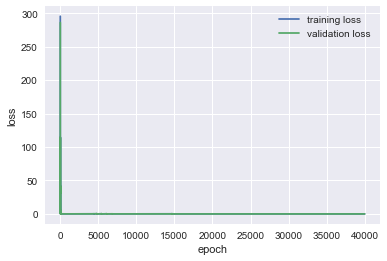

Best epoch number is:  39273
The lowest validation loss is:  0.008743904418121578
At the same epoch, the training loss is:  0.001833263631911086


In [394]:
epochs=40000
tr_loss, te_loss=plot_NN(epochs, tr_losses, te_losses)
print("Best epoch number is: ", te_loss.index(min(te_loss)))
print("The lowest validation loss is: ", min(te_loss))
print("At the same epoch, the training loss is: ", tr_loss[te_loss.index(min(te_loss))])

In [379]:
print("MMSE")
mmse_train_pred, mmse_val_pred, tr_losses, te_losses=NN(x_train,y_train_mmse,x_val,y_val_mmse)


MMSE
Iter 0, training loss 175.320511, validation loss 176.891129
Iter 1, training loss 285.139954, validation loss 298.083710
Iter 2, training loss 215.111801, validation loss 229.713730
Iter 3, training loss 108.159332, validation loss 118.080765
Iter 4, training loss 66.770805, validation loss 71.175941
Iter 5, training loss 70.530914, validation loss 71.704109
Iter 6, training loss 72.033630, validation loss 72.671242
Iter 7, training loss 56.986130, validation loss 59.093918
Iter 8, training loss 46.243073, validation loss 51.244072
Iter 9, training loss 58.215569, validation loss 66.837791
Iter 10, training loss 61.303082, validation loss 72.167580
Iter 11, training loss 45.125553, validation loss 56.467430
Iter 12, training loss 33.192337, validation loss 44.210888
Iter 13, training loss 33.076748, validation loss 43.940140
Iter 14, training loss 34.134068, validation loss 45.513126
Iter 15, training loss 29.001177, validation loss 41.639866
Iter 16, training loss 21.333023, val

Iter 138, training loss 1.463292, validation loss 21.882154
Iter 139, training loss 1.449919, validation loss 21.879507
Iter 140, training loss 1.436768, validation loss 21.875799
Iter 141, training loss 1.423779, validation loss 21.874777
Iter 142, training loss 1.410998, validation loss 21.876429
Iter 143, training loss 1.398463, validation loss 21.877626
Iter 144, training loss 1.386054, validation loss 21.876339
Iter 145, training loss 1.373851, validation loss 21.874142
Iter 146, training loss 1.361885, validation loss 21.874044
Iter 147, training loss 1.350071, validation loss 21.876657
Iter 148, training loss 1.338431, validation loss 21.879370
Iter 149, training loss 1.326978, validation loss 21.879446
Iter 150, training loss 1.315694, validation loss 21.877722
Iter 151, training loss 1.304590, validation loss 21.877541
Iter 152, training loss 1.293651, validation loss 21.880878
Iter 153, training loss 1.282897, validation loss 21.886219
Iter 154, training loss 1.272315, valida

Iter 275, training loss 0.627235, validation loss 22.532082
Iter 276, training loss 0.624578, validation loss 22.539341
Iter 277, training loss 0.621936, validation loss 22.541309
Iter 278, training loss 0.619333, validation loss 22.545361
Iter 279, training loss 0.616745, validation loss 22.551531
Iter 280, training loss 0.614260, validation loss 22.559759
Iter 281, training loss 0.611658, validation loss 22.566704
Iter 282, training loss 0.609176, validation loss 22.569717
Iter 283, training loss 0.606657, validation loss 22.573320
Iter 284, training loss 0.604257, validation loss 22.580378
Iter 285, training loss 0.601750, validation loss 22.589014
Iter 286, training loss 0.599370, validation loss 22.590858
Iter 287, training loss 0.597029, validation loss 22.591961
Iter 288, training loss 0.594557, validation loss 22.599260
Iter 289, training loss 0.592077, validation loss 22.603737
Iter 290, training loss 0.589786, validation loss 22.608349
Iter 291, training loss 0.587411, valida

Iter 412, training loss 0.399028, validation loss 23.275801
Iter 413, training loss 0.397934, validation loss 23.286186
Iter 414, training loss 0.397028, validation loss 23.286261
Iter 415, training loss 0.395863, validation loss 23.301901
Iter 416, training loss 0.394751, validation loss 23.296646
Iter 417, training loss 0.393746, validation loss 23.302393
Iter 418, training loss 0.392707, validation loss 23.315136
Iter 419, training loss 0.391664, validation loss 23.322250
Iter 420, training loss 0.390664, validation loss 23.321268
Iter 421, training loss 0.389637, validation loss 23.324308
Iter 422, training loss 0.388643, validation loss 23.338356
Iter 423, training loss 0.387650, validation loss 23.344290
Iter 424, training loss 0.386657, validation loss 23.341948
Iter 425, training loss 0.385708, validation loss 23.348026
Iter 426, training loss 0.384811, validation loss 23.362396
Iter 427, training loss 0.384120, validation loss 23.357662
Iter 428, training loss 0.382878, valida

Iter 549, training loss 0.296330, validation loss 23.876272
Iter 550, training loss 0.295739, validation loss 23.880482
Iter 551, training loss 0.295263, validation loss 23.883850
Iter 552, training loss 0.294693, validation loss 23.891596
Iter 553, training loss 0.294199, validation loss 23.891354
Iter 554, training loss 0.293657, validation loss 23.895426
Iter 555, training loss 0.293284, validation loss 23.896524
Iter 556, training loss 0.292804, validation loss 23.915440
Iter 557, training loss 0.292326, validation loss 23.893698
Iter 558, training loss 0.291823, validation loss 23.929037
Iter 559, training loss 0.291197, validation loss 23.910049
Iter 560, training loss 0.290634, validation loss 23.918596
Iter 561, training loss 0.290227, validation loss 23.930313
Iter 562, training loss 0.289955, validation loss 23.916494
Iter 563, training loss 0.289499, validation loss 23.960171
Iter 564, training loss 0.288771, validation loss 23.916082
Iter 565, training loss 0.288176, valida

Iter 686, training loss 0.240207, validation loss 24.336168
Iter 687, training loss 0.239533, validation loss 24.293617
Iter 688, training loss 0.239106, validation loss 24.312931
Iter 689, training loss 0.238855, validation loss 24.332472
Iter 690, training loss 0.238798, validation loss 24.293768
Iter 691, training loss 0.238837, validation loss 24.364388
Iter 692, training loss 0.238916, validation loss 24.276876
Iter 693, training loss 0.239029, validation loss 24.382032
Iter 694, training loss 0.238971, validation loss 24.263889
Iter 695, training loss 0.238810, validation loss 24.397066
Iter 696, training loss 0.238317, validation loss 24.272200
Iter 697, training loss 0.237734, validation loss 24.393204
Iter 698, training loss 0.236981, validation loss 24.287893
Iter 699, training loss 0.236252, validation loss 24.383606
Iter 700, training loss 0.235568, validation loss 24.316841
Iter 701, training loss 0.235004, validation loss 24.363665
Iter 702, training loss 0.234554, valida

Iter 823, training loss 0.203088, validation loss 24.578966
Iter 824, training loss 0.203505, validation loss 24.659985
Iter 825, training loss 0.204307, validation loss 24.544376
Iter 826, training loss 0.205606, validation loss 24.709888
Iter 827, training loss 0.207383, validation loss 24.501150
Iter 828, training loss 0.210235, validation loss 24.765039
Iter 829, training loss 0.213969, validation loss 24.449501
Iter 830, training loss 0.219980, validation loss 24.848619
Iter 831, training loss 0.227406, validation loss 24.386997
Iter 832, training loss 0.239232, validation loss 24.963896
Iter 833, training loss 0.252041, validation loss 24.310139
Iter 834, training loss 0.271355, validation loss 25.103708
Iter 835, training loss 0.286934, validation loss 24.229374
Iter 836, training loss 0.307367, validation loss 25.234306
Iter 837, training loss 0.312802, validation loss 24.186163
Iter 838, training loss 0.315525, validation loss 25.262468
Iter 839, training loss 0.296077, valida

Iter 960, training loss 0.295515, validation loss 24.382671
Iter 961, training loss 0.289222, validation loss 25.459457
Iter 962, training loss 0.268674, validation loss 24.421251
Iter 963, training loss 0.246947, validation loss 25.306658
Iter 964, training loss 0.220714, validation loss 24.527020
Iter 965, training loss 0.199234, validation loss 25.081915
Iter 966, training loss 0.183942, validation loss 24.696260
Iter 967, training loss 0.176988, validation loss 24.865692
Iter 968, training loss 0.177457, validation loss 24.888571
Iter 969, training loss 0.183315, validation loss 24.705982
Iter 970, training loss 0.192316, validation loss 25.055914
Iter 971, training loss 0.201915, validation loss 24.605499
Iter 972, training loss 0.211604, validation loss 25.177513
Iter 973, training loss 0.218599, validation loss 24.554161
Iter 974, training loss 0.224898, validation loss 25.250280
Iter 975, training loss 0.226738, validation loss 24.537289
Iter 976, training loss 0.228254, valida

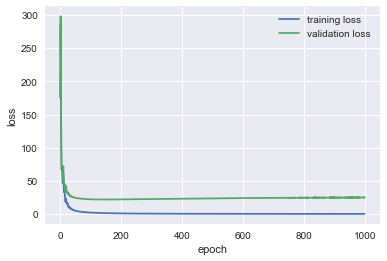

Best epoch number is:  135
The lowest validation loss is:  4.676572141627841
At the same epoch, the training loss is:  1.2266509394743201


In [380]:
tr_loss, te_loss=plot_NN(epochs, tr_losses, te_losses)
print("Best epoch number is: ", te_loss.index(min(te_loss)))
print("The lowest validation loss is: ", min(te_loss))
print("At the same epoch, the training loss is: ", tr_loss[te_loss.index(min(te_loss))])

# Classification

In [381]:
x_train_diag=x_train
x_val_diag=x_val

# Append the predicted numerical variables (ADAS13, Ventricles_Norm, MMSE) as new features for diagnosis predictions
x_train_diag['ADAS13']=adas_train_pred
x_train_diag['Ventricles_Norm']=ventricles_train_pred
x_train_diag['MMSE']=mmse_train_pred

y_train_diag = y_train_diag1.values.reshape(-1,1)

# Same for validation data
x_val_diag['ADAS13']=adas_val_pred
x_val_diag['Ventricles_Norm']=ventricles_val_pred
x_val_diag['MMSE']=mmse_val_pred

y_val_diag = y_val_diag1.values.reshape(-1,1)

In [382]:
def transform(y_val,predictions):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    y_val_cls = ohe.fit_transform(y_val.reshape(-1,1)).toarray()

    predictions_cls = ohe.fit_transform(predictions.reshape(-1,1)).toarray()
    cn_cls = y_val_cls[:,0]
    mci_cls = y_val_cls[:,1]
    ad_cls = y_val_cls[:,2]

    cn_pred = predictions_cls[:,0]
    mci_pred = predictions_cls[:,1]
    ad_pred = predictions_cls[:,2]
    return cn_cls,mci_cls,ad_cls,cn_pred,mci_pred,ad_pred

def metrics(DX,model,X_test,y_test,predictions):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
    pred_prob = model.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test, predictions)
    precision=precision_score(y_test, predictions)
    recall=recall_score(y_test, predictions)
    roc=roc_auc_score(y_test,pred_prob)
    print("%s Accuracy: %.2f%% " % (DX,accuracy *100))
    print("%s Precision: %.2f%% " % (DX,precision *100))
    print("%s Recall: %.2f%% " % (DX,recall * 100))
    print("%s AUC: %.2f%% " % (DX,roc *100))
    return  

* **Diag**
 * **SVC**

In [383]:
svc = SVC(probability=True)
svc.fit(x_train_diag,y_train_diag)
scores = cross_val_score(svc, x_train_diag, y_train_diag, cv=5)
print('Training Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))
y_validation_pred = svc.predict(x_val_diag)
# print(x_train_diag.shape,x_val_diag.shape,y_validation_pred.shape,y_val_diag.shape)
acc = accuracy_score(y_validation_pred,y_val_diag)
print('Validation Accuracy: %0.2f (+/- %0.2f)' % (acc.mean(), acc.std()*2))

Training Accuracy: 0.77 (+/- 0.05)
Validation Accuracy: 0.56 (+/- 0.00)


In [384]:
cn_cls,mci_cls,ad_cls,cn_pred,mci_pred,ad_pred = transform(y_val_diag,y_validation_pred)
metrics('CN_Diag',svc,x_val_diag,cn_cls,cn_pred)
print('*'*30)
metrics('MCI_Diag',svc,x_val_diag,mci_cls,mci_pred)
print('*'*30)
metrics('AD_Diag',svc,x_val_diag,ad_cls,ad_pred)

CN_Diag Accuracy: 69.93% 
CN_Diag Precision: 66.19% 
CN_Diag Recall: 39.06% 
CN_Diag AUC: 40.02% 
******************************
MCI_Diag Accuracy: 61.39% 
MCI_Diag Precision: 53.94% 
MCI_Diag Recall: 76.77% 
MCI_Diag AUC: 69.63% 
******************************
AD_Diag Accuracy: 81.19% 
AD_Diag Precision: 51.66% 
AD_Diag Recall: 43.19% 
AD_Diag AUC: 34.03% 


* **Diag**
 * **NEURAL NETWORKS**

In [385]:
# features = ['AGE','DX_bl','Month','ADAS13','Ventricles_Norm','MMSE']

# X_train = train_diag_2[features].values
# y_train = y_train_diag_2[['CN_Diag','MCI_Diag','AD_Diag']].values.reshape(-1,3)

# X_val = validation_diag_2[features].values
# y_val = y_validation_diag_2[['CN_Diag','MCI_Diag','AD_Diag']].values.reshape(-1,3)

In [386]:
x_train = x_train_diag
y_train = y_train_diag2.values.reshape(-1,3)

x_val = x_val_diag
y_val = y_val_diag2.values.reshape(-1,3)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# y_train_cls = ohe.fit_transform(y_train_diag1.values.reshape(-1,1)).toarray()

# y_validation_cls = ohe.fit_transform(y_validation_diag1.values.reshape(-1,1)).toarray()

In [387]:
n_input = x_train.shape[1]
n_hidden1 = 128
n_hidden2 = 512
n_hidden3 = 1024
n_output = 3
learning_rate = 0.001
epochs = 1000
batch_size = 100

x = tf.placeholder(tf.float32,[None,n_input])
y_gt = tf.placeholder(tf.float32,[None,n_output])

initializer = tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False)
W1 = tf.Variable(initializer([n_input,n_hidden1]))
b1 = tf.Variable(tf.constant(0.1,shape=[n_hidden1]))
H1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(initializer([n_hidden1,n_hidden2]))
b2 = tf.Variable(tf.constant(0.1,shape=[n_hidden2]))
H2 = tf.nn.relu(tf.matmul(H1,W2)+b2)

W3 = tf.Variable(initializer([n_hidden2,n_hidden3]))
b3 = tf.Variable(tf.constant(0.1,shape=[n_hidden3]))
H3 = tf.nn.relu(tf.matmul(H2,W3)+b3)

W_out = tf.Variable(initializer([n_hidden3,n_output]))
b_out = tf.Variable(tf.constant(0.1,shape=[n_output]))
y_pred = tf.matmul(H3,W_out)+b_out

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_gt,logits=y_pred))
optimizer = tf.train.AdamOptimizer(learning_rate)
train_step = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_gt,axis=1),tf.argmax(y_pred,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
tr_losses, te_losses = [], []
for iter in range(epochs):
#     batch_x,batch_y = random_batch(x_train_cls.values,y_train_cls,batch_size)
    sess.run(train_step, feed_dict={x:x_train, y_gt:y_train})
    if iter%1 == 0:
        
        train_loss = sess.run(loss, feed_dict={x:x_train, y_gt:y_train})
        train_acc = sess.run(accuracy, feed_dict={x:x_train, y_gt:y_train})
        tr_losses.append(train_acc)
        print("Iter %d, training loss %f, training accuracy %f" % (iter, train_loss, train_acc))
        
        y_validation_pred = sess.run(y_pred,feed_dict={x:x_val})
        val_loss = sess.run(loss,feed_dict={x:x_val, y_gt:y_val})
        val_acc = sess.run(accuracy,feed_dict={x:x_val, y_gt:y_val})
        te_losses.append(val_acc)
        print("Iter %d, validation loss %f, validation accuracy %f" % (iter, val_loss, val_acc))

y_validation_pred = np.argmax(sess.run(y_pred,feed_dict={x:x_val}),axis=1)

Iter 0, training loss 8.108478, training accuracy 0.467093
Iter 0, validation loss 7.110089, validation accuracy 0.440125
Iter 1, training loss 15.050492, training accuracy 0.326534
Iter 1, validation loss 13.828911, validation accuracy 0.371760
Iter 2, training loss 10.025228, training accuracy 0.326534
Iter 2, validation loss 9.596361, validation accuracy 0.371760
Iter 3, training loss 8.529650, training accuracy 0.469923
Iter 3, validation loss 8.974334, validation accuracy 0.436104
Iter 4, training loss 8.187607, training accuracy 0.469029
Iter 4, validation loss 9.410601, validation accuracy 0.434763
Iter 5, training loss 5.239175, training accuracy 0.486599
Iter 5, validation loss 7.046713, validation accuracy 0.438785
Iter 6, training loss 1.709167, training accuracy 0.595295
Iter 6, validation loss 3.330801, validation accuracy 0.467382
Iter 7, training loss 1.442896, training accuracy 0.586808
Iter 7, validation loss 2.895856, validation accuracy 0.375782
Iter 8, training loss

Iter 67, training loss 0.075471, training accuracy 0.970071
Iter 67, validation loss 1.690875, validation accuracy 0.542895
Iter 68, training loss 0.073677, training accuracy 0.970220
Iter 68, validation loss 1.692679, validation accuracy 0.544236
Iter 69, training loss 0.070221, training accuracy 0.969923
Iter 69, validation loss 1.708448, validation accuracy 0.541108
Iter 70, training loss 0.068238, training accuracy 0.970220
Iter 70, validation loss 1.729617, validation accuracy 0.541108
Iter 71, training loss 0.067199, training accuracy 0.970518
Iter 71, validation loss 1.738574, validation accuracy 0.539768
Iter 72, training loss 0.066098, training accuracy 0.971560
Iter 72, validation loss 1.734138, validation accuracy 0.542895
Iter 73, training loss 0.064022, training accuracy 0.972603
Iter 73, validation loss 1.729907, validation accuracy 0.542449
Iter 74, training loss 0.061581, training accuracy 0.972752
Iter 74, validation loss 1.737788, validation accuracy 0.547811
Iter 75,

Iter 133, training loss 0.698323, training accuracy 0.940887
Iter 133, validation loss 9.942912, validation accuracy 0.581769
Iter 134, training loss 0.683826, training accuracy 0.943270
Iter 134, validation loss 10.473213, validation accuracy 0.528597
Iter 135, training loss 1.407145, training accuracy 0.901281
Iter 135, validation loss 14.820379, validation accuracy 0.479446
Iter 136, training loss 1.860698, training accuracy 0.870161
Iter 136, validation loss 16.970526, validation accuracy 0.463360
Iter 137, training loss 0.858701, training accuracy 0.932400
Iter 137, validation loss 13.321865, validation accuracy 0.495979
Iter 138, training loss 0.494684, training accuracy 0.956224
Iter 138, validation loss 10.016380, validation accuracy 0.558534
Iter 139, training loss 1.109766, training accuracy 0.917361
Iter 139, validation loss 11.751773, validation accuracy 0.553619
Iter 140, training loss 1.481112, training accuracy 0.902918
Iter 140, validation loss 12.760850, validation acc

Iter 198, training loss 132.419998, training accuracy 0.353782
Iter 198, validation loss 191.686478, validation accuracy 0.376676
Iter 199, training loss 158.132294, training accuracy 0.617778
Iter 199, validation loss 247.115555, validation accuracy 0.446381
Iter 200, training loss 375.931946, training accuracy 0.318344
Iter 200, validation loss 517.301208, validation accuracy 0.226988
Iter 201, training loss 436.479309, training accuracy 0.530226
Iter 201, validation loss 574.635376, validation accuracy 0.436997
Iter 202, training loss 395.582794, training accuracy 0.561644
Iter 202, validation loss 531.741455, validation accuracy 0.437444
Iter 203, training loss 275.487030, training accuracy 0.405896
Iter 203, validation loss 417.119751, validation accuracy 0.269437
Iter 204, training loss 66.898849, training accuracy 0.678827
Iter 204, validation loss 159.955566, validation accuracy 0.438785
Iter 205, training loss 81.848465, training accuracy 0.480048
Iter 205, validation loss 160

Iter 262, training loss 323.401489, training accuracy 0.516230
Iter 262, validation loss 550.935852, validation accuracy 0.439231
Iter 263, training loss 1058.408691, training accuracy 0.246575
Iter 263, validation loss 1311.784302, validation accuracy 0.218945
Iter 264, training loss 942.309998, training accuracy 0.512805
Iter 264, validation loss 1046.109985, validation accuracy 0.422252
Iter 265, training loss 560.074646, training accuracy 0.460989
Iter 265, validation loss 706.951599, validation accuracy 0.399911
Iter 266, training loss 458.293335, training accuracy 0.497618
Iter 266, validation loss 716.985352, validation accuracy 0.438338
Iter 267, training loss 679.406799, training accuracy 0.514443
Iter 267, validation loss 982.291321, validation accuracy 0.438338
Iter 268, training loss 723.154846, training accuracy 0.278886
Iter 268, validation loss 1079.909668, validation accuracy 0.212690
Iter 269, training loss 122.736412, training accuracy 0.697588
Iter 269, validation lo

Iter 326, training loss 113.880264, training accuracy 0.779482
Iter 326, validation loss 517.028564, validation accuracy 0.492404
Iter 327, training loss 227.202560, training accuracy 0.663043
Iter 327, validation loss 560.898865, validation accuracy 0.473190
Iter 328, training loss 188.384979, training accuracy 0.710393
Iter 328, validation loss 615.177612, validation accuracy 0.473637
Iter 329, training loss 113.824280, training accuracy 0.795265
Iter 329, validation loss 448.190338, validation accuracy 0.429401
Iter 330, training loss 164.649460, training accuracy 0.796158
Iter 330, validation loss 527.938538, validation accuracy 0.482574
Iter 331, training loss 80.636475, training accuracy 0.864652
Iter 331, validation loss 430.254456, validation accuracy 0.509830
Iter 332, training loss 406.748962, training accuracy 0.531864
Iter 332, validation loss 938.959900, validation accuracy 0.298481
Iter 333, training loss 767.860352, training accuracy 0.690590
Iter 333, validation loss 11

Iter 389, training loss 368.742035, training accuracy 0.719923
Iter 389, validation loss 1303.827148, validation accuracy 0.390080
Iter 390, training loss 832.689697, training accuracy 0.637284
Iter 390, validation loss 1745.856689, validation accuracy 0.465594
Iter 391, training loss 1681.879150, training accuracy 0.677189
Iter 391, validation loss 2407.608154, validation accuracy 0.464254
Iter 392, training loss 1860.438110, training accuracy 0.736301
Iter 392, validation loss 2503.041992, validation accuracy 0.504915
Iter 393, training loss 1126.730103, training accuracy 0.742108
Iter 393, validation loss 1906.872192, validation accuracy 0.505809
Iter 394, training loss 145.818146, training accuracy 0.866438
Iter 394, validation loss 764.941345, validation accuracy 0.483467
Iter 395, training loss 1533.693604, training accuracy 0.472454
Iter 395, validation loss 2771.076904, validation accuracy 0.279714
Iter 396, training loss 396.507080, training accuracy 0.732430
Iter 396, validat

Iter 451, validation loss 4463.287598, validation accuracy 0.446381
Iter 452, training loss 10958.856445, training accuracy 0.470518
Iter 452, validation loss 11751.850586, validation accuracy 0.436550
Iter 453, training loss 9100.291992, training accuracy 0.472007
Iter 453, validation loss 10016.734375, validation accuracy 0.436997
Iter 454, training loss 3645.994385, training accuracy 0.359887
Iter 454, validation loss 4649.336914, validation accuracy 0.383825
Iter 455, training loss 9904.578125, training accuracy 0.212775
Iter 455, validation loss 11793.573242, validation accuracy 0.194817
Iter 456, training loss 2784.220947, training accuracy 0.453097
Iter 456, validation loss 4578.799805, validation accuracy 0.292672
Iter 457, training loss 9971.616211, training accuracy 0.471263
Iter 457, validation loss 10932.019531, validation accuracy 0.436997
Iter 458, training loss 8406.513672, training accuracy 0.717987
Iter 458, validation loss 8264.289062, validation accuracy 0.490170
Ite

Iter 514, training loss 4277.898926, training accuracy 0.379690
Iter 514, validation loss 6846.833496, validation accuracy 0.257373
Iter 515, training loss 4516.656738, training accuracy 0.402323
Iter 515, validation loss 6332.871094, validation accuracy 0.400804
Iter 516, training loss 5551.274414, training accuracy 0.503722
Iter 516, validation loss 7677.995605, validation accuracy 0.441019
Iter 517, training loss 4304.542480, training accuracy 0.511316
Iter 517, validation loss 6596.462891, validation accuracy 0.442806
Iter 518, training loss 2838.741455, training accuracy 0.557921
Iter 518, validation loss 4353.428223, validation accuracy 0.410188
Iter 519, training loss 6027.148438, training accuracy 0.389964
Iter 519, validation loss 8490.172852, validation accuracy 0.269884
Iter 520, training loss 441.984711, training accuracy 0.854973
Iter 520, validation loss 1963.179565, validation accuracy 0.487489
Iter 521, training loss 4656.165039, training accuracy 0.547052
Iter 521, val

Iter 576, training loss 2876.039551, training accuracy 0.719029
Iter 576, validation loss 5192.017090, validation accuracy 0.466935
Iter 577, training loss 9715.522461, training accuracy 0.476921
Iter 577, validation loss 13467.765625, validation accuracy 0.437444
Iter 578, training loss 5029.554688, training accuracy 0.532013
Iter 578, validation loss 8860.804688, validation accuracy 0.350760
Iter 579, training loss 1536.917114, training accuracy 0.648303
Iter 579, validation loss 4620.962402, validation accuracy 0.361930
Iter 580, training loss 6237.442383, training accuracy 0.490322
Iter 580, validation loss 8729.466797, validation accuracy 0.448615
Iter 581, training loss 10720.423828, training accuracy 0.504914
Iter 581, validation loss 13438.355469, validation accuracy 0.441912
Iter 582, training loss 5067.633301, training accuracy 0.681358
Iter 582, validation loss 7497.950195, validation accuracy 0.487042
Iter 583, training loss 6596.879883, training accuracy 0.511912
Iter 583,

Iter 638, training loss 48348.140625, training accuracy 0.477814
Iter 638, validation loss 47051.042969, validation accuracy 0.437444
Iter 639, training loss 69546.726562, training accuracy 0.331298
Iter 639, validation loss 64620.539062, validation accuracy 0.373548
Iter 640, training loss 62738.996094, training accuracy 0.361376
Iter 640, validation loss 58043.324219, validation accuracy 0.394549
Iter 641, training loss 74081.937500, training accuracy 0.469476
Iter 641, validation loss 71840.789062, validation accuracy 0.434763
Iter 642, training loss 75166.640625, training accuracy 0.469029
Iter 642, validation loss 74934.359375, validation accuracy 0.434763
Iter 643, training loss 48203.511719, training accuracy 0.469476
Iter 643, validation loss 50020.066406, validation accuracy 0.434763
Iter 644, training loss 6324.522949, training accuracy 0.520697
Iter 644, validation loss 9830.260742, validation accuracy 0.453530
Iter 645, training loss 48726.582031, training accuracy 0.207564

Iter 700, training loss 14282.639648, training accuracy 0.577278
Iter 700, validation loss 19071.169922, validation accuracy 0.466041
Iter 701, training loss 12917.619141, training accuracy 0.525611
Iter 701, validation loss 16726.011719, validation accuracy 0.391868
Iter 702, training loss 40920.667969, training accuracy 0.226325
Iter 702, validation loss 48308.015625, validation accuracy 0.197498
Iter 703, training loss 15818.865234, training accuracy 0.378201
Iter 703, validation loss 22272.074219, validation accuracy 0.262288
Iter 704, training loss 13871.035156, training accuracy 0.717987
Iter 704, validation loss 17133.230469, validation accuracy 0.495085
Iter 705, training loss 30143.318359, training accuracy 0.666319
Iter 705, validation loss 31675.757812, validation accuracy 0.485255
Iter 706, training loss 37458.636719, training accuracy 0.543180
Iter 706, validation loss 37998.371094, validation accuracy 0.454870
Iter 707, training loss 36746.203125, training accuracy 0.6314

Iter 762, training loss 2607.083984, training accuracy 0.720518
Iter 762, validation loss 8103.617676, validation accuracy 0.383378
Iter 763, training loss 9250.066406, training accuracy 0.535736
Iter 763, validation loss 16890.066406, validation accuracy 0.446828
Iter 764, training loss 9800.157227, training accuracy 0.485259
Iter 764, validation loss 15319.192383, validation accuracy 0.422252
Iter 765, training loss 7979.709473, training accuracy 0.511465
Iter 765, validation loss 16089.436523, validation accuracy 0.314567
Iter 766, training loss 24323.406250, training accuracy 0.474241
Iter 766, validation loss 32758.052734, validation accuracy 0.436997
Iter 767, training loss 3398.593262, training accuracy 0.756998
Iter 767, validation loss 9026.484375, validation accuracy 0.500447
Iter 768, training loss 28941.818359, training accuracy 0.453544
Iter 768, validation loss 33515.617188, validation accuracy 0.403038
Iter 769, training loss 44822.648438, training accuracy 0.222454
Iter

Iter 824, training loss 163174.953125, training accuracy 0.205479
Iter 824, validation loss 181086.625000, validation accuracy 0.191689
Iter 825, training loss 130506.367188, training accuracy 0.205479
Iter 825, validation loss 144203.656250, validation accuracy 0.192136
Iter 826, training loss 46370.882812, training accuracy 0.351102
Iter 826, validation loss 52102.937500, validation accuracy 0.374441
Iter 827, training loss 46948.246094, training accuracy 0.369267
Iter 827, validation loss 50106.457031, validation accuracy 0.399911
Iter 828, training loss 103231.929688, training accuracy 0.469327
Iter 828, validation loss 108177.843750, validation accuracy 0.434763
Iter 829, training loss 134330.609375, training accuracy 0.469029
Iter 829, validation loss 140100.453125, validation accuracy 0.434763
Iter 830, training loss 104765.179688, training accuracy 0.469029
Iter 830, validation loss 111568.867188, validation accuracy 0.434763
Iter 831, training loss 21478.576172, training accur

Iter 885, training loss 55089.761719, training accuracy 0.339934
Iter 885, validation loss 61818.738281, validation accuracy 0.372654
Iter 886, training loss 14340.905273, training accuracy 0.711584
Iter 886, validation loss 21863.996094, validation accuracy 0.496872
Iter 887, training loss 28495.947266, training accuracy 0.480197
Iter 887, validation loss 41038.195312, validation accuracy 0.437444
Iter 888, training loss 22552.279297, training accuracy 0.314026
Iter 888, validation loss 36642.468750, validation accuracy 0.223414
Iter 889, training loss 10181.315430, training accuracy 0.565068
Iter 889, validation loss 19066.595703, validation accuracy 0.455764
Iter 890, training loss 26680.207031, training accuracy 0.505807
Iter 890, validation loss 37664.695312, validation accuracy 0.444593
Iter 891, training loss 4756.786133, training accuracy 0.763550
Iter 891, validation loss 13224.449219, validation accuracy 0.491063
Iter 892, training loss 31158.982422, training accuracy 0.47573

Iter 946, validation loss 153075.515625, validation accuracy 0.192136
Iter 947, training loss 75577.679688, training accuracy 0.218136
Iter 947, validation loss 95452.273438, validation accuracy 0.197051
Iter 948, training loss 87404.937500, training accuracy 0.470071
Iter 948, validation loss 96967.601562, validation accuracy 0.436550
Iter 949, training loss 95364.914062, training accuracy 0.681805
Iter 949, validation loss 91889.265625, validation accuracy 0.472744
Iter 950, training loss 164117.156250, training accuracy 0.335914
Iter 950, validation loss 155589.703125, validation accuracy 0.376676
Iter 951, training loss 140227.109375, training accuracy 0.489279
Iter 951, validation loss 137213.765625, validation accuracy 0.439678
Iter 952, training loss 111249.093750, training accuracy 0.520548
Iter 952, validation loss 111076.406250, validation accuracy 0.448615
Iter 953, training loss 112905.593750, training accuracy 0.330852
Iter 953, validation loss 113239.523438, validation ac

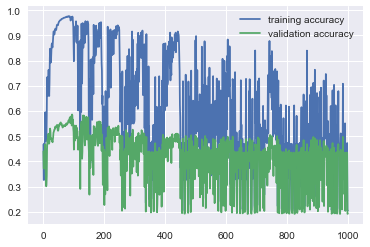

Best epoch number is:  94
The hightest validation accuracy is:  0.5862377
At the same epoch, the training accuracy is:  0.9638178


In [388]:
import matplotlib.pyplot as plt
epoch=list(range(1,epochs+1))
plt.figure()
plt.plot(epoch,tr_losses,label='training accuracy')
plt.plot(epoch,te_losses,label='validation accuracy')
plt.legend()
plt.show()

print("Best epoch number is: ", te_losses.index(max(te_losses)))
print("The hightest validation accuracy is: ", max(te_losses))
print("At the same epoch, the training accuracy is: ", tr_losses[te_losses.index(max(te_losses))])

* **Diag**
 * **GBOOST**

In [ ]:
GBoost = GradientBoostingClassifier(n_estimators=3000,learning_rate=0.05,max_depth=3,max_features='sqrt',
                                          min_samples_leaf=15,min_samples_split=10)
GBoost.fit(x_train_diag,y_train_diag)
scores = cross_val_score(GBoost, x_train_diag, y_train_diag, cv=5)
print('Training Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))
y_validation_pred = GBoost.predict(x_val_diag)
acc = accuracy_score(y_validation_pred,y_val_diag)
print('Validation Accuracy: %0.2f (+/- %0.2f)' % (acc.mean(), acc.std()*2))

In [ ]:
cn_cls,mci_cls,ad_cls,cn_pred,mci_pred,ad_pred = transform(y_val_diag,y_validation_pred)
metrics('CN_Diag',GBoost,X_val,cn_cls,cn_pred)
print('*'*30)
metrics('MCI_Diag',GBoost,X_val,mci_cls,mci_pred)
print('*'*30)
metrics('AD_Diag',GBoost,X_val,ad_cls,ad_pred)